In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, learning_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, accuracy_score
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.feature_selection import chi2
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

from scipy.stats import loguniform

from sklearn.decomposition import PCA 

2022-12-21 23:30:53.346892: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-21 23:30:54.152938: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-21 23:30:54.153049: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-21 23:30:55.759483: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

# Data reading

In [3]:
ds = pd.read_csv('../Data/dataSetForML_Onehot.csv')
embedded_df = pd.read_csv('../Data/embedded_data.csv')

In [4]:
#ds is one hot encoded
ds.head(30)

,Unnamed: 0,orientation_art,progvscons_art,vote,orientation_dep,progvscons_dep,Genre_F,Genre_H,Âge_18-30,Âge_30-45,...,group_AdG,group_CSPO,group_CVPO,group_INDEP,group_LES VERTS,group_PDC,group_SVPO,group_UDC,group_VLR,group_ZUK-VS
0,0,-1,-1,0.0,0.225,0.35,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
1,1,-1,-1,1.0,0.225,0.35,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,2,-1,-1,1.0,0.225,0.35,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,3,-1,-1,1.0,0.225,0.35,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,4,0,1,1.0,0.225,0.35,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
5,5,0,1,0.0,0.225,0.35,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
6,6,0,-1,0.0,0.225,0.35,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
7,7,1,1,1.0,0.225,0.35,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
8,8,-1,1,1.0,0.225,0.35,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
9,9,-1,-1,0.0,0.225,0.35,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [5]:
#Embedded is used with embedding
embedded_df.head()

,Unnamed: 0,orientation_art,progvscons_art,vote,orientation_dep,progvscons_dep,Genre_e,Âge_18-30,Âge_30-45,Âge_45-65,...,embedding_5,embedding_6,embedding_1_d,embedding_2_d,embedding_3_d,embedding_4_d,embedding_5_d,embedding_6_d,embedding_7_d,embedding_8_d
0,0,-1,-1,0.0,0.225,0.35,1,0,1,0,...,0.186029,0.029642,-0.058095,0.002507,0.030775,-0.05396,-0.272926,-0.050405,0.032526,0.300559
1,1,-1,-1,1.0,0.225,0.35,1,0,1,0,...,0.186029,0.029642,-0.058095,0.002507,0.030775,-0.05396,-0.272926,-0.050405,0.032526,0.300559
2,2,-1,-1,1.0,0.225,0.35,1,0,1,0,...,0.186029,0.029642,-0.058095,0.002507,0.030775,-0.05396,-0.272926,-0.050405,0.032526,0.300559
3,3,-1,-1,1.0,0.225,0.35,1,0,1,0,...,0.186029,0.029642,-0.058095,0.002507,0.030775,-0.05396,-0.272926,-0.050405,0.032526,0.300559
4,4,0,1,1.0,0.225,0.35,1,0,1,0,...,0.186029,0.029642,-0.058095,0.002507,0.030775,-0.05396,-0.272926,-0.050405,0.032526,0.300559


### Separate and create variables

In [6]:
# Divide into features and labels 

X_data = ds.iloc[:, 1:37]
X_data = X_data.drop('vote', axis=1)

Labels = ds.iloc[:, [3]]

# Model Selection for Binary Classification

We started by fitting 6 differents models on a specific dataset split, obtained by taking 80% of our initial dataset as our train test and 20% as our test set. For each model, we looked at their confusion matrix and their f1 score to determine their accuracy.

We fitted the following models : 
- Logistic Regression
- K-Nearest Neighbours
- Decision Tree 
- Support Vector Machine
- Naive Bayes 
- Gradient Boosting

In [7]:
# Split the dataset (20% as test set)
X_train, X_test, y_train, y_test = train_test_split(X_data, Labels, test_size=0.2, random_state=0)

In [8]:
y_train.head()

,vote
3496,1.0
457,0.0
3568,1.0
2661,1.0
2445,0.0


# Logistic Regression

In [9]:
# Train the model : logistic Regression
y_train = np.ravel(y_train)

model = LogisticRegression(solver='liblinear', random_state=0)
H = model.fit(X_train, y_train)

In [10]:
print('Logistic Regression Model Coeff (m) =' , model.coef_)
print('Logistic Regression Model Coeff (b) =' , model.intercept_)

Logistic Regression Model Coeff (m) = [[ 0.00532476 -0.2981237   0.1972559  -0.74475177 -0.00770028  0.03190293
  -0.02989438  0.0069223   0.0274198   0.01975494  0.11322858 -0.00243617
   0.00227315 -0.0293277   0.02877211  0.08550075 -0.03986996  0.06737615
  -0.06460001  0.01618016  0.17829958 -0.05107483 -0.06966854 -0.21045063
  -0.18368792 -0.07058028  0.52074526 -0.09612737 -0.21045063 -0.08880302
   0.66002908 -0.18968817 -0.44229209  0.31132925 -0.18627147]]
Logistic Regression Model Coeff (b) = [0.02420265]


In [11]:
# Predicting the data
y_predict=model.predict(X_test)

In [12]:
# Print Confusion Matrix

print("\nConfusion Matrix : \n",confusion_matrix(y_test, model.predict(X_test)))


Confusion Matrix : 
 [[113 237]
 [ 92 476]]


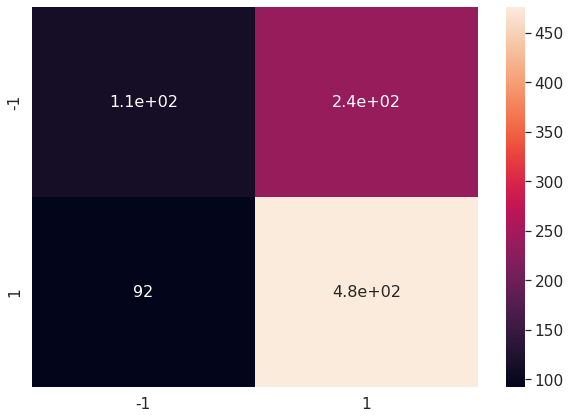

In [13]:
# Plot Confusion Matrix 

cm = confusion_matrix(y_test, model.predict(X_test))

df_cm = pd.DataFrame(cm,[-1, 1], [-1, 1])

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [14]:
# Print Classification Report

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.55      0.32      0.41       350
         1.0       0.67      0.84      0.74       568

    accuracy                           0.64       918
   macro avg       0.61      0.58      0.58       918
weighted avg       0.62      0.64      0.62       918



# K-Nearest Neighbors 

In [15]:
# Train the KNN classifier on the training data
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
classifier.fit(X_train, y_train)

# Evaluate the classifier on the test data
score = classifier.score(X_test, y_test)

In [16]:
print(score)

0.7211328976034859


In [17]:
# Print Confusion Matrix

print("\nConfusion Matrix : \n",confusion_matrix(y_test, classifier.predict(X_test)))


Confusion Matrix : 
 [[201 149]
 [107 461]]


In [18]:
# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Compute the F1 score
f1 = f1_score(y_test, y_pred)
print(f1)

0.7826825127334465


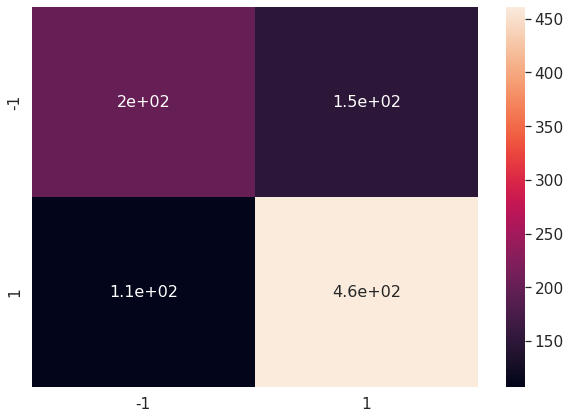

In [19]:
# Plot Confusion Matrix 

cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm,[-1, 1], [-1, 1])

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [20]:
# Print Classification Report

print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.65      0.57      0.61       350
         1.0       0.76      0.81      0.78       568

    accuracy                           0.72       918
   macro avg       0.70      0.69      0.70       918
weighted avg       0.72      0.72      0.72       918



# Decision Tree

In [21]:
# Train the decision tree classifier on the training data
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree_classifier.predict(X_test)

# Compute the F1 score
f1 = f1_score(y_test, y_pred)
print(f1)

0.7727674624226348


In [22]:
# Print Confusion Matrix

print("\nConfusion Matrix : \n",confusion_matrix(y_test, tree_classifier.predict(X_test)))


Confusion Matrix : 
 [[224 126]
 [131 437]]


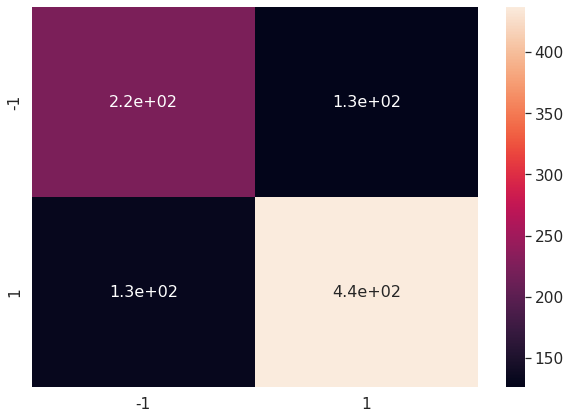

In [23]:
# Compute the confusion matrix
cm_tree = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm_tree,[-1, 1], [-1, 1])

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [24]:
# Print Classification Report

print(classification_report(y_test, tree_classifier.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.63      0.64      0.64       350
         1.0       0.78      0.77      0.77       568

    accuracy                           0.72       918
   macro avg       0.70      0.70      0.70       918
weighted avg       0.72      0.72      0.72       918



# Support Vector Machine

In [25]:
# Train the decision tree classifier on the training data
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Compute the F1 score
f1 = f1_score(y_test, y_pred)
print(f1)

0.8006672226855714


In [26]:
# Print Confusion Matrix

print("\nConfusion Matrix : \n",confusion_matrix(y_test, svm_classifier.predict(X_test)))


Confusion Matrix : 
 [[199 151]
 [ 88 480]]


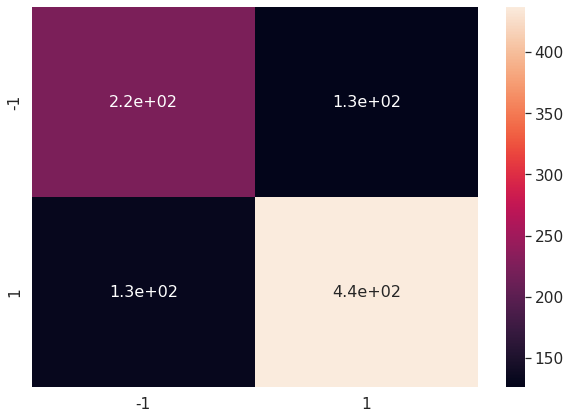

In [27]:
# Compute the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm_tree,[-1, 1], [-1, 1])

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [28]:
# Print Classification Report

print(classification_report(y_test, svm_classifier.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.69      0.57      0.62       350
         1.0       0.76      0.85      0.80       568

    accuracy                           0.74       918
   macro avg       0.73      0.71      0.71       918
weighted avg       0.74      0.74      0.73       918



# Naive Bayes

In [29]:
# Train the decision tree classifier on the training data
bayes_classifier = GaussianNB()
bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bayes_classifier.predict(X_test)

# Compute the F1 score
f1 = f1_score(y_test, y_pred)
print(f1)

0.7302631578947368


In [30]:
# Print Confusion Matrix

print("\nConfusion Matrix : \n",confusion_matrix(y_test, bayes_classifier.predict(X_test)))


Confusion Matrix : 
 [[146 204]
 [124 444]]


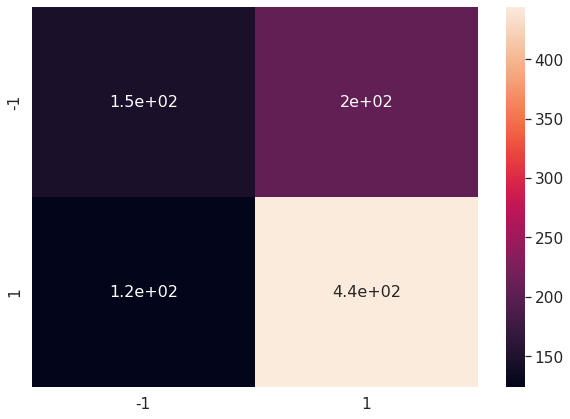

In [31]:
# Compute the confusion matrix
cm_bayes = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm_bayes,[-1, 1], [-1, 1])

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [32]:
# Print Classification Report

print(classification_report(y_test, bayes_classifier.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.54      0.42      0.47       350
         1.0       0.69      0.78      0.73       568

    accuracy                           0.64       918
   macro avg       0.61      0.60      0.60       918
weighted avg       0.63      0.64      0.63       918



# Gradient Boosting

In [33]:
# Train a gradient boosting classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbc.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)

F1 score: 0.8047138047138046


In [34]:
# Print Confusion Matrix

print("\nConfusion Matrix : \n",confusion_matrix(y_test, gbc.predict(X_test)))


Confusion Matrix : 
 [[208 142]
 [ 90 478]]


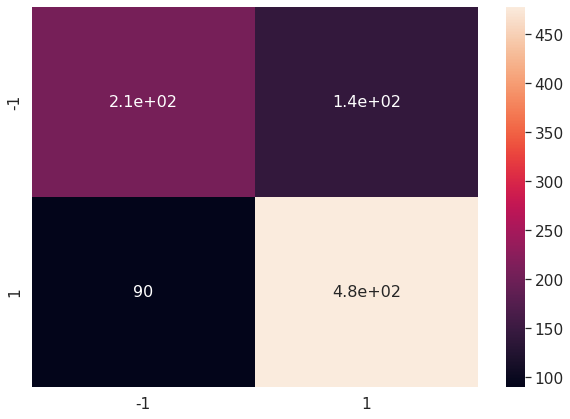

In [35]:
# Compute the confusion matrix
cm_bayes = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm_bayes,[-1, 1], [-1, 1])

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [36]:
# Print Classification Report

print(classification_report(y_test, gbc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.70      0.59      0.64       350
         1.0       0.77      0.84      0.80       568

    accuracy                           0.75       918
   macro avg       0.73      0.72      0.72       918
weighted avg       0.74      0.75      0.74       918



# Extreme Gradient boosting

In [38]:
# Train a gradient boosting classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print('F1 score:', f1)

F1 score: 0.7826086956521738


In [39]:
# Print Confusion Matrix

print("\nConfusion Matrix : \n",confusion_matrix(y_test, xgb.predict(X_test)))


Confusion Matrix : 
 [[204 146]
 [109 459]]


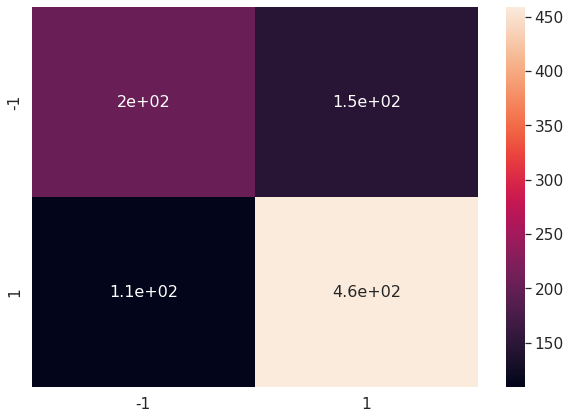

In [40]:
# Compute the confusion matrix
cm_bayes = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm_bayes,[-1, 1], [-1, 1])

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [41]:
# Print Classification Report

print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.65      0.58      0.62       350
         1.0       0.76      0.81      0.78       568

    accuracy                           0.72       918
   macro avg       0.71      0.70      0.70       918
weighted avg       0.72      0.72      0.72       918



# Random forest

In [42]:
class_weight_list = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight = dict(zip(np.unique(y_train), class_weight_list))

In [43]:
rfc = RandomForestClassifier(class_weight=class_weight)
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Compute the F1 score
f1 = f1_score(y_test, y_pred)
print(f1)

0.772887323943662


In [44]:
print("\nConfusion Matrix : \n",confusion_matrix(y_test, rfc.predict(X_test)))


Confusion Matrix : 
 [[221 129]
 [129 439]]


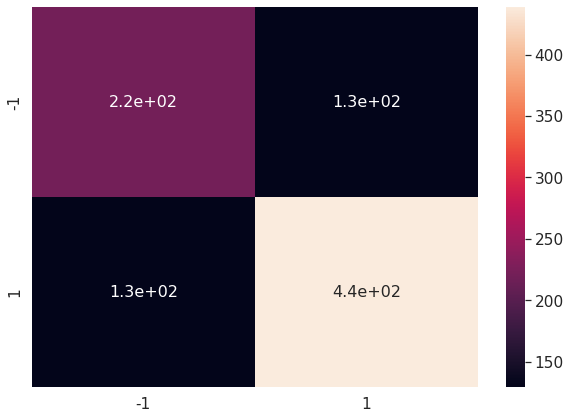

In [45]:
# Compute the confusion matrix
cm_rfc = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm_rfc,[-1, 1], [-1, 1])

plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [46]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.63      0.63      0.63       350
         1.0       0.77      0.77      0.77       568

    accuracy                           0.72       918
   macro avg       0.70      0.70      0.70       918
weighted avg       0.72      0.72      0.72       918



Based on the f1 score of each model, it seems that Gradient Boosting and Support Vector Machine are the most accurate methods for this specific data set split.

- f1 score (gradient boosting) = 0.82 
- f1 score (svm) = 0.82

To confirm this intuition that SVM and Gradient Boosting are accurate in guessing the vote of a deputee on an article, we will perform k-fold crossvalidation

# K-fold crossvalidation

Cross-validation (k-fold cross-validation) is a method for estimating the skill of our models. In standard  k-fold cross-validation, we divide the data into k subsets, called folds. Then, we iteratively train the algorithm on k−1  folds while using the remaining fold as a test set. In our case, we will use 5 folds.

This technique will allow us to confirm the accuracy statistics we will obtain. We will show that the values are not due to a "lucky guess".

In [47]:
Labels = Labels.reset_index(drop=True)
X_data.reset_index(drop=True)

,orientation_art,progvscons_art,orientation_dep,progvscons_dep,Genre_F,Genre_H,Âge_18-30,Âge_30-45,Âge_45-65,Âge_65+,...,group_AdG,group_CSPO,group_CVPO,group_INDEP,group_LES VERTS,group_PDC,group_SVPO,group_UDC,group_VLR,group_ZUK-VS
0,-1,-1,0.225000,0.350000,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,-1,-1,0.225000,0.350000,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,-1,-1,0.225000,0.350000,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,-1,-1,0.225000,0.350000,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0.225000,0.350000,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4583,0,1,0.333333,0.555556,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4584,0,1,0.333333,0.555556,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4585,1,1,0.333333,0.555556,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4586,1,1,0.333333,0.555556,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [48]:
# Create a k-fold cross-validation iterator
gbc_kfold = GradientBoostingClassifier(learning_rate = 0.2, n_estimators = 10, max_depth = 3)

In [49]:
kfold = KFold(n_splits=5)

# Loop through the k folds and fit the model on each train fold
# and evaluate it on the corresponding test fold
for train_indices, test_indices in kfold.split(X_data):
    X_train = X_data.loc[train_indices, :]
    y_train = Labels.loc[train_indices, :]
    X_test = X_data.loc[test_indices, :]
    y_test = Labels.loc[test_indices, :]
    gbc_kfold.fit(X_train, y_train)
    print(gbc_kfold.score(X_test, y_test))

/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

0.7429193899782135
0.8376906318082789
0.7549019607843137
0.7884405670665212
0.737186477644493


### SVM k-fold cross validation

In [50]:
svm_kfold = SVC()
kfold = KFold(n_splits=5)

# Loop through the k folds and fit the model on each train fold
# and evaluate it on the corresponding test fold
for train_indices, test_indices in kfold.split(X_data):
  X_train = X_data.loc[train_indices, :]
  y_train = Labels.loc[train_indices, :]
  X_test = X_data.loc[test_indices, :]
  y_test = Labels.loc[test_indices, :]
  svm_kfold.fit(X_train, y_train.values.ravel())
  print(svm_kfold.score(X_test, y_test))

0.738562091503268
0.8442265795206971
0.7538126361655774
0.7928026172300982
0.742639040348964


# Error Learning Curve for all models (training on the not modified dataset)

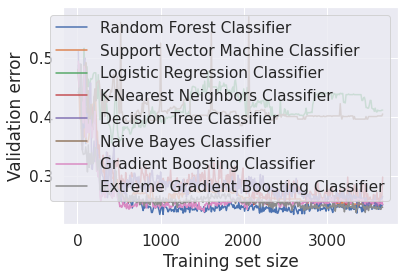

In [52]:
# Initialize a list to store the errors for each training set size
errors_clf_test = []
errors_clf_train = []
errors_svm_test = []
errors_svm_train = []
errors_lr_test = []
errors_lr_train = []
errors_knn_test = []
errors_knn_train = []
errors_dt_test = []
errors_dt_train = []
errors_nb_test = []
errors_nb_train = []
errors_gb_test = []
errors_gb_train = []
errors_xgb_test = []
errors_xgb_train = []


# Set the range of training set sizes to test
sizes = range(10, len(X_train), 10)

# Loop over the training set sizes
for size in sizes:
    y_train_s = y_train.values.ravel()[:size]
    # Fit the classifier on the training set
    clf = RandomForestClassifier()
    clf.fit(X_train[:size], y_train_s)
    #SVM
    svm = SVC()
    svm.fit(X_train[:size], y_train_s)
    #Log reg
    lr = LogisticRegression()
    lr.fit(X_train[:size], y_train_s)
    #knn
    knn = KNeighborsClassifier()
    knn.fit(X_train[:size], y_train_s)
    #decision tree
    dt = DecisionTreeClassifier()
    dt.fit(X_train[:size], y_train_s)
    #naive bayes
    nb = GaussianNB()
    nb.fit(X_train[:size], y_train_s)
    #gradient boosting
    gb = GradientBoostingClassifier()
    gb.fit(X_train[:size], y_train_s)
    #extreme gradient boosting 
    xgb = XGBClassifier()
    xgb.fit(X_train[:size], y_train_s)
    

    # Make predictions on the validation set
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    # Calculate the error
    error_clf_test = 1 - accuracy_score(y_test, y_pred_test)
    errors_clf_test.append(error_clf_test)
    error_clf_train = 1 - accuracy_score(y_train, y_pred_train)
    errors_clf_train.append(error_clf_train)
    
    #SVM predictions
    y_pred_test = svm.predict(X_test)
    y_pred_train = svm.predict(X_train)
    #SVM error
    error_svm_test = 1 - accuracy_score(y_test, y_pred_test)
    errors_svm_test.append(error_svm_test)
    error_svm_train = 1 - accuracy_score(y_train, y_pred_train)
    errors_svm_train.append(error_svm_train)
    
    #log reg predictions
    y_pred_test = lr.predict(X_test)
    y_pred_train = lr.predict(X_train)
    # Log reg error
    error_lr_test = 1 - accuracy_score(y_test, y_pred_test)
    errors_lr_test.append(error_lr_test)
    error_lr_train = 1 - accuracy_score(y_train, y_pred_train)
    errors_lr_train.append(error_lr_train)
    
    #knn prediction
    y_pred_test = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)
    #knn error
    error_knn_test = 1 - accuracy_score(y_test, y_pred_test)
    errors_knn_test.append(error_knn_test)
    error_knn_train = 1 - accuracy_score(y_train, y_pred_train)
    errors_knn_train.append(error_knn_train)
    
    #decision tree predictions
    y_pred_test = dt.predict(X_test)
    y_pred_train = dt.predict(X_train)
    #Decision tree error 
    error_dt_test = 1 - accuracy_score(y_test, y_pred_test)
    errors_dt_test.append(error_dt_test)
    error_dt_train = 1 - accuracy_score(y_train, y_pred_train)
    errors_dt_train.append(error_dt_train)
    
    #naive bayes predictions
    y_pred_test = nb.predict(X_test)
    y_pred_train = nb.predict(X_train)
    #Naive bayes error 
    error_nb_test = 1 - accuracy_score(y_test, y_pred_test)
    errors_nb_test.append(error_nb_test)
    error_nb_train = 1 - accuracy_score(y_train, y_pred_train)
    errors_nb_train.append(error_nb_train)
    
    #gradient boosting
    y_pred_test = gb.predict(X_test)
    y_pred_train = gb.predict(X_train)
    #Gradient boosting
    error_gb_test = 1 - accuracy_score(y_test, y_pred_test)
    errors_gb_test.append(error_gb_test)
    error_gb_train = 1 - accuracy_score(y_train, y_pred_train)
    errors_gb_train.append(error_gb_train)
    
    #Extreme gradient boosting 
    y_pred_test = xgb.predict(X_test)
    y_pred_train = xgb.predict(X_train)
    #Extreme gradient boosting 
    error_xgb_test = 1 - accuracy_score(y_test, y_pred_test)
    errors_xgb_test.append(error_xgb_test)
    error_xgb_train = 1 - accuracy_score(y_train, y_pred_train)
    errors_xgb_train.append(error_xgb_train)       

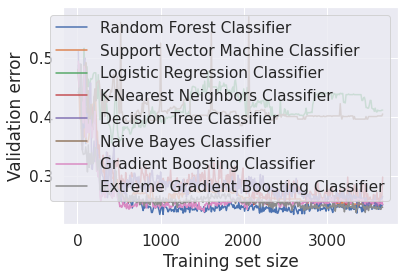

In [57]:
plt.plot(sizes, errors_clf_test, label = 'Random Forest Classifier')
plt.plot(sizes, errors_svm_test, label = 'Support Vector Machine Classifier')
plt.plot(sizes, errors_lr_test, label = 'Logistic Regression Classifier')
plt.plot(sizes, errors_knn_test, label = 'K-Nearest Neighbors Classifier')
plt.plot(sizes, errors_dt_test, label = 'Decision Tree Classifier')
plt.plot(sizes, errors_nb_test, label = 'Naive Bayes Classifier')
plt.plot(sizes, errors_gb_test, label = 'Gradient Boosting Classifier')
plt.plot(sizes, errors_xgb_test, label = 'Extreme Gradient Boosting Classifier')

plt.xlabel('Training set size')
plt.ylabel('Validation error')
plt.legend()
plt.show()       

# Dimensionality reduction techniques

## PCA

The PCA algorithm first standardizes the input data frame and calculates the covariance matrix of the features.

Each row (composed of n dimensions if there are n features in the dataset) is considered as a vector pointing in some direction. These vectors are "averaged" by generating another vector that "points" more or less in the same direction as all those averaged vectors : they are the so-called eigenvectors. 

We sort the eigenvectors by their eigenvalues (their  length). 

We finally choose the eigenvectors which add up to the desired threshold of explained variance.

The standardized feature data frame is multiplied by the matrix of principal components (of eignvectors) and as a result we obtain the compressed representation of the input data.

In the following code, we get the information about the explained variance from the scikit-learn implementation and we plot the cumulative variance to now how many components we need to get the desired threshold of explained variance.

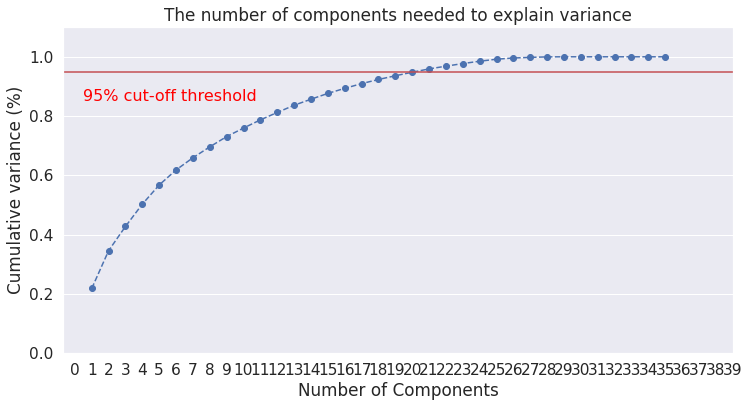

In [58]:
pca = PCA().fit(X_data)

#matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 36, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 40, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

To get 95% of variance explained we need 20 principal components.

We can now apply the dimensionality reduction method to our dataset, creating a sub set : X_data_pca

In [59]:
pca = PCA(n_components=20)
pca.fit(X_data)
X_data_pca = pca.transform(X_data)

We can now fit the same models as before on this new dataset.

### K-Fold PCA Gradient Boosting

In [60]:
#Labels_r = np.ravel(Labels)

gbc = GradientBoostingClassifier()
gbc.fit(X_data_pca, Labels)

# Evaluate the model using k-fold cross validation

k = 10
scores_gbc = cross_val_score(gbc, X_data_pca, Labels.values.ravel(), cv=k)

# Print the average accuracy and the standard deviation
print(scores_gbc)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_gbc.mean(), scores_gbc.std() * 2))

/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.65577342 0.57298475 0.65359477 0.70152505 0.64488017 0.66666667
 0.74509804 0.74945534 0.62227074 0.66593886]
Accuracy: 0.67 (+/- 0.10)


### K Fold PCA SVM

In [61]:
#Labels = np.ravel(Labels)

svm = SVC()
svm.fit(X_data_pca, Labels.values.ravel())

# Evaluate the model using k-fold cross validation

k = 10
scores_svm = cross_val_score(svm, X_data_pca, Labels.values.ravel(), cv=k)

# Print the average accuracy and the standard deviation
print(scores_svm)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))

[0.77559913 0.68191721 0.7167756  0.78649237 0.72984749 0.70588235
 0.76252723 0.78649237 0.63318777 0.70524017]
Accuracy: 0.73 (+/- 0.09)


### K Fold PCA Naive Bayes

In [62]:
bayes = GaussianNB()
bayes.fit(X_data_pca, Labels.values.ravel())

# Evaluate the model using k-fold cross validation

k = 10
scores_bayes = cross_val_score(bayes, X_data_pca, Labels.values.ravel(), cv=k)

# Print the average accuracy and the standard deviation
print(scores_bayes)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_bayes.mean(), scores_bayes.std() * 2))


[0.61220044 0.64923747 0.44880174 0.61220044 0.5577342  0.62745098
 0.5751634  0.64488017 0.59170306 0.54803493]
Accuracy: 0.59 (+/- 0.11)


### K Fold PCA Decision Tree

In [63]:
tree = DecisionTreeClassifier()
tree.fit(X_data_pca, Labels.values.ravel())

# Evaluate the model using k-fold cross validation

k = 10
scores_tree = cross_val_score(tree, X_data_pca, Labels.values.ravel(), cv=k)

# Print the average accuracy and the standard deviation
print(scores_tree)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_tree.mean(), scores_tree.std() * 2))

[0.64923747 0.49019608 0.66884532 0.66666667 0.55337691 0.58605664
 0.68627451 0.65359477 0.50655022 0.6441048 ]
Accuracy: 0.61 (+/- 0.14)


### K Fold PCA KNN

In [64]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_data_pca, Labels.values.ravel())

# Evaluate the model using k-fold cross validation

k = 10
scores_knn = cross_val_score(knn, X_data_pca, Labels.values.ravel(), cv=k)

# Print the average accuracy and the standard deviation
print(scores_knn)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))


[0.68845316 0.64270153 0.60566449 0.64488017 0.66448802 0.59912854
 0.74727669 0.69498911 0.57423581 0.6419214 ]
Accuracy: 0.65 (+/- 0.10)


### K Fold PCA Logistic Reg

In [72]:
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_data_pca, Labels.values.ravel())

# Evaluate the model using k-fold cross validation

k = 10
scores_lr = cross_val_score(lr, X_data_pca, Labels.values.ravel(), cv=k)

# Print the average accuracy and the standard deviation
print(scores_lr)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_lr.mean(), scores_lr.std() * 2))

[0.5751634  0.65141612 0.62309368 0.60784314 0.63180828 0.61655773
 0.57298475 0.62745098 0.60043668 0.61135371]
Accuracy: 0.61 (+/- 0.05)


### K Fold PCA Random Forest

In [73]:
rfc = RandomForestClassifier()
rfc.fit(X_data_pca, Labels.values.ravel())

# Evaluate the model using k-fold cross validation

k = 10
scores_rfc = cross_val_score(rfc, X_data_pca, Labels.values.ravel(), cv=k)

# Print the average accuracy and the standard deviation
print(scores_rfc)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_rfc.mean(), scores_rfc.std() * 2))

[0.62309368 0.50108932 0.60566449 0.63398693 0.61873638 0.62091503
 0.7254902  0.74727669 0.5371179  0.67030568]
Accuracy: 0.63 (+/- 0.14)


### K Fold Random Forest (A supprimer)

In [68]:
rfc_kfold = RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100, min_samples_split=200, n_estimators=200, class_weight=class_weight)
kfold = KFold(n_splits=5)

# Loop through the k folds and fit the model on each train fold
# and evaluate it on the corresponding test fold
#'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200
for train_indices, test_indices in kfold.split(X_data):
    X_train = X_data.loc[train_indices, :]
    y_train = Labels.loc[train_indices, :]
    X_test = X_data.loc[test_indices, :]
    y_test = Labels.loc[test_indices, :]
    rfc_kfold.fit(X_train, y_train.values.ravel())
    print(rfc_kfold.score(X_test, y_test))

0.7320261437908496
0.8257080610021786
0.738562091503268
0.7928026172300982
0.7251908396946565


# Error Learning Curve for all models (training on PCA modified dataset)

In [ ]:
# Initialize a list to store the errors for each training set size
errors_clf_test_pca = []
errors_clf_train_pca = []
errors_svm_test_pca = []
errors_svm_train_pca = []
errors_lr_test_pca = []
errors_lr_train_pca = []
errors_knn_test_pca = []
errors_knn_train_pca = []
errors_dt_test_pca = []
errors_dt_train_pca = []
errors_nb_test_pca = []
errors_nb_train_pca = []
errors_gb_test_pca = []
errors_gb_train_pca = []
errors_xgb_test_pca = []
errors_xgb_train_pca = []


# Set the range of training set sizes to test
sizes = range(10, len(X_train_pca), 10)

# Loop over the training set sizes
for size in sizes:
    y_train_s = y_train_pca.values.ravel()[:size]
    X_train_s = X_train_pca[:size]
    # Fit the classifier on the training set
    clf = RandomForestClassifier()
    clf.fit(X_train_s, y_train_s)
    #SVM
    svm = SVC()
    svm.fit(X_train_s, y_train_s)
    #Log reg
    lr = LogisticRegression()
    lr.fit(X_train_s, y_train_s)
    #knn
    knn = KNeighborsClassifier()
    knn.fit(X_train_s, y_train_s)
    #decision tree
    dt = DecisionTreeClassifier()
    dt.fit(X_train_s, y_train_s)
    #naive bayes
    nb = GaussianNB()
    nb.fit(X_train_s, y_train_s)
    #gradient boosting
    gb = GradientBoostingClassifier()
    gb.fit(X_train_s, y_train_s)
    #extreme gradient boosting 
    xgb = XGBClassifier()
    xgb.fit(X_train_s, y_train_s)
    

    # Make predictions on the validation set
    y_pred_test = clf.predict(X_test_pca)
    y_pred_train = clf.predict(X_train_pca)
    # Calculate the error
    error_clf_test = 1 - accuracy_score(y_test_pca, y_pred_test)
    errors_clf_test_pca.append(error_clf_test)
    error_clf_train = 1 - accuracy_score(y_train_pca, y_pred_train)
    errors_clf_train_pca.append(error_clf_train)
    
    #SVM predictions
    y_pred_test = svm.predict(X_test_pca)
    y_pred_train = svm.predict(X_train_pca)
    #SVM error
    error_svm_test = 1 - accuracy_score(y_test_pca, y_pred_test)
    errors_svm_test_pca.append(error_svm_test)
    error_svm_train = 1 - accuracy_score(y_train_pca, y_pred_train)
    errors_svm_train_pca.append(error_svm_train)
    
    #log reg predictions
    y_pred_test = lr.predict(X_test_pca)
    y_pred_train = lr.predict(X_train_pca)
    # Log reg error
    error_lr_test = 1 - accuracy_score(y_test_pca, y_pred_test)
    errors_lr_test_pca.append(error_lr_test)
    error_lr_train = 1 - accuracy_score(y_train_pca, y_pred_train)
    errors_lr_train_pca.append(error_lr_train)
    
    #knn prediction
    y_pred_test = knn.predict(X_test_pca)
    y_pred_train = knn.predict(X_train_pca)
    #knn error
    error_knn_test = 1 - accuracy_score(y_test_pca, y_pred_test)
    errors_knn_test_pca.append(error_knn_test)
    error_knn_train = 1 - accuracy_score(y_train_pca, y_pred_train)
    errors_knn_train_pca.append(error_knn_train)
    
    #decision tree predictions
    y_pred_test = dt.predict(X_test_pca)
    y_pred_train = dt.predict(X_train_pca)
    #Decision tree error 
    error_dt_test = 1 - accuracy_score(y_test_pca, y_pred_test)
    errors_dt_test_pca.append(error_dt_test)
    error_dt_train = 1 - accuracy_score(y_train_pca, y_pred_train)
    errors_dt_train_pca.append(error_dt_train)
    
    #naive bayes predictions
    y_pred_test = nb.predict(X_test_pca)
    y_pred_train = nb.predict(X_train_pca)
    #Naive bayes error 
    error_nb_test = 1 - accuracy_score(y_test_pca, y_pred_test)
    errors_nb_test_pca.append(error_nb_test)
    error_nb_train = 1 - accuracy_score(y_train_pca, y_pred_train)
    errors_nb_train_pca.append(error_nb_train)
    
    #gradient boosting
    y_pred_test = gb.predict(X_test_pca)
    y_pred_train = gb.predict(X_train_pca)
    #Gradient boosting
    error_gb_test = 1 - accuracy_score(y_test_pca, y_pred_test)
    errors_gb_test_pca.append(error_gb_test)
    error_gb_train = 1 - accuracy_score(y_train_pca, y_pred_train)
    errors_gb_train_pca.append(error_gb_train)
    
    #Extreme gradient boosting 
    y_pred_test = xgb.predict(X_test_pca)
    y_pred_train = xgb.predict(X_train_pca)
    #Extreme gradient boosting 
    error_xgb_test = 1 - accuracy_score(y_test_pca, y_pred_test)
    errors_xgb_test_pca.append(error_xgb_test)
    error_xgb_train = 1 - accuracy_score(y_train_pca, y_pred_train)
    errors_xgb_train_pca.append(error_xgb_train)       

## Plotting the results 

In [ ]:
plt.plot(sizes, errors_clf_test_pca, label = 'Random Forest Classifier')
plt.plot(sizes, errors_svm_test_pca, label = 'Support Vector Machine Classifier')
plt.plot(sizes, errors_lr_test_pca, label = 'Logistic Regression Classifier')
plt.plot(sizes, errors_knn_test_pca, label = 'K-Nearest Neighbor Classifier')
plt.plot(sizes, errors_dt_test_pca, label = 'Decision Tree Classifier')
plt.plot(sizes, errors_nb_test_pca, label = 'Naive Bayes Classifier')
plt.plot(sizes, errors_gb_test_pca, label = 'Gradient Boosting Classifier')
plt.plot(sizes, errors_xgb_test_pca, label = 'Extreme Gradient Boosting Classifier')

plt.xlabel('Training set size')
plt.ylabel('Validation error')
plt.legend()
plt.show()
plt.savefig('pca_all_models.png')

# Extreme Gradient Boosting hyperparameters tuning

We decided to keep the extreme gradient boosting algorithm. To optimize it and mitigate overfitting, we will use feature selection and do the hyperparameter tuning.
We will tune the following parameters:
- n_estimators
- max_depth
- min_samples_split
- learning rate

### Feature selection

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


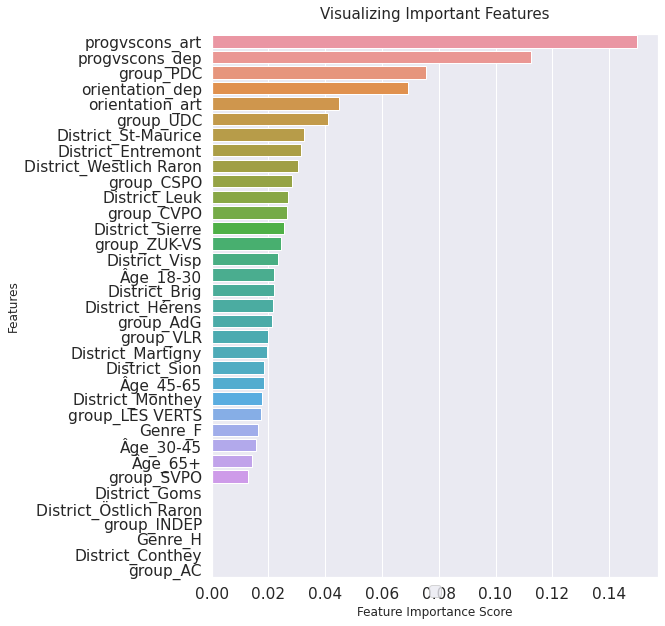

In [88]:
gbm = XGBClassifier(eval_metric="logloss", learning_rate=0.1, max_depth=3, min_child_weight=5, subsample=0.5)
gbm.fit(X_train, y_train)

feature_imp = pd.Series(gbm.feature_importances_, 
                        index=X_data.columns).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8, 10))
sns.barplot(x=feature_imp, y=feature_imp.index, ax=ax)
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title("Visualizing Important Features", fontsize=15, pad=15)
lgd = ax.legend(loc=9, bbox_to_anchor=(0.5,0))
plt.savefig('Important_features.png', bbox_extra_artists=(lgd,), bbox_inches='tight')

In [89]:
selector = SelectFromModel(gbm, threshold=0.02)
features_important = selector.fit_transform(X_data, Labels)
df_feature_red = pd.DataFrame(features_important)
df_feature_red.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.0,-1.0,0.225,0.35,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.0,-1.0,0.225,0.35,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.0,-1.0,0.225,0.35,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.0,-1.0,0.225,0.35,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.225,0.35,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After the feature selection, we have only keep 19 features.
We create a new dataset for training and testing with the 16 features only.

In [90]:
X_train_fm, X_test_fm, y_train_fm, y_test_fm = train_test_split(df_feature_red, Labels, test_size=0.2, random_state=0)

In [104]:
print(df_feature_red.shape)
gbm = XGBClassifier(eval_metric="logloss")
gbm.fit(X_train_fm, y_train_fm)
y_pred_test = gbm.predict(X_test_fm)
# Compute the F1 score
f1 = f1_score(y_test_fm, y_pred_test)
print(classification_report(y_test_fm, gbm.predict(X_test_fm)))

(4588, 16)
              precision    recall  f1-score   support

         0.0       0.66      0.58      0.62       350
         1.0       0.76      0.82      0.79       568

    accuracy                           0.73       918
   macro avg       0.71      0.70      0.70       918
weighted avg       0.72      0.73      0.72       918



### Hyperparameter tuning

In [95]:
# Create the XGBoost classifier
xgb_cv = XGBClassifier() 
# Define the parameter grid
param_grid = {'learning_rate': [0.1, 0.5, 1],
              'max_depth': [3, 5, 7],
              'min_child_weight': [1, 3, 5],
              'subsample': [0.5, 0.7, 1]}

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(xgb, param_grid, cv=5)

# Fit the model using the best hyperparameters
grid_search.fit(X_data, Labels)

# Get the best combination of hyperparameters
best_params = grid_search.best_params_

# Train the model using the best hyperparameters
#xgb = xgb(**best_params)
xgb_cv.fit(X_data, Labels)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.5}


In [96]:
xgb = XGBClassifier(learning_rate = 0.1, max_depth = 3, min_child_weight=5, subsample=0.5)
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb.predict(X_test)

# Print Classification Report
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.76      0.63      0.69       404
         1.0       0.74      0.85      0.79       513

    accuracy                           0.75       917
   macro avg       0.75      0.74      0.74       917
weighted avg       0.75      0.75      0.75       917



In [97]:
#A enlever probablement !!!!!!!!!!!!!!!
#Create a dictionary of hyperparameters to tune
params = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 4, 5],
              'min_samples_split': [2, 3, 4],
              'learning_rate': [0.1, 0.5, 1.0]}

# Use grid search to tune the hyperparameters
gbc_cv = GridSearchCV(gbc, param_grid=params, cv=5)
gbc_cv.fit(X_train, y_train.values.ravel())

# Print the best hyperparameters
print("Best hyperparameters:", gbc_cv.best_params_)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 100}


In [98]:
# Train a gradient boosting classifier
gbc = GradientBoostingClassifier(learning_rate = 0.2, n_estimators = 10, max_depth = 3)
gbc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbc.predict(X_test)

# Print Classification Report
print(classification_report(y_test, gbc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.77      0.57      0.66       404
         1.0       0.72      0.87      0.79       513

    accuracy                           0.74       917
   macro avg       0.75      0.72      0.72       917
weighted avg       0.74      0.74      0.73       917



/home/nico/Anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Results before and after the optimization

Before the optimization, we can see that our model is suffering from overfitting which was limited after the features reduction and the hyperparameter tuning

[0]	validation_0-logloss:0.69315
[1]	validation_0-logloss:0.69315
[2]	validation_0-logloss:0.69315
[3]	validation_0-logloss:0.69315
[4]	validation_0-logloss:0.69315
[5]	validation_0-logloss:0.69315
[6]	validation_0-logloss:0.69315
[7]	validation_0-logloss:0.69315
[8]	validation_0-logloss:0.69315
[9]	validation_0-logloss:0.69315
[10]	validation_0-logloss:0.69315
[11]	validation_0-logloss:0.69315
[12]	validation_0-logloss:0.69315
[13]	validation_0-logloss:0.69315
[14]	validation_0-logloss:0.69315
[15]	validation_0-logloss:0.69315
[16]	validation_0-logloss:0.69315
[17]	validation_0-logloss:0.69315
[18]	validation_0-logloss:0.69315
[19]	validation_0-logloss:0.69315
[20]	validation_0-logloss:0.69315
[21]	validation_0-logloss:0.69315
[22]	validation_0-logloss:0.69315
[23]	validation_0-logloss:0.69315
[24]	validation_0-logloss:0.69315
[25]	validation_0-logloss:0.69315
[26]	validation_0-logloss:0.69315
[27]	validation_0-logloss:0.69315
[28]	validation_0-logloss:0.69315
[29]	validation_0-loglos

[83]	validation_0-logloss:0.68607
[84]	validation_0-logloss:0.68615
[85]	validation_0-logloss:0.68608
[86]	validation_0-logloss:0.68611
[87]	validation_0-logloss:0.68624
[88]	validation_0-logloss:0.68624
[89]	validation_0-logloss:0.68620
[90]	validation_0-logloss:0.68681
[91]	validation_0-logloss:0.68624
[92]	validation_0-logloss:0.68619
[93]	validation_0-logloss:0.68621
[94]	validation_0-logloss:0.68649
[95]	validation_0-logloss:0.68623
[96]	validation_0-logloss:0.68623
[97]	validation_0-logloss:0.68634
[98]	validation_0-logloss:0.68649
[99]	validation_0-logloss:0.68608
[0]	validation_0-logloss:0.69391
[1]	validation_0-logloss:0.69184
[2]	validation_0-logloss:0.69161
[3]	validation_0-logloss:0.69210
[4]	validation_0-logloss:0.69219
[5]	validation_0-logloss:0.69258
[6]	validation_0-logloss:0.69148
[7]	validation_0-logloss:0.68942
[8]	validation_0-logloss:0.68944
[9]	validation_0-logloss:0.68997
[10]	validation_0-logloss:0.68908
[11]	validation_0-logloss:0.68848
[12]	validation_0-loglos

[25]	validation_0-logloss:0.68689
[26]	validation_0-logloss:0.68684
[27]	validation_0-logloss:0.68645
[28]	validation_0-logloss:0.68632
[29]	validation_0-logloss:0.68609
[30]	validation_0-logloss:0.68599
[31]	validation_0-logloss:0.68642
[32]	validation_0-logloss:0.68643
[33]	validation_0-logloss:0.68644
[34]	validation_0-logloss:0.68660
[35]	validation_0-logloss:0.68644
[36]	validation_0-logloss:0.68696
[37]	validation_0-logloss:0.68680
[38]	validation_0-logloss:0.68682
[39]	validation_0-logloss:0.68769
[40]	validation_0-logloss:0.68798
[41]	validation_0-logloss:0.68765
[42]	validation_0-logloss:0.68852
[43]	validation_0-logloss:0.68837
[44]	validation_0-logloss:0.68801
[45]	validation_0-logloss:0.68826
[46]	validation_0-logloss:0.68808
[47]	validation_0-logloss:0.68802
[48]	validation_0-logloss:0.68784
[49]	validation_0-logloss:0.68834
[50]	validation_0-logloss:0.68792
[51]	validation_0-logloss:0.68813
[52]	validation_0-logloss:0.68790
[53]	validation_0-logloss:0.68757
[54]	validatio

[67]	validation_0-logloss:0.69009
[68]	validation_0-logloss:0.68921
[69]	validation_0-logloss:0.69112
[70]	validation_0-logloss:0.69093
[71]	validation_0-logloss:0.68971
[72]	validation_0-logloss:0.68955
[73]	validation_0-logloss:0.68961
[74]	validation_0-logloss:0.69025
[75]	validation_0-logloss:0.68995
[76]	validation_0-logloss:0.69150
[77]	validation_0-logloss:0.69289
[78]	validation_0-logloss:0.69348
[79]	validation_0-logloss:0.69365
[80]	validation_0-logloss:0.69440
[81]	validation_0-logloss:0.69565
[82]	validation_0-logloss:0.69635
[83]	validation_0-logloss:0.69591
[84]	validation_0-logloss:0.69560
[85]	validation_0-logloss:0.69711
[86]	validation_0-logloss:0.69612
[87]	validation_0-logloss:0.69561
[88]	validation_0-logloss:0.69830
[89]	validation_0-logloss:0.69917
[90]	validation_0-logloss:0.70025
[91]	validation_0-logloss:0.70148
[92]	validation_0-logloss:0.70233
[93]	validation_0-logloss:0.70192
[94]	validation_0-logloss:0.70032
[95]	validation_0-logloss:0.70025
[96]	validatio

[9]	validation_0-logloss:0.68830
[10]	validation_0-logloss:0.68806
[11]	validation_0-logloss:0.68408
[12]	validation_0-logloss:0.68339
[13]	validation_0-logloss:0.68434
[14]	validation_0-logloss:0.68317
[15]	validation_0-logloss:0.68133
[16]	validation_0-logloss:0.68150
[17]	validation_0-logloss:0.68272
[18]	validation_0-logloss:0.68181
[19]	validation_0-logloss:0.68214
[20]	validation_0-logloss:0.68228
[21]	validation_0-logloss:0.68367
[22]	validation_0-logloss:0.68477
[23]	validation_0-logloss:0.68107
[24]	validation_0-logloss:0.68180
[25]	validation_0-logloss:0.68090
[26]	validation_0-logloss:0.68324
[27]	validation_0-logloss:0.68276
[28]	validation_0-logloss:0.68151
[29]	validation_0-logloss:0.68186
[30]	validation_0-logloss:0.68199
[31]	validation_0-logloss:0.68182
[32]	validation_0-logloss:0.68372
[33]	validation_0-logloss:0.68519
[34]	validation_0-logloss:0.68449
[35]	validation_0-logloss:0.68327
[36]	validation_0-logloss:0.68306
[37]	validation_0-logloss:0.68174
[38]	validation

[51]	validation_0-logloss:0.65953
[52]	validation_0-logloss:0.65973
[53]	validation_0-logloss:0.65897
[54]	validation_0-logloss:0.66095
[55]	validation_0-logloss:0.66258
[56]	validation_0-logloss:0.66412
[57]	validation_0-logloss:0.66294
[58]	validation_0-logloss:0.66227
[59]	validation_0-logloss:0.66034
[60]	validation_0-logloss:0.65958
[61]	validation_0-logloss:0.66032
[62]	validation_0-logloss:0.65951
[63]	validation_0-logloss:0.65968
[64]	validation_0-logloss:0.65971
[65]	validation_0-logloss:0.65865
[66]	validation_0-logloss:0.65912
[67]	validation_0-logloss:0.66037
[68]	validation_0-logloss:0.65667
[69]	validation_0-logloss:0.65537
[70]	validation_0-logloss:0.65537
[71]	validation_0-logloss:0.65506
[72]	validation_0-logloss:0.65475
[73]	validation_0-logloss:0.65453
[74]	validation_0-logloss:0.65334
[75]	validation_0-logloss:0.65236
[76]	validation_0-logloss:0.65273
[77]	validation_0-logloss:0.65210
[78]	validation_0-logloss:0.65205
[79]	validation_0-logloss:0.65276
[80]	validatio

[93]	validation_0-logloss:0.64557
[94]	validation_0-logloss:0.64390
[95]	validation_0-logloss:0.64426
[96]	validation_0-logloss:0.64449
[97]	validation_0-logloss:0.64409
[98]	validation_0-logloss:0.64301
[99]	validation_0-logloss:0.64201
[0]	validation_0-logloss:0.69395
[1]	validation_0-logloss:0.68546
[2]	validation_0-logloss:0.68105
[3]	validation_0-logloss:0.67689
[4]	validation_0-logloss:0.67057
[5]	validation_0-logloss:0.66636
[6]	validation_0-logloss:0.66600
[7]	validation_0-logloss:0.66612
[8]	validation_0-logloss:0.66746
[9]	validation_0-logloss:0.66217
[10]	validation_0-logloss:0.66334
[11]	validation_0-logloss:0.66400
[12]	validation_0-logloss:0.66386
[13]	validation_0-logloss:0.66626
[14]	validation_0-logloss:0.66126
[15]	validation_0-logloss:0.66128
[16]	validation_0-logloss:0.65921
[17]	validation_0-logloss:0.65847
[18]	validation_0-logloss:0.65847
[19]	validation_0-logloss:0.65859
[20]	validation_0-logloss:0.65753
[21]	validation_0-logloss:0.65720
[22]	validation_0-loglos

[76]	validation_0-logloss:0.68387
[77]	validation_0-logloss:0.68500
[78]	validation_0-logloss:0.68528
[79]	validation_0-logloss:0.68426
[80]	validation_0-logloss:0.68695
[81]	validation_0-logloss:0.68198
[82]	validation_0-logloss:0.67960
[83]	validation_0-logloss:0.67698
[84]	validation_0-logloss:0.67567
[85]	validation_0-logloss:0.67619
[86]	validation_0-logloss:0.67174
[87]	validation_0-logloss:0.67122
[88]	validation_0-logloss:0.66904
[89]	validation_0-logloss:0.67122
[90]	validation_0-logloss:0.67221
[91]	validation_0-logloss:0.67024
[92]	validation_0-logloss:0.66818
[93]	validation_0-logloss:0.66820
[94]	validation_0-logloss:0.66691
[95]	validation_0-logloss:0.66135
[96]	validation_0-logloss:0.66288
[97]	validation_0-logloss:0.66012
[98]	validation_0-logloss:0.66025
[99]	validation_0-logloss:0.65914
[0]	validation_0-logloss:0.69568
[1]	validation_0-logloss:0.68411
[2]	validation_0-logloss:0.67644
[3]	validation_0-logloss:0.67739
[4]	validation_0-logloss:0.67371
[5]	validation_0-lo

[18]	validation_0-logloss:0.64731
[19]	validation_0-logloss:0.64769
[20]	validation_0-logloss:0.64556
[21]	validation_0-logloss:0.64197
[22]	validation_0-logloss:0.64065
[23]	validation_0-logloss:0.63709
[24]	validation_0-logloss:0.63723
[25]	validation_0-logloss:0.63845
[26]	validation_0-logloss:0.63748
[27]	validation_0-logloss:0.63779
[28]	validation_0-logloss:0.63345
[29]	validation_0-logloss:0.63413
[30]	validation_0-logloss:0.63261
[31]	validation_0-logloss:0.63171
[32]	validation_0-logloss:0.63433
[33]	validation_0-logloss:0.63411
[34]	validation_0-logloss:0.62903
[35]	validation_0-logloss:0.63137
[36]	validation_0-logloss:0.63199
[37]	validation_0-logloss:0.62975
[38]	validation_0-logloss:0.62809
[39]	validation_0-logloss:0.62793
[40]	validation_0-logloss:0.62854
[41]	validation_0-logloss:0.62820
[42]	validation_0-logloss:0.62733
[43]	validation_0-logloss:0.62729
[44]	validation_0-logloss:0.62773
[45]	validation_0-logloss:0.62832
[46]	validation_0-logloss:0.62895
[47]	validatio

[60]	validation_0-logloss:0.58309
[61]	validation_0-logloss:0.58337
[62]	validation_0-logloss:0.58400
[63]	validation_0-logloss:0.58473
[64]	validation_0-logloss:0.58433
[65]	validation_0-logloss:0.58470
[66]	validation_0-logloss:0.58471
[67]	validation_0-logloss:0.58327
[68]	validation_0-logloss:0.58205
[69]	validation_0-logloss:0.58304
[70]	validation_0-logloss:0.58268
[71]	validation_0-logloss:0.58265
[72]	validation_0-logloss:0.58266
[73]	validation_0-logloss:0.58303
[74]	validation_0-logloss:0.58302
[75]	validation_0-logloss:0.58325
[76]	validation_0-logloss:0.58480
[77]	validation_0-logloss:0.58552
[78]	validation_0-logloss:0.58629
[79]	validation_0-logloss:0.58655
[80]	validation_0-logloss:0.58711
[81]	validation_0-logloss:0.58586
[82]	validation_0-logloss:0.58399
[83]	validation_0-logloss:0.58410
[84]	validation_0-logloss:0.58250
[85]	validation_0-logloss:0.58282
[86]	validation_0-logloss:0.58299
[87]	validation_0-logloss:0.58226
[88]	validation_0-logloss:0.58216
[89]	validatio

[2]	validation_0-logloss:0.66338
[3]	validation_0-logloss:0.65279
[4]	validation_0-logloss:0.64479
[5]	validation_0-logloss:0.63847
[6]	validation_0-logloss:0.63323
[7]	validation_0-logloss:0.63477
[8]	validation_0-logloss:0.62889
[9]	validation_0-logloss:0.62409
[10]	validation_0-logloss:0.62114
[11]	validation_0-logloss:0.62121
[12]	validation_0-logloss:0.62195
[13]	validation_0-logloss:0.62276
[14]	validation_0-logloss:0.62258
[15]	validation_0-logloss:0.62173
[16]	validation_0-logloss:0.61737
[17]	validation_0-logloss:0.61582
[18]	validation_0-logloss:0.61161
[19]	validation_0-logloss:0.61066
[20]	validation_0-logloss:0.60892
[21]	validation_0-logloss:0.60807
[22]	validation_0-logloss:0.60753
[23]	validation_0-logloss:0.60616
[24]	validation_0-logloss:0.60569
[25]	validation_0-logloss:0.60542
[26]	validation_0-logloss:0.60382
[27]	validation_0-logloss:0.60351
[28]	validation_0-logloss:0.60281
[29]	validation_0-logloss:0.60234
[30]	validation_0-logloss:0.59894
[31]	validation_0-logl

[84]	validation_0-logloss:0.58730
[85]	validation_0-logloss:0.58619
[86]	validation_0-logloss:0.58761
[87]	validation_0-logloss:0.58796
[88]	validation_0-logloss:0.58932
[89]	validation_0-logloss:0.58904
[90]	validation_0-logloss:0.58832
[91]	validation_0-logloss:0.58768
[92]	validation_0-logloss:0.58714
[93]	validation_0-logloss:0.58629
[94]	validation_0-logloss:0.58519
[95]	validation_0-logloss:0.58457
[96]	validation_0-logloss:0.58461
[97]	validation_0-logloss:0.58483
[98]	validation_0-logloss:0.58370
[99]	validation_0-logloss:0.58281
[0]	validation_0-logloss:0.67709
[1]	validation_0-logloss:0.66312
[2]	validation_0-logloss:0.65159
[3]	validation_0-logloss:0.64222
[4]	validation_0-logloss:0.63787
[5]	validation_0-logloss:0.63265
[6]	validation_0-logloss:0.62512
[7]	validation_0-logloss:0.61913
[8]	validation_0-logloss:0.61460
[9]	validation_0-logloss:0.61186
[10]	validation_0-logloss:0.61105
[11]	validation_0-logloss:0.61309
[12]	validation_0-logloss:0.61024
[13]	validation_0-loglos

[26]	validation_0-logloss:0.57788
[27]	validation_0-logloss:0.58109
[28]	validation_0-logloss:0.57901
[29]	validation_0-logloss:0.57621
[30]	validation_0-logloss:0.57499
[31]	validation_0-logloss:0.57563
[32]	validation_0-logloss:0.57227
[33]	validation_0-logloss:0.57320
[34]	validation_0-logloss:0.57419
[35]	validation_0-logloss:0.57445
[36]	validation_0-logloss:0.57465
[37]	validation_0-logloss:0.57373
[38]	validation_0-logloss:0.57315
[39]	validation_0-logloss:0.57425
[40]	validation_0-logloss:0.57451
[41]	validation_0-logloss:0.57438
[42]	validation_0-logloss:0.57422
[43]	validation_0-logloss:0.57408
[44]	validation_0-logloss:0.57452
[45]	validation_0-logloss:0.57289
[46]	validation_0-logloss:0.57191
[47]	validation_0-logloss:0.57377
[48]	validation_0-logloss:0.57312
[49]	validation_0-logloss:0.57290
[50]	validation_0-logloss:0.57090
[51]	validation_0-logloss:0.56952
[52]	validation_0-logloss:0.57074
[53]	validation_0-logloss:0.56955
[54]	validation_0-logloss:0.56871
[55]	validatio

[68]	validation_0-logloss:0.58924
[69]	validation_0-logloss:0.59054
[70]	validation_0-logloss:0.58921
[71]	validation_0-logloss:0.59034
[72]	validation_0-logloss:0.58941
[73]	validation_0-logloss:0.58860
[74]	validation_0-logloss:0.58888
[75]	validation_0-logloss:0.58779
[76]	validation_0-logloss:0.59117
[77]	validation_0-logloss:0.59279
[78]	validation_0-logloss:0.59062
[79]	validation_0-logloss:0.58899
[80]	validation_0-logloss:0.58981
[81]	validation_0-logloss:0.58925
[82]	validation_0-logloss:0.58864
[83]	validation_0-logloss:0.58709
[84]	validation_0-logloss:0.58728
[85]	validation_0-logloss:0.58430
[86]	validation_0-logloss:0.58392
[87]	validation_0-logloss:0.58374
[88]	validation_0-logloss:0.58207
[89]	validation_0-logloss:0.58219
[90]	validation_0-logloss:0.58144
[91]	validation_0-logloss:0.58384
[92]	validation_0-logloss:0.58475
[93]	validation_0-logloss:0.58555
[94]	validation_0-logloss:0.58644
[95]	validation_0-logloss:0.58461
[96]	validation_0-logloss:0.58138
[97]	validatio

[10]	validation_0-logloss:0.60392
[11]	validation_0-logloss:0.59948
[12]	validation_0-logloss:0.60058
[13]	validation_0-logloss:0.59949
[14]	validation_0-logloss:0.59212
[15]	validation_0-logloss:0.59375
[16]	validation_0-logloss:0.58984
[17]	validation_0-logloss:0.58859
[18]	validation_0-logloss:0.58824
[19]	validation_0-logloss:0.58669
[20]	validation_0-logloss:0.58863
[21]	validation_0-logloss:0.58293
[22]	validation_0-logloss:0.58108
[23]	validation_0-logloss:0.57727
[24]	validation_0-logloss:0.57375
[25]	validation_0-logloss:0.57264
[26]	validation_0-logloss:0.57310
[27]	validation_0-logloss:0.57556
[28]	validation_0-logloss:0.57590
[29]	validation_0-logloss:0.57601
[30]	validation_0-logloss:0.57472
[31]	validation_0-logloss:0.57320
[32]	validation_0-logloss:0.57518
[33]	validation_0-logloss:0.57701
[34]	validation_0-logloss:0.57713
[35]	validation_0-logloss:0.57800
[36]	validation_0-logloss:0.57489
[37]	validation_0-logloss:0.57588
[38]	validation_0-logloss:0.57599
[39]	validatio

[52]	validation_0-logloss:0.56799
[53]	validation_0-logloss:0.56945
[54]	validation_0-logloss:0.57049
[55]	validation_0-logloss:0.57026
[56]	validation_0-logloss:0.57194
[57]	validation_0-logloss:0.57068
[58]	validation_0-logloss:0.56904
[59]	validation_0-logloss:0.57086
[60]	validation_0-logloss:0.56982
[61]	validation_0-logloss:0.56969
[62]	validation_0-logloss:0.56892
[63]	validation_0-logloss:0.56755
[64]	validation_0-logloss:0.56831
[65]	validation_0-logloss:0.56877
[66]	validation_0-logloss:0.56876
[67]	validation_0-logloss:0.56874
[68]	validation_0-logloss:0.56711
[69]	validation_0-logloss:0.56642
[70]	validation_0-logloss:0.56639
[71]	validation_0-logloss:0.56765
[72]	validation_0-logloss:0.57167
[73]	validation_0-logloss:0.57052
[74]	validation_0-logloss:0.57111
[75]	validation_0-logloss:0.56866
[76]	validation_0-logloss:0.56573
[77]	validation_0-logloss:0.56583
[78]	validation_0-logloss:0.56705
[79]	validation_0-logloss:0.56680
[80]	validation_0-logloss:0.56705
[81]	validatio

[94]	validation_0-logloss:0.55736
[95]	validation_0-logloss:0.55502
[96]	validation_0-logloss:0.55452
[97]	validation_0-logloss:0.55365
[98]	validation_0-logloss:0.55457
[99]	validation_0-logloss:0.55550
[0]	validation_0-logloss:0.67263
[1]	validation_0-logloss:0.65654
[2]	validation_0-logloss:0.64852
[3]	validation_0-logloss:0.63744
[4]	validation_0-logloss:0.62981
[5]	validation_0-logloss:0.62857
[6]	validation_0-logloss:0.62530
[7]	validation_0-logloss:0.61656
[8]	validation_0-logloss:0.61513
[9]	validation_0-logloss:0.61382
[10]	validation_0-logloss:0.60351
[11]	validation_0-logloss:0.60337
[12]	validation_0-logloss:0.60086
[13]	validation_0-logloss:0.59993
[14]	validation_0-logloss:0.60088
[15]	validation_0-logloss:0.60080
[16]	validation_0-logloss:0.59928
[17]	validation_0-logloss:0.59794
[18]	validation_0-logloss:0.59487
[19]	validation_0-logloss:0.58943
[20]	validation_0-logloss:0.58711
[21]	validation_0-logloss:0.58826
[22]	validation_0-logloss:0.58709
[23]	validation_0-loglos

[77]	validation_0-logloss:0.54262
[78]	validation_0-logloss:0.54253
[79]	validation_0-logloss:0.54271
[80]	validation_0-logloss:0.54032
[81]	validation_0-logloss:0.53957
[82]	validation_0-logloss:0.53963
[83]	validation_0-logloss:0.53983
[84]	validation_0-logloss:0.54030
[85]	validation_0-logloss:0.54069
[86]	validation_0-logloss:0.54226
[87]	validation_0-logloss:0.54272
[88]	validation_0-logloss:0.54378
[89]	validation_0-logloss:0.54311
[90]	validation_0-logloss:0.54310
[91]	validation_0-logloss:0.54327
[92]	validation_0-logloss:0.54322
[93]	validation_0-logloss:0.54295
[94]	validation_0-logloss:0.54387
[95]	validation_0-logloss:0.54631
[96]	validation_0-logloss:0.54552
[97]	validation_0-logloss:0.54470
[98]	validation_0-logloss:0.54347
[99]	validation_0-logloss:0.54293
[0]	validation_0-logloss:0.67179
[1]	validation_0-logloss:0.66067
[2]	validation_0-logloss:0.64730
[3]	validation_0-logloss:0.63545
[4]	validation_0-logloss:0.62098
[5]	validation_0-logloss:0.61670
[6]	validation_0-log

[60]	validation_0-logloss:0.54478
[61]	validation_0-logloss:0.54482
[62]	validation_0-logloss:0.54370
[63]	validation_0-logloss:0.54376
[64]	validation_0-logloss:0.54409
[65]	validation_0-logloss:0.54374
[66]	validation_0-logloss:0.54321
[67]	validation_0-logloss:0.54130
[68]	validation_0-logloss:0.54290
[69]	validation_0-logloss:0.54369
[70]	validation_0-logloss:0.54509
[71]	validation_0-logloss:0.54470
[72]	validation_0-logloss:0.54508
[73]	validation_0-logloss:0.54605
[74]	validation_0-logloss:0.54594
[75]	validation_0-logloss:0.54506
[76]	validation_0-logloss:0.54443
[77]	validation_0-logloss:0.54402
[78]	validation_0-logloss:0.54379
[79]	validation_0-logloss:0.54319
[80]	validation_0-logloss:0.54249
[81]	validation_0-logloss:0.54330
[82]	validation_0-logloss:0.54387
[83]	validation_0-logloss:0.54318
[84]	validation_0-logloss:0.54306
[85]	validation_0-logloss:0.54391
[86]	validation_0-logloss:0.54476
[87]	validation_0-logloss:0.54226
[88]	validation_0-logloss:0.54221
[89]	validatio

[2]	validation_0-logloss:0.64197
[3]	validation_0-logloss:0.62990
[4]	validation_0-logloss:0.61956
[5]	validation_0-logloss:0.61331
[6]	validation_0-logloss:0.61052
[7]	validation_0-logloss:0.60591
[8]	validation_0-logloss:0.59741
[9]	validation_0-logloss:0.59164
[10]	validation_0-logloss:0.58743
[11]	validation_0-logloss:0.58140
[12]	validation_0-logloss:0.57689
[13]	validation_0-logloss:0.57530
[14]	validation_0-logloss:0.57345
[15]	validation_0-logloss:0.56985
[16]	validation_0-logloss:0.56746
[17]	validation_0-logloss:0.56607
[18]	validation_0-logloss:0.56578
[19]	validation_0-logloss:0.56500
[20]	validation_0-logloss:0.56503
[21]	validation_0-logloss:0.56595
[22]	validation_0-logloss:0.56380
[23]	validation_0-logloss:0.56325
[24]	validation_0-logloss:0.56203
[25]	validation_0-logloss:0.56168
[26]	validation_0-logloss:0.56159
[27]	validation_0-logloss:0.56091
[28]	validation_0-logloss:0.56113
[29]	validation_0-logloss:0.56096
[30]	validation_0-logloss:0.56128
[31]	validation_0-logl

[44]	validation_0-logloss:0.55001
[45]	validation_0-logloss:0.55011
[46]	validation_0-logloss:0.54951
[47]	validation_0-logloss:0.54794
[48]	validation_0-logloss:0.54632
[49]	validation_0-logloss:0.54583
[50]	validation_0-logloss:0.54630
[51]	validation_0-logloss:0.54557
[52]	validation_0-logloss:0.54527
[53]	validation_0-logloss:0.54613
[54]	validation_0-logloss:0.54580
[55]	validation_0-logloss:0.54651
[56]	validation_0-logloss:0.54608
[57]	validation_0-logloss:0.54682
[58]	validation_0-logloss:0.54823
[59]	validation_0-logloss:0.54975
[60]	validation_0-logloss:0.54875
[61]	validation_0-logloss:0.54921
[62]	validation_0-logloss:0.54910
[63]	validation_0-logloss:0.54760
[64]	validation_0-logloss:0.54745
[65]	validation_0-logloss:0.54867
[66]	validation_0-logloss:0.54863
[67]	validation_0-logloss:0.54827
[68]	validation_0-logloss:0.54860
[69]	validation_0-logloss:0.54856
[70]	validation_0-logloss:0.54784
[71]	validation_0-logloss:0.54701
[72]	validation_0-logloss:0.54754
[73]	validatio

[86]	validation_0-logloss:0.53319
[87]	validation_0-logloss:0.53322
[88]	validation_0-logloss:0.53368
[89]	validation_0-logloss:0.53460
[90]	validation_0-logloss:0.53441
[91]	validation_0-logloss:0.53377
[92]	validation_0-logloss:0.53348
[93]	validation_0-logloss:0.53391
[94]	validation_0-logloss:0.53306
[95]	validation_0-logloss:0.53271
[96]	validation_0-logloss:0.53367
[97]	validation_0-logloss:0.53358
[98]	validation_0-logloss:0.53305
[99]	validation_0-logloss:0.53402
[0]	validation_0-logloss:0.67194
[1]	validation_0-logloss:0.65629
[2]	validation_0-logloss:0.65350
[3]	validation_0-logloss:0.63929
[4]	validation_0-logloss:0.62552
[5]	validation_0-logloss:0.61491
[6]	validation_0-logloss:0.60696
[7]	validation_0-logloss:0.60379
[8]	validation_0-logloss:0.59717
[9]	validation_0-logloss:0.58906
[10]	validation_0-logloss:0.58463
[11]	validation_0-logloss:0.57859
[12]	validation_0-logloss:0.57367
[13]	validation_0-logloss:0.57156
[14]	validation_0-logloss:0.57175
[15]	validation_0-loglos

[28]	validation_0-logloss:0.56643
[29]	validation_0-logloss:0.56494
[30]	validation_0-logloss:0.56386
[31]	validation_0-logloss:0.56327
[32]	validation_0-logloss:0.56112
[33]	validation_0-logloss:0.56040
[34]	validation_0-logloss:0.56021
[35]	validation_0-logloss:0.55917
[36]	validation_0-logloss:0.55774
[37]	validation_0-logloss:0.55797
[38]	validation_0-logloss:0.55833
[39]	validation_0-logloss:0.55898
[40]	validation_0-logloss:0.55998
[41]	validation_0-logloss:0.56066
[42]	validation_0-logloss:0.55976
[43]	validation_0-logloss:0.56154
[44]	validation_0-logloss:0.55970
[45]	validation_0-logloss:0.55906
[46]	validation_0-logloss:0.55883
[47]	validation_0-logloss:0.55941
[48]	validation_0-logloss:0.55959
[49]	validation_0-logloss:0.55978
[50]	validation_0-logloss:0.55847
[51]	validation_0-logloss:0.55913
[52]	validation_0-logloss:0.55544
[53]	validation_0-logloss:0.55626
[54]	validation_0-logloss:0.55471
[55]	validation_0-logloss:0.55441
[56]	validation_0-logloss:0.55576
[57]	validatio

[70]	validation_0-logloss:0.54014
[71]	validation_0-logloss:0.53867
[72]	validation_0-logloss:0.53890
[73]	validation_0-logloss:0.53879
[74]	validation_0-logloss:0.53766
[75]	validation_0-logloss:0.53747
[76]	validation_0-logloss:0.53720
[77]	validation_0-logloss:0.53672
[78]	validation_0-logloss:0.53614
[79]	validation_0-logloss:0.53502
[80]	validation_0-logloss:0.53516
[81]	validation_0-logloss:0.53525
[82]	validation_0-logloss:0.53534
[83]	validation_0-logloss:0.53485
[84]	validation_0-logloss:0.53530
[85]	validation_0-logloss:0.53666
[86]	validation_0-logloss:0.53721
[87]	validation_0-logloss:0.53709
[88]	validation_0-logloss:0.53602
[89]	validation_0-logloss:0.53625
[90]	validation_0-logloss:0.53607
[91]	validation_0-logloss:0.53774
[92]	validation_0-logloss:0.53814
[93]	validation_0-logloss:0.53910
[94]	validation_0-logloss:0.53864
[95]	validation_0-logloss:0.53790
[96]	validation_0-logloss:0.53822
[97]	validation_0-logloss:0.53846
[98]	validation_0-logloss:0.53882
[99]	validatio

[12]	validation_0-logloss:0.57154
[13]	validation_0-logloss:0.57173
[14]	validation_0-logloss:0.57011
[15]	validation_0-logloss:0.56779
[16]	validation_0-logloss:0.56830
[17]	validation_0-logloss:0.56701
[18]	validation_0-logloss:0.56691
[19]	validation_0-logloss:0.56239
[20]	validation_0-logloss:0.55901
[21]	validation_0-logloss:0.55898
[22]	validation_0-logloss:0.55816
[23]	validation_0-logloss:0.55521
[24]	validation_0-logloss:0.55040
[25]	validation_0-logloss:0.54744
[26]	validation_0-logloss:0.54405
[27]	validation_0-logloss:0.54206
[28]	validation_0-logloss:0.53968
[29]	validation_0-logloss:0.54013
[30]	validation_0-logloss:0.53972
[31]	validation_0-logloss:0.53930
[32]	validation_0-logloss:0.53928
[33]	validation_0-logloss:0.53999
[34]	validation_0-logloss:0.53858
[35]	validation_0-logloss:0.53910
[36]	validation_0-logloss:0.53925
[37]	validation_0-logloss:0.54002
[38]	validation_0-logloss:0.54028
[39]	validation_0-logloss:0.54041
[40]	validation_0-logloss:0.53971
[41]	validatio

[54]	validation_0-logloss:0.53174
[55]	validation_0-logloss:0.52994
[56]	validation_0-logloss:0.53029
[57]	validation_0-logloss:0.53090
[58]	validation_0-logloss:0.53084
[59]	validation_0-logloss:0.53035
[60]	validation_0-logloss:0.53154
[61]	validation_0-logloss:0.53080
[62]	validation_0-logloss:0.53016
[63]	validation_0-logloss:0.53071
[64]	validation_0-logloss:0.53065
[65]	validation_0-logloss:0.53011
[66]	validation_0-logloss:0.52982
[67]	validation_0-logloss:0.52976
[68]	validation_0-logloss:0.52930
[69]	validation_0-logloss:0.52913
[70]	validation_0-logloss:0.52886
[71]	validation_0-logloss:0.52849
[72]	validation_0-logloss:0.52834
[73]	validation_0-logloss:0.52781
[74]	validation_0-logloss:0.52738
[75]	validation_0-logloss:0.52718
[76]	validation_0-logloss:0.52667
[77]	validation_0-logloss:0.52607
[78]	validation_0-logloss:0.52558
[79]	validation_0-logloss:0.52518
[80]	validation_0-logloss:0.52481
[81]	validation_0-logloss:0.52532
[82]	validation_0-logloss:0.52525
[83]	validatio

[96]	validation_0-logloss:0.52942
[97]	validation_0-logloss:0.52974
[98]	validation_0-logloss:0.52873
[99]	validation_0-logloss:0.52845
[0]	validation_0-logloss:0.67100
[1]	validation_0-logloss:0.65690
[2]	validation_0-logloss:0.64286
[3]	validation_0-logloss:0.62903
[4]	validation_0-logloss:0.61541
[5]	validation_0-logloss:0.60422
[6]	validation_0-logloss:0.59510
[7]	validation_0-logloss:0.58775
[8]	validation_0-logloss:0.58618
[9]	validation_0-logloss:0.57952
[10]	validation_0-logloss:0.57793
[11]	validation_0-logloss:0.57870
[12]	validation_0-logloss:0.57524
[13]	validation_0-logloss:0.57192
[14]	validation_0-logloss:0.57204
[15]	validation_0-logloss:0.57019
[16]	validation_0-logloss:0.56594
[17]	validation_0-logloss:0.56385
[18]	validation_0-logloss:0.56286
[19]	validation_0-logloss:0.55997
[20]	validation_0-logloss:0.55711
[21]	validation_0-logloss:0.55309
[22]	validation_0-logloss:0.55382
[23]	validation_0-logloss:0.55414
[24]	validation_0-logloss:0.55435
[25]	validation_0-loglos

[38]	validation_0-logloss:0.53879
[39]	validation_0-logloss:0.53812
[40]	validation_0-logloss:0.53834
[41]	validation_0-logloss:0.53804
[42]	validation_0-logloss:0.53693
[43]	validation_0-logloss:0.53659
[44]	validation_0-logloss:0.53546
[45]	validation_0-logloss:0.53370
[46]	validation_0-logloss:0.53366
[47]	validation_0-logloss:0.53362
[48]	validation_0-logloss:0.53285
[49]	validation_0-logloss:0.53223
[50]	validation_0-logloss:0.53113
[51]	validation_0-logloss:0.53065
[52]	validation_0-logloss:0.53155
[53]	validation_0-logloss:0.53126
[54]	validation_0-logloss:0.53071
[55]	validation_0-logloss:0.53087
[56]	validation_0-logloss:0.53172
[57]	validation_0-logloss:0.53067
[58]	validation_0-logloss:0.53049
[59]	validation_0-logloss:0.53087
[60]	validation_0-logloss:0.53107
[61]	validation_0-logloss:0.53090
[62]	validation_0-logloss:0.53004
[63]	validation_0-logloss:0.53042
[64]	validation_0-logloss:0.53075
[65]	validation_0-logloss:0.53161
[66]	validation_0-logloss:0.53120
[67]	validatio

[21]	validation_0-logloss:0.54452
[22]	validation_0-logloss:0.54355
[23]	validation_0-logloss:0.54260
[24]	validation_0-logloss:0.54316
[25]	validation_0-logloss:0.54143
[26]	validation_0-logloss:0.53808
[27]	validation_0-logloss:0.53786
[28]	validation_0-logloss:0.53692
[29]	validation_0-logloss:0.53638
[30]	validation_0-logloss:0.53584
[31]	validation_0-logloss:0.53576
[32]	validation_0-logloss:0.53418
[33]	validation_0-logloss:0.53497
[34]	validation_0-logloss:0.53440
[35]	validation_0-logloss:0.53421
[36]	validation_0-logloss:0.53300
[37]	validation_0-logloss:0.53250
[38]	validation_0-logloss:0.53261
[39]	validation_0-logloss:0.53284
[40]	validation_0-logloss:0.53279
[41]	validation_0-logloss:0.53231
[42]	validation_0-logloss:0.53172
[43]	validation_0-logloss:0.53086
[44]	validation_0-logloss:0.53045
[45]	validation_0-logloss:0.52993
[46]	validation_0-logloss:0.52976
[47]	validation_0-logloss:0.52833
[48]	validation_0-logloss:0.52808
[49]	validation_0-logloss:0.52720
[50]	validatio

[63]	validation_0-logloss:0.52971
[64]	validation_0-logloss:0.52957
[65]	validation_0-logloss:0.52887
[66]	validation_0-logloss:0.52970
[67]	validation_0-logloss:0.52931
[68]	validation_0-logloss:0.52889
[69]	validation_0-logloss:0.52855
[70]	validation_0-logloss:0.52758
[71]	validation_0-logloss:0.52720
[72]	validation_0-logloss:0.52725
[73]	validation_0-logloss:0.52707
[74]	validation_0-logloss:0.52638
[75]	validation_0-logloss:0.52667
[76]	validation_0-logloss:0.52661
[77]	validation_0-logloss:0.52768
[78]	validation_0-logloss:0.52722
[79]	validation_0-logloss:0.52636
[80]	validation_0-logloss:0.52641
[81]	validation_0-logloss:0.52750
[82]	validation_0-logloss:0.52696
[83]	validation_0-logloss:0.52725
[84]	validation_0-logloss:0.52800
[85]	validation_0-logloss:0.52867
[86]	validation_0-logloss:0.53044
[87]	validation_0-logloss:0.53051
[88]	validation_0-logloss:0.53029
[89]	validation_0-logloss:0.53089
[90]	validation_0-logloss:0.53037
[91]	validation_0-logloss:0.53008
[92]	validatio

[46]	validation_0-logloss:0.53317
[47]	validation_0-logloss:0.53163
[48]	validation_0-logloss:0.53127
[49]	validation_0-logloss:0.53100
[50]	validation_0-logloss:0.53079
[51]	validation_0-logloss:0.53141
[52]	validation_0-logloss:0.53133
[53]	validation_0-logloss:0.53183
[54]	validation_0-logloss:0.53254
[55]	validation_0-logloss:0.53328
[56]	validation_0-logloss:0.53319
[57]	validation_0-logloss:0.53244
[58]	validation_0-logloss:0.53192
[59]	validation_0-logloss:0.53199
[60]	validation_0-logloss:0.53069
[61]	validation_0-logloss:0.53110
[62]	validation_0-logloss:0.53079
[63]	validation_0-logloss:0.53114
[64]	validation_0-logloss:0.53210
[65]	validation_0-logloss:0.53123
[66]	validation_0-logloss:0.53208
[67]	validation_0-logloss:0.53240
[68]	validation_0-logloss:0.53241
[69]	validation_0-logloss:0.53268
[70]	validation_0-logloss:0.53163
[71]	validation_0-logloss:0.53118
[72]	validation_0-logloss:0.53172
[73]	validation_0-logloss:0.53325
[74]	validation_0-logloss:0.53332
[75]	validatio

[29]	validation_0-logloss:0.54059
[30]	validation_0-logloss:0.54036
[31]	validation_0-logloss:0.53999
[32]	validation_0-logloss:0.53778
[33]	validation_0-logloss:0.53830
[34]	validation_0-logloss:0.53880
[35]	validation_0-logloss:0.53819
[36]	validation_0-logloss:0.53864
[37]	validation_0-logloss:0.53940
[38]	validation_0-logloss:0.53897
[39]	validation_0-logloss:0.53896
[40]	validation_0-logloss:0.53836
[41]	validation_0-logloss:0.53539
[42]	validation_0-logloss:0.53450
[43]	validation_0-logloss:0.53433
[44]	validation_0-logloss:0.53375
[45]	validation_0-logloss:0.53345
[46]	validation_0-logloss:0.53330
[47]	validation_0-logloss:0.53394
[48]	validation_0-logloss:0.53351
[49]	validation_0-logloss:0.53302
[50]	validation_0-logloss:0.53267
[51]	validation_0-logloss:0.53192
[52]	validation_0-logloss:0.53204
[53]	validation_0-logloss:0.53222
[54]	validation_0-logloss:0.53162
[55]	validation_0-logloss:0.53047
[56]	validation_0-logloss:0.53041
[57]	validation_0-logloss:0.52921
[58]	validatio

[71]	validation_0-logloss:0.52181
[72]	validation_0-logloss:0.52204
[73]	validation_0-logloss:0.52290
[74]	validation_0-logloss:0.52352
[75]	validation_0-logloss:0.52321
[76]	validation_0-logloss:0.52403
[77]	validation_0-logloss:0.52443
[78]	validation_0-logloss:0.52450
[79]	validation_0-logloss:0.52459
[80]	validation_0-logloss:0.52533
[81]	validation_0-logloss:0.52535
[82]	validation_0-logloss:0.52536
[83]	validation_0-logloss:0.52474
[84]	validation_0-logloss:0.52473
[85]	validation_0-logloss:0.52515
[86]	validation_0-logloss:0.52511
[87]	validation_0-logloss:0.52505
[88]	validation_0-logloss:0.52519
[89]	validation_0-logloss:0.52539
[90]	validation_0-logloss:0.52574
[91]	validation_0-logloss:0.52526
[92]	validation_0-logloss:0.52488
[93]	validation_0-logloss:0.52518
[94]	validation_0-logloss:0.52527
[95]	validation_0-logloss:0.52547
[96]	validation_0-logloss:0.52518
[97]	validation_0-logloss:0.52488
[98]	validation_0-logloss:0.52495
[99]	validation_0-logloss:0.52507
[0]	validation

[13]	validation_0-logloss:0.55648
[14]	validation_0-logloss:0.55341
[15]	validation_0-logloss:0.55056
[16]	validation_0-logloss:0.54870
[17]	validation_0-logloss:0.54971
[18]	validation_0-logloss:0.54847
[19]	validation_0-logloss:0.54492
[20]	validation_0-logloss:0.54272
[21]	validation_0-logloss:0.54239
[22]	validation_0-logloss:0.54267
[23]	validation_0-logloss:0.54084
[24]	validation_0-logloss:0.53857
[25]	validation_0-logloss:0.53850
[26]	validation_0-logloss:0.53943
[27]	validation_0-logloss:0.53921
[28]	validation_0-logloss:0.53661
[29]	validation_0-logloss:0.53603
[30]	validation_0-logloss:0.53451
[31]	validation_0-logloss:0.53317
[32]	validation_0-logloss:0.53237
[33]	validation_0-logloss:0.53163
[34]	validation_0-logloss:0.53174
[35]	validation_0-logloss:0.53147
[36]	validation_0-logloss:0.53061
[37]	validation_0-logloss:0.52970
[38]	validation_0-logloss:0.52941
[39]	validation_0-logloss:0.52982
[40]	validation_0-logloss:0.53062
[41]	validation_0-logloss:0.52989
[42]	validatio

[55]	validation_0-logloss:0.52693
[56]	validation_0-logloss:0.52567
[57]	validation_0-logloss:0.52668
[58]	validation_0-logloss:0.52706
[59]	validation_0-logloss:0.52626
[60]	validation_0-logloss:0.52706
[61]	validation_0-logloss:0.52566
[62]	validation_0-logloss:0.52583
[63]	validation_0-logloss:0.52666
[64]	validation_0-logloss:0.52651
[65]	validation_0-logloss:0.52632
[66]	validation_0-logloss:0.52703
[67]	validation_0-logloss:0.52557
[68]	validation_0-logloss:0.52592
[69]	validation_0-logloss:0.52590
[70]	validation_0-logloss:0.52616
[71]	validation_0-logloss:0.52512
[72]	validation_0-logloss:0.52498
[73]	validation_0-logloss:0.52444
[74]	validation_0-logloss:0.52390
[75]	validation_0-logloss:0.52371
[76]	validation_0-logloss:0.52462
[77]	validation_0-logloss:0.52395
[78]	validation_0-logloss:0.52362
[79]	validation_0-logloss:0.52361
[80]	validation_0-logloss:0.52333
[81]	validation_0-logloss:0.52334
[82]	validation_0-logloss:0.52269
[83]	validation_0-logloss:0.52248
[84]	validatio

[97]	validation_0-logloss:0.52448
[98]	validation_0-logloss:0.52509
[99]	validation_0-logloss:0.52553
[0]	validation_0-logloss:0.66759
[1]	validation_0-logloss:0.64824
[2]	validation_0-logloss:0.63138
[3]	validation_0-logloss:0.61785
[4]	validation_0-logloss:0.60575
[5]	validation_0-logloss:0.59427
[6]	validation_0-logloss:0.58569
[7]	validation_0-logloss:0.58116
[8]	validation_0-logloss:0.57359
[9]	validation_0-logloss:0.56853
[10]	validation_0-logloss:0.56397
[11]	validation_0-logloss:0.56095
[12]	validation_0-logloss:0.55878
[13]	validation_0-logloss:0.55448
[14]	validation_0-logloss:0.55198
[15]	validation_0-logloss:0.54972
[16]	validation_0-logloss:0.54747
[17]	validation_0-logloss:0.54542
[18]	validation_0-logloss:0.54464
[19]	validation_0-logloss:0.54179
[20]	validation_0-logloss:0.54114
[21]	validation_0-logloss:0.53965
[22]	validation_0-logloss:0.54012
[23]	validation_0-logloss:0.53680
[24]	validation_0-logloss:0.53761
[25]	validation_0-logloss:0.53534
[26]	validation_0-loglos

[39]	validation_0-logloss:0.52785
[40]	validation_0-logloss:0.52805
[41]	validation_0-logloss:0.52775
[42]	validation_0-logloss:0.52692
[43]	validation_0-logloss:0.52687
[44]	validation_0-logloss:0.52753
[45]	validation_0-logloss:0.52676
[46]	validation_0-logloss:0.52436
[47]	validation_0-logloss:0.52452
[48]	validation_0-logloss:0.52583
[49]	validation_0-logloss:0.52549
[50]	validation_0-logloss:0.52443
[51]	validation_0-logloss:0.52377
[52]	validation_0-logloss:0.52405
[53]	validation_0-logloss:0.52502
[54]	validation_0-logloss:0.52481
[55]	validation_0-logloss:0.52407
[56]	validation_0-logloss:0.52329
[57]	validation_0-logloss:0.52336
[58]	validation_0-logloss:0.52435
[59]	validation_0-logloss:0.52398
[60]	validation_0-logloss:0.52523
[61]	validation_0-logloss:0.52557
[62]	validation_0-logloss:0.52578
[63]	validation_0-logloss:0.52521
[64]	validation_0-logloss:0.52498
[65]	validation_0-logloss:0.52582
[66]	validation_0-logloss:0.52632
[67]	validation_0-logloss:0.52615
[68]	validatio

[81]	validation_0-logloss:0.52089
[82]	validation_0-logloss:0.52030
[83]	validation_0-logloss:0.52061
[84]	validation_0-logloss:0.52042
[85]	validation_0-logloss:0.52125
[86]	validation_0-logloss:0.52180
[87]	validation_0-logloss:0.52201
[88]	validation_0-logloss:0.52176
[89]	validation_0-logloss:0.52187
[90]	validation_0-logloss:0.52161
[91]	validation_0-logloss:0.52170
[92]	validation_0-logloss:0.52173
[93]	validation_0-logloss:0.52097
[94]	validation_0-logloss:0.52036
[95]	validation_0-logloss:0.52017
[96]	validation_0-logloss:0.51993
[97]	validation_0-logloss:0.51961
[98]	validation_0-logloss:0.51954
[99]	validation_0-logloss:0.51926
[0]	validation_0-logloss:0.66778
[1]	validation_0-logloss:0.65041
[2]	validation_0-logloss:0.63345
[3]	validation_0-logloss:0.62094
[4]	validation_0-logloss:0.60994
[5]	validation_0-logloss:0.59941
[6]	validation_0-logloss:0.58978
[7]	validation_0-logloss:0.58019
[8]	validation_0-logloss:0.57672
[9]	validation_0-logloss:0.57500
[10]	validation_0-loglos

[23]	validation_0-logloss:0.54484
[24]	validation_0-logloss:0.54523
[25]	validation_0-logloss:0.54394
[26]	validation_0-logloss:0.54405
[27]	validation_0-logloss:0.54220
[28]	validation_0-logloss:0.54346
[29]	validation_0-logloss:0.54347
[30]	validation_0-logloss:0.54313
[31]	validation_0-logloss:0.54139
[32]	validation_0-logloss:0.54073
[33]	validation_0-logloss:0.53904
[34]	validation_0-logloss:0.53784
[35]	validation_0-logloss:0.53764
[36]	validation_0-logloss:0.53794
[37]	validation_0-logloss:0.53769
[38]	validation_0-logloss:0.53695
[39]	validation_0-logloss:0.53699
[40]	validation_0-logloss:0.53486
[41]	validation_0-logloss:0.53454
[42]	validation_0-logloss:0.53450
[43]	validation_0-logloss:0.53367
[44]	validation_0-logloss:0.53293
[45]	validation_0-logloss:0.53267
[46]	validation_0-logloss:0.53261
[47]	validation_0-logloss:0.53253
[48]	validation_0-logloss:0.53201
[49]	validation_0-logloss:0.53018
[50]	validation_0-logloss:0.53001
[51]	validation_0-logloss:0.52862
[52]	validatio

[65]	validation_0-logloss:0.52720
[66]	validation_0-logloss:0.52663
[67]	validation_0-logloss:0.52656
[68]	validation_0-logloss:0.52720
[69]	validation_0-logloss:0.52677
[70]	validation_0-logloss:0.52544
[71]	validation_0-logloss:0.52605
[72]	validation_0-logloss:0.52641
[73]	validation_0-logloss:0.52655
[74]	validation_0-logloss:0.52601
[75]	validation_0-logloss:0.52591
[76]	validation_0-logloss:0.52552
[77]	validation_0-logloss:0.52497
[78]	validation_0-logloss:0.52555
[79]	validation_0-logloss:0.52607
[80]	validation_0-logloss:0.52574
[81]	validation_0-logloss:0.52610
[82]	validation_0-logloss:0.52614
[83]	validation_0-logloss:0.52550
[84]	validation_0-logloss:0.52410
[85]	validation_0-logloss:0.52411
[86]	validation_0-logloss:0.52399
[87]	validation_0-logloss:0.52378
[88]	validation_0-logloss:0.52311
[89]	validation_0-logloss:0.52372
[90]	validation_0-logloss:0.52402
[91]	validation_0-logloss:0.52508
[92]	validation_0-logloss:0.52443
[93]	validation_0-logloss:0.52442
[94]	validatio

[7]	validation_0-logloss:0.58016
[8]	validation_0-logloss:0.57410
[9]	validation_0-logloss:0.56797
[10]	validation_0-logloss:0.56226
[11]	validation_0-logloss:0.56269
[12]	validation_0-logloss:0.55830
[13]	validation_0-logloss:0.55536
[14]	validation_0-logloss:0.55247
[15]	validation_0-logloss:0.55051
[16]	validation_0-logloss:0.54869
[17]	validation_0-logloss:0.54538
[18]	validation_0-logloss:0.54157
[19]	validation_0-logloss:0.54166
[20]	validation_0-logloss:0.53893
[21]	validation_0-logloss:0.53709
[22]	validation_0-logloss:0.53590
[23]	validation_0-logloss:0.53500
[24]	validation_0-logloss:0.53467
[25]	validation_0-logloss:0.53401
[26]	validation_0-logloss:0.53412
[27]	validation_0-logloss:0.53397
[28]	validation_0-logloss:0.53399
[29]	validation_0-logloss:0.53385
[30]	validation_0-logloss:0.53375
[31]	validation_0-logloss:0.53197
[32]	validation_0-logloss:0.53055
[33]	validation_0-logloss:0.52959
[34]	validation_0-logloss:0.53008
[35]	validation_0-logloss:0.52992
[36]	validation_0

[49]	validation_0-logloss:0.52795
[50]	validation_0-logloss:0.52834
[51]	validation_0-logloss:0.52859
[52]	validation_0-logloss:0.52858
[53]	validation_0-logloss:0.52910
[54]	validation_0-logloss:0.52951
[55]	validation_0-logloss:0.52917
[56]	validation_0-logloss:0.52849
[57]	validation_0-logloss:0.52860
[58]	validation_0-logloss:0.52772
[59]	validation_0-logloss:0.52869
[60]	validation_0-logloss:0.52759
[61]	validation_0-logloss:0.52713
[62]	validation_0-logloss:0.52761
[63]	validation_0-logloss:0.52790
[64]	validation_0-logloss:0.52760
[65]	validation_0-logloss:0.52760
[66]	validation_0-logloss:0.52767
[67]	validation_0-logloss:0.52903
[68]	validation_0-logloss:0.52882
[69]	validation_0-logloss:0.52843
[70]	validation_0-logloss:0.52794
[71]	validation_0-logloss:0.52824
[72]	validation_0-logloss:0.52809
[73]	validation_0-logloss:0.52796
[74]	validation_0-logloss:0.52785
[75]	validation_0-logloss:0.52724
[76]	validation_0-logloss:0.52806
[77]	validation_0-logloss:0.52788
[78]	validatio

[91]	validation_0-logloss:0.52420
[92]	validation_0-logloss:0.52473
[93]	validation_0-logloss:0.52407
[94]	validation_0-logloss:0.52408
[95]	validation_0-logloss:0.52348
[96]	validation_0-logloss:0.52409
[97]	validation_0-logloss:0.52428
[98]	validation_0-logloss:0.52441
[99]	validation_0-logloss:0.52473
[0]	validation_0-logloss:0.66717
[1]	validation_0-logloss:0.64588
[2]	validation_0-logloss:0.62852
[3]	validation_0-logloss:0.61405
[4]	validation_0-logloss:0.60444
[5]	validation_0-logloss:0.59357
[6]	validation_0-logloss:0.58601
[7]	validation_0-logloss:0.58073
[8]	validation_0-logloss:0.57417
[9]	validation_0-logloss:0.57096
[10]	validation_0-logloss:0.56545
[11]	validation_0-logloss:0.56141
[12]	validation_0-logloss:0.55988
[13]	validation_0-logloss:0.55726
[14]	validation_0-logloss:0.55241
[15]	validation_0-logloss:0.54994
[16]	validation_0-logloss:0.54470
[17]	validation_0-logloss:0.54232
[18]	validation_0-logloss:0.54124
[19]	validation_0-logloss:0.54134
[20]	validation_0-loglos

[33]	validation_0-logloss:0.52501
[34]	validation_0-logloss:0.52458
[35]	validation_0-logloss:0.52388
[36]	validation_0-logloss:0.52277
[37]	validation_0-logloss:0.52162
[38]	validation_0-logloss:0.52101
[39]	validation_0-logloss:0.52015
[40]	validation_0-logloss:0.51986
[41]	validation_0-logloss:0.52061
[42]	validation_0-logloss:0.52024
[43]	validation_0-logloss:0.52032
[44]	validation_0-logloss:0.51947
[45]	validation_0-logloss:0.51950
[46]	validation_0-logloss:0.51845
[47]	validation_0-logloss:0.51829
[48]	validation_0-logloss:0.51801
[49]	validation_0-logloss:0.51807
[50]	validation_0-logloss:0.51903
[51]	validation_0-logloss:0.51894
[52]	validation_0-logloss:0.51932
[53]	validation_0-logloss:0.51978
[54]	validation_0-logloss:0.51905
[55]	validation_0-logloss:0.51875
[56]	validation_0-logloss:0.51799
[57]	validation_0-logloss:0.51872
[58]	validation_0-logloss:0.51938
[59]	validation_0-logloss:0.51881
[60]	validation_0-logloss:0.51917
[61]	validation_0-logloss:0.51794
[62]	validatio

[75]	validation_0-logloss:0.51439
[76]	validation_0-logloss:0.51399
[77]	validation_0-logloss:0.51437
[78]	validation_0-logloss:0.51414
[79]	validation_0-logloss:0.51373
[80]	validation_0-logloss:0.51374
[81]	validation_0-logloss:0.51323
[82]	validation_0-logloss:0.51318
[83]	validation_0-logloss:0.51370
[84]	validation_0-logloss:0.51284
[85]	validation_0-logloss:0.51333
[86]	validation_0-logloss:0.51349
[87]	validation_0-logloss:0.51330
[88]	validation_0-logloss:0.51360
[89]	validation_0-logloss:0.51375
[90]	validation_0-logloss:0.51347
[91]	validation_0-logloss:0.51338
[92]	validation_0-logloss:0.51318
[93]	validation_0-logloss:0.51290
[94]	validation_0-logloss:0.51291
[95]	validation_0-logloss:0.51187
[96]	validation_0-logloss:0.51190
[97]	validation_0-logloss:0.51175
[98]	validation_0-logloss:0.51250
[99]	validation_0-logloss:0.51293
[0]	validation_0-logloss:0.66699
[1]	validation_0-logloss:0.64666
[2]	validation_0-logloss:0.63123
[3]	validation_0-logloss:0.61741
[4]	validation_0-l

[17]	validation_0-logloss:0.53771
[18]	validation_0-logloss:0.53757
[19]	validation_0-logloss:0.53341
[20]	validation_0-logloss:0.53250
[21]	validation_0-logloss:0.52990
[22]	validation_0-logloss:0.52876
[23]	validation_0-logloss:0.52957
[24]	validation_0-logloss:0.52884
[25]	validation_0-logloss:0.52804
[26]	validation_0-logloss:0.52690
[27]	validation_0-logloss:0.52682
[28]	validation_0-logloss:0.52391
[29]	validation_0-logloss:0.52364
[30]	validation_0-logloss:0.52152
[31]	validation_0-logloss:0.52127
[32]	validation_0-logloss:0.52121
[33]	validation_0-logloss:0.52071
[34]	validation_0-logloss:0.52002
[35]	validation_0-logloss:0.51953
[36]	validation_0-logloss:0.51839
[37]	validation_0-logloss:0.51813
[38]	validation_0-logloss:0.51783
[39]	validation_0-logloss:0.51884
[40]	validation_0-logloss:0.51822
[41]	validation_0-logloss:0.51730
[42]	validation_0-logloss:0.51668
[43]	validation_0-logloss:0.51578
[44]	validation_0-logloss:0.51633
[45]	validation_0-logloss:0.51615
[46]	validatio

[0]	validation_0-logloss:0.66660
[1]	validation_0-logloss:0.64600
[2]	validation_0-logloss:0.62898
[3]	validation_0-logloss:0.61628
[4]	validation_0-logloss:0.60529
[5]	validation_0-logloss:0.59477
[6]	validation_0-logloss:0.58672
[7]	validation_0-logloss:0.57899
[8]	validation_0-logloss:0.57187
[9]	validation_0-logloss:0.56654
[10]	validation_0-logloss:0.56019
[11]	validation_0-logloss:0.55581
[12]	validation_0-logloss:0.55255
[13]	validation_0-logloss:0.55189
[14]	validation_0-logloss:0.54847
[15]	validation_0-logloss:0.54858
[16]	validation_0-logloss:0.54510
[17]	validation_0-logloss:0.54261
[18]	validation_0-logloss:0.54147
[19]	validation_0-logloss:0.53712
[20]	validation_0-logloss:0.53515
[21]	validation_0-logloss:0.53382
[22]	validation_0-logloss:0.53347
[23]	validation_0-logloss:0.53366
[24]	validation_0-logloss:0.53378
[25]	validation_0-logloss:0.53370
[26]	validation_0-logloss:0.53124
[27]	validation_0-logloss:0.53229
[28]	validation_0-logloss:0.53135
[29]	validation_0-loglos

[42]	validation_0-logloss:0.53325
[43]	validation_0-logloss:0.53345
[44]	validation_0-logloss:0.53355
[45]	validation_0-logloss:0.53378
[46]	validation_0-logloss:0.53272
[47]	validation_0-logloss:0.53177
[48]	validation_0-logloss:0.53126
[49]	validation_0-logloss:0.53038
[50]	validation_0-logloss:0.53059
[51]	validation_0-logloss:0.52975
[52]	validation_0-logloss:0.52915
[53]	validation_0-logloss:0.52982
[54]	validation_0-logloss:0.52823
[55]	validation_0-logloss:0.52937
[56]	validation_0-logloss:0.52962
[57]	validation_0-logloss:0.52914
[58]	validation_0-logloss:0.52898
[59]	validation_0-logloss:0.52991
[60]	validation_0-logloss:0.52889
[61]	validation_0-logloss:0.52802
[62]	validation_0-logloss:0.52834
[63]	validation_0-logloss:0.52785
[64]	validation_0-logloss:0.52724
[65]	validation_0-logloss:0.52623
[66]	validation_0-logloss:0.52606
[67]	validation_0-logloss:0.52535
[68]	validation_0-logloss:0.52458
[69]	validation_0-logloss:0.52493
[70]	validation_0-logloss:0.52520
[71]	validatio

[84]	validation_0-logloss:0.52136
[85]	validation_0-logloss:0.52141
[86]	validation_0-logloss:0.51993
[87]	validation_0-logloss:0.51964
[88]	validation_0-logloss:0.51928
[89]	validation_0-logloss:0.51898
[90]	validation_0-logloss:0.51840
[91]	validation_0-logloss:0.51908
[92]	validation_0-logloss:0.51906
[93]	validation_0-logloss:0.51909
[94]	validation_0-logloss:0.51938
[95]	validation_0-logloss:0.51921
[96]	validation_0-logloss:0.51954
[97]	validation_0-logloss:0.51992
[98]	validation_0-logloss:0.52068
[99]	validation_0-logloss:0.52058
[0]	validation_0-logloss:0.66673
[1]	validation_0-logloss:0.64388
[2]	validation_0-logloss:0.62983
[3]	validation_0-logloss:0.61565
[4]	validation_0-logloss:0.60330
[5]	validation_0-logloss:0.59511
[6]	validation_0-logloss:0.58687
[7]	validation_0-logloss:0.58316
[8]	validation_0-logloss:0.57705
[9]	validation_0-logloss:0.57273
[10]	validation_0-logloss:0.56762
[11]	validation_0-logloss:0.56125
[12]	validation_0-logloss:0.55690
[13]	validation_0-loglos

[26]	validation_0-logloss:0.53184
[27]	validation_0-logloss:0.53173
[28]	validation_0-logloss:0.52958
[29]	validation_0-logloss:0.52946
[30]	validation_0-logloss:0.52762
[31]	validation_0-logloss:0.52714
[32]	validation_0-logloss:0.52660
[33]	validation_0-logloss:0.52691
[34]	validation_0-logloss:0.52667
[35]	validation_0-logloss:0.52659
[36]	validation_0-logloss:0.52612
[37]	validation_0-logloss:0.52653
[38]	validation_0-logloss:0.52588
[39]	validation_0-logloss:0.52518
[40]	validation_0-logloss:0.52585
[41]	validation_0-logloss:0.52491
[42]	validation_0-logloss:0.52401
[43]	validation_0-logloss:0.52302
[44]	validation_0-logloss:0.52331
[45]	validation_0-logloss:0.52361
[46]	validation_0-logloss:0.52397
[47]	validation_0-logloss:0.52473
[48]	validation_0-logloss:0.52422
[49]	validation_0-logloss:0.52460
[50]	validation_0-logloss:0.52455
[51]	validation_0-logloss:0.52496
[52]	validation_0-logloss:0.52484
[53]	validation_0-logloss:0.52608
[54]	validation_0-logloss:0.52577
[55]	validatio

[9]	validation_0-logloss:0.56400
[10]	validation_0-logloss:0.55784
[11]	validation_0-logloss:0.55380
[12]	validation_0-logloss:0.54994
[13]	validation_0-logloss:0.54834
[14]	validation_0-logloss:0.54407
[15]	validation_0-logloss:0.54153
[16]	validation_0-logloss:0.53931
[17]	validation_0-logloss:0.53627
[18]	validation_0-logloss:0.53500
[19]	validation_0-logloss:0.53280
[20]	validation_0-logloss:0.53286
[21]	validation_0-logloss:0.53091
[22]	validation_0-logloss:0.53052
[23]	validation_0-logloss:0.53031
[24]	validation_0-logloss:0.52872
[25]	validation_0-logloss:0.52713
[26]	validation_0-logloss:0.52695
[27]	validation_0-logloss:0.52740
[28]	validation_0-logloss:0.52684
[29]	validation_0-logloss:0.52682
[30]	validation_0-logloss:0.52647
[31]	validation_0-logloss:0.52518
[32]	validation_0-logloss:0.52475
[33]	validation_0-logloss:0.52352
[34]	validation_0-logloss:0.52314
[35]	validation_0-logloss:0.52223
[36]	validation_0-logloss:0.52213
[37]	validation_0-logloss:0.52072
[38]	validation

[51]	validation_0-logloss:0.51643
[52]	validation_0-logloss:0.51626
[53]	validation_0-logloss:0.51599
[54]	validation_0-logloss:0.51538
[55]	validation_0-logloss:0.51584
[56]	validation_0-logloss:0.51532
[57]	validation_0-logloss:0.51517
[58]	validation_0-logloss:0.51461
[59]	validation_0-logloss:0.51527
[60]	validation_0-logloss:0.51556
[61]	validation_0-logloss:0.51571
[62]	validation_0-logloss:0.51626
[63]	validation_0-logloss:0.51660
[64]	validation_0-logloss:0.51684
[65]	validation_0-logloss:0.51666
[66]	validation_0-logloss:0.51627
[67]	validation_0-logloss:0.51662
[68]	validation_0-logloss:0.51683
[69]	validation_0-logloss:0.51724
[70]	validation_0-logloss:0.51764
[71]	validation_0-logloss:0.51751
[72]	validation_0-logloss:0.51793
[73]	validation_0-logloss:0.51754
[74]	validation_0-logloss:0.51678
[75]	validation_0-logloss:0.51562
[76]	validation_0-logloss:0.51568
[77]	validation_0-logloss:0.51497
[78]	validation_0-logloss:0.51608
[79]	validation_0-logloss:0.51600
[80]	validatio

[93]	validation_0-logloss:0.51319
[94]	validation_0-logloss:0.51266
[95]	validation_0-logloss:0.51235
[96]	validation_0-logloss:0.51214
[97]	validation_0-logloss:0.51203
[98]	validation_0-logloss:0.51220
[99]	validation_0-logloss:0.51253
[0]	validation_0-logloss:0.66891
[1]	validation_0-logloss:0.65041
[2]	validation_0-logloss:0.63293
[3]	validation_0-logloss:0.61918
[4]	validation_0-logloss:0.60530
[5]	validation_0-logloss:0.59448
[6]	validation_0-logloss:0.58520
[7]	validation_0-logloss:0.57643
[8]	validation_0-logloss:0.56958
[9]	validation_0-logloss:0.56425
[10]	validation_0-logloss:0.56029
[11]	validation_0-logloss:0.55529
[12]	validation_0-logloss:0.55091
[13]	validation_0-logloss:0.54947
[14]	validation_0-logloss:0.54583
[15]	validation_0-logloss:0.54265
[16]	validation_0-logloss:0.54098
[17]	validation_0-logloss:0.53882
[18]	validation_0-logloss:0.53570
[19]	validation_0-logloss:0.53554
[20]	validation_0-logloss:0.53462
[21]	validation_0-logloss:0.53443
[22]	validation_0-loglos

[35]	validation_0-logloss:0.53272
[36]	validation_0-logloss:0.53303
[37]	validation_0-logloss:0.53229
[38]	validation_0-logloss:0.53298
[39]	validation_0-logloss:0.53343
[40]	validation_0-logloss:0.53342
[41]	validation_0-logloss:0.53375
[42]	validation_0-logloss:0.53312
[43]	validation_0-logloss:0.53128
[44]	validation_0-logloss:0.53131
[45]	validation_0-logloss:0.53027
[46]	validation_0-logloss:0.53112
[47]	validation_0-logloss:0.53022
[48]	validation_0-logloss:0.52894
[49]	validation_0-logloss:0.52824
[50]	validation_0-logloss:0.52759
[51]	validation_0-logloss:0.52756
[52]	validation_0-logloss:0.52706
[53]	validation_0-logloss:0.52775
[54]	validation_0-logloss:0.52730
[55]	validation_0-logloss:0.52799
[56]	validation_0-logloss:0.52783
[57]	validation_0-logloss:0.52756
[58]	validation_0-logloss:0.52605
[59]	validation_0-logloss:0.52635
[60]	validation_0-logloss:0.52675
[61]	validation_0-logloss:0.52729
[62]	validation_0-logloss:0.52694
[63]	validation_0-logloss:0.52691
[64]	validatio

[77]	validation_0-logloss:0.51956
[78]	validation_0-logloss:0.51974
[79]	validation_0-logloss:0.51928
[80]	validation_0-logloss:0.51946
[81]	validation_0-logloss:0.51984
[82]	validation_0-logloss:0.52034
[83]	validation_0-logloss:0.52122
[84]	validation_0-logloss:0.52088
[85]	validation_0-logloss:0.52061
[86]	validation_0-logloss:0.52067
[87]	validation_0-logloss:0.52104
[88]	validation_0-logloss:0.52097
[89]	validation_0-logloss:0.52058
[90]	validation_0-logloss:0.52039
[91]	validation_0-logloss:0.52032
[92]	validation_0-logloss:0.52098
[93]	validation_0-logloss:0.52061
[94]	validation_0-logloss:0.52065
[95]	validation_0-logloss:0.52169
[96]	validation_0-logloss:0.52217
[97]	validation_0-logloss:0.52161
[98]	validation_0-logloss:0.52331
[99]	validation_0-logloss:0.52444
[0]	validation_0-logloss:0.66880
[1]	validation_0-logloss:0.64713
[2]	validation_0-logloss:0.62796
[3]	validation_0-logloss:0.61342
[4]	validation_0-logloss:0.60132
[5]	validation_0-logloss:0.59214
[6]	validation_0-log

[19]	validation_0-logloss:0.53525
[20]	validation_0-logloss:0.53442
[21]	validation_0-logloss:0.53345
[22]	validation_0-logloss:0.53140
[23]	validation_0-logloss:0.52996
[24]	validation_0-logloss:0.52911
[25]	validation_0-logloss:0.52849
[26]	validation_0-logloss:0.52853
[27]	validation_0-logloss:0.52835
[28]	validation_0-logloss:0.52739
[29]	validation_0-logloss:0.52675
[30]	validation_0-logloss:0.52540
[31]	validation_0-logloss:0.52481
[32]	validation_0-logloss:0.52386
[33]	validation_0-logloss:0.52365
[34]	validation_0-logloss:0.52283
[35]	validation_0-logloss:0.52339
[36]	validation_0-logloss:0.52284
[37]	validation_0-logloss:0.52178
[38]	validation_0-logloss:0.52104
[39]	validation_0-logloss:0.51968
[40]	validation_0-logloss:0.52013
[41]	validation_0-logloss:0.52075
[42]	validation_0-logloss:0.52019
[43]	validation_0-logloss:0.52022
[44]	validation_0-logloss:0.52011
[45]	validation_0-logloss:0.51915
[46]	validation_0-logloss:0.51878
[47]	validation_0-logloss:0.51875
[48]	validatio

[61]	validation_0-logloss:0.52066
[62]	validation_0-logloss:0.52275
[63]	validation_0-logloss:0.52275
[64]	validation_0-logloss:0.52246
[65]	validation_0-logloss:0.52164
[66]	validation_0-logloss:0.52153
[67]	validation_0-logloss:0.52175
[68]	validation_0-logloss:0.52093
[69]	validation_0-logloss:0.52086
[70]	validation_0-logloss:0.52191
[71]	validation_0-logloss:0.52219
[72]	validation_0-logloss:0.52258
[73]	validation_0-logloss:0.52189
[74]	validation_0-logloss:0.52241
[75]	validation_0-logloss:0.52145
[76]	validation_0-logloss:0.52072
[77]	validation_0-logloss:0.52134
[78]	validation_0-logloss:0.52066
[79]	validation_0-logloss:0.52081
[80]	validation_0-logloss:0.52183
[81]	validation_0-logloss:0.52124
[82]	validation_0-logloss:0.52206
[83]	validation_0-logloss:0.52069
[84]	validation_0-logloss:0.52025
[85]	validation_0-logloss:0.51916
[86]	validation_0-logloss:0.51939
[87]	validation_0-logloss:0.52012
[88]	validation_0-logloss:0.51939
[89]	validation_0-logloss:0.51973
[90]	validatio

[3]	validation_0-logloss:0.61783
[4]	validation_0-logloss:0.60623
[5]	validation_0-logloss:0.59453
[6]	validation_0-logloss:0.58467
[7]	validation_0-logloss:0.57873
[8]	validation_0-logloss:0.57240
[9]	validation_0-logloss:0.56605
[10]	validation_0-logloss:0.56122
[11]	validation_0-logloss:0.55634
[12]	validation_0-logloss:0.55310
[13]	validation_0-logloss:0.55101
[14]	validation_0-logloss:0.54897
[15]	validation_0-logloss:0.54677
[16]	validation_0-logloss:0.54688
[17]	validation_0-logloss:0.54493
[18]	validation_0-logloss:0.54246
[19]	validation_0-logloss:0.54130
[20]	validation_0-logloss:0.53958
[21]	validation_0-logloss:0.53961
[22]	validation_0-logloss:0.54019
[23]	validation_0-logloss:0.53705
[24]	validation_0-logloss:0.53660
[25]	validation_0-logloss:0.53646
[26]	validation_0-logloss:0.53486
[27]	validation_0-logloss:0.53293
[28]	validation_0-logloss:0.53270
[29]	validation_0-logloss:0.53168
[30]	validation_0-logloss:0.52980
[31]	validation_0-logloss:0.52967
[32]	validation_0-log

[45]	validation_0-logloss:0.51930
[46]	validation_0-logloss:0.51938
[47]	validation_0-logloss:0.51953
[48]	validation_0-logloss:0.51844
[49]	validation_0-logloss:0.51720
[50]	validation_0-logloss:0.51719
[51]	validation_0-logloss:0.51604
[52]	validation_0-logloss:0.51602
[53]	validation_0-logloss:0.51523
[54]	validation_0-logloss:0.51488
[55]	validation_0-logloss:0.51439
[56]	validation_0-logloss:0.51497
[57]	validation_0-logloss:0.51487
[58]	validation_0-logloss:0.51503
[59]	validation_0-logloss:0.51530
[60]	validation_0-logloss:0.51592
[61]	validation_0-logloss:0.51568
[62]	validation_0-logloss:0.51551
[63]	validation_0-logloss:0.51536
[64]	validation_0-logloss:0.51544
[65]	validation_0-logloss:0.51593
[66]	validation_0-logloss:0.51553
[67]	validation_0-logloss:0.51572
[68]	validation_0-logloss:0.51552
[69]	validation_0-logloss:0.51587
[70]	validation_0-logloss:0.51584
[71]	validation_0-logloss:0.51584
[72]	validation_0-logloss:0.51564
[73]	validation_0-logloss:0.51536
[74]	validatio

[87]	validation_0-logloss:0.51766
[88]	validation_0-logloss:0.51790
[89]	validation_0-logloss:0.51769
[90]	validation_0-logloss:0.51718
[91]	validation_0-logloss:0.51757
[92]	validation_0-logloss:0.51746
[93]	validation_0-logloss:0.51643
[94]	validation_0-logloss:0.51645
[95]	validation_0-logloss:0.51617
[96]	validation_0-logloss:0.51556
[97]	validation_0-logloss:0.51524
[98]	validation_0-logloss:0.51542
[99]	validation_0-logloss:0.51533
[0]	validation_0-logloss:0.66896
[1]	validation_0-logloss:0.64915
[2]	validation_0-logloss:0.63054
[3]	validation_0-logloss:0.61520
[4]	validation_0-logloss:0.60108
[5]	validation_0-logloss:0.58987
[6]	validation_0-logloss:0.58114
[7]	validation_0-logloss:0.57321
[8]	validation_0-logloss:0.56715
[9]	validation_0-logloss:0.56190
[10]	validation_0-logloss:0.55879
[11]	validation_0-logloss:0.55370
[12]	validation_0-logloss:0.55051
[13]	validation_0-logloss:0.54844
[14]	validation_0-logloss:0.54570
[15]	validation_0-logloss:0.54329
[16]	validation_0-loglos

[29]	validation_0-logloss:0.52817
[30]	validation_0-logloss:0.52653
[31]	validation_0-logloss:0.52601
[32]	validation_0-logloss:0.52445
[33]	validation_0-logloss:0.52447
[34]	validation_0-logloss:0.52444
[35]	validation_0-logloss:0.52383
[36]	validation_0-logloss:0.52465
[37]	validation_0-logloss:0.52416
[38]	validation_0-logloss:0.52328
[39]	validation_0-logloss:0.52315
[40]	validation_0-logloss:0.52330
[41]	validation_0-logloss:0.52191
[42]	validation_0-logloss:0.52126
[43]	validation_0-logloss:0.52059
[44]	validation_0-logloss:0.52005
[45]	validation_0-logloss:0.52018
[46]	validation_0-logloss:0.52047
[47]	validation_0-logloss:0.52099
[48]	validation_0-logloss:0.52096
[49]	validation_0-logloss:0.52139
[50]	validation_0-logloss:0.52146
[51]	validation_0-logloss:0.52030
[52]	validation_0-logloss:0.51962
[53]	validation_0-logloss:0.51972
[54]	validation_0-logloss:0.51971
[55]	validation_0-logloss:0.51862
[56]	validation_0-logloss:0.51754
[57]	validation_0-logloss:0.51687
[58]	validatio

[71]	validation_0-logloss:0.51055
[72]	validation_0-logloss:0.50955
[73]	validation_0-logloss:0.51070
[74]	validation_0-logloss:0.51035
[75]	validation_0-logloss:0.50987
[76]	validation_0-logloss:0.50955
[77]	validation_0-logloss:0.50982
[78]	validation_0-logloss:0.50983
[79]	validation_0-logloss:0.50958
[80]	validation_0-logloss:0.50954
[81]	validation_0-logloss:0.50949
[82]	validation_0-logloss:0.50970
[83]	validation_0-logloss:0.51022
[84]	validation_0-logloss:0.51048
[85]	validation_0-logloss:0.51054
[86]	validation_0-logloss:0.51092
[87]	validation_0-logloss:0.51150
[88]	validation_0-logloss:0.51076
[89]	validation_0-logloss:0.51055
[90]	validation_0-logloss:0.51107
[91]	validation_0-logloss:0.51197
[92]	validation_0-logloss:0.51188
[93]	validation_0-logloss:0.51206
[94]	validation_0-logloss:0.51182
[95]	validation_0-logloss:0.51222
[96]	validation_0-logloss:0.51211
[97]	validation_0-logloss:0.51209
[98]	validation_0-logloss:0.51280
[99]	validation_0-logloss:0.51315
[0]	validation

[13]	validation_0-logloss:0.55092
[14]	validation_0-logloss:0.54795
[15]	validation_0-logloss:0.54458
[16]	validation_0-logloss:0.54163
[17]	validation_0-logloss:0.53954
[18]	validation_0-logloss:0.53925
[19]	validation_0-logloss:0.53752
[20]	validation_0-logloss:0.53563
[21]	validation_0-logloss:0.53364
[22]	validation_0-logloss:0.53303
[23]	validation_0-logloss:0.53164
[24]	validation_0-logloss:0.53026
[25]	validation_0-logloss:0.53066
[26]	validation_0-logloss:0.53070
[27]	validation_0-logloss:0.53006
[28]	validation_0-logloss:0.52819
[29]	validation_0-logloss:0.52840
[30]	validation_0-logloss:0.52767
[31]	validation_0-logloss:0.52775
[32]	validation_0-logloss:0.52556
[33]	validation_0-logloss:0.52532
[34]	validation_0-logloss:0.52434
[35]	validation_0-logloss:0.52521
[36]	validation_0-logloss:0.52427
[37]	validation_0-logloss:0.52384
[38]	validation_0-logloss:0.52366
[39]	validation_0-logloss:0.52352
[40]	validation_0-logloss:0.52313
[41]	validation_0-logloss:0.52179
[42]	validatio

[55]	validation_0-logloss:0.51892
[56]	validation_0-logloss:0.51969
[57]	validation_0-logloss:0.51958
[58]	validation_0-logloss:0.51906
[59]	validation_0-logloss:0.51911
[60]	validation_0-logloss:0.51846
[61]	validation_0-logloss:0.51908
[62]	validation_0-logloss:0.51802
[63]	validation_0-logloss:0.51725
[64]	validation_0-logloss:0.51764
[65]	validation_0-logloss:0.51761
[66]	validation_0-logloss:0.51854
[67]	validation_0-logloss:0.51841
[68]	validation_0-logloss:0.51783
[69]	validation_0-logloss:0.51734
[70]	validation_0-logloss:0.51715
[71]	validation_0-logloss:0.51681
[72]	validation_0-logloss:0.51697
[73]	validation_0-logloss:0.51634
[74]	validation_0-logloss:0.51721
[75]	validation_0-logloss:0.51856
[76]	validation_0-logloss:0.51665
[77]	validation_0-logloss:0.51628
[78]	validation_0-logloss:0.51660
[79]	validation_0-logloss:0.51559
[80]	validation_0-logloss:0.51537
[81]	validation_0-logloss:0.51546
[82]	validation_0-logloss:0.51436
[83]	validation_0-logloss:0.51453
[84]	validatio

[97]	validation_0-logloss:0.51284
[98]	validation_0-logloss:0.51303
[99]	validation_0-logloss:0.51378
[0]	validation_0-logloss:0.66875
[1]	validation_0-logloss:0.64726
[2]	validation_0-logloss:0.62864
[3]	validation_0-logloss:0.61386
[4]	validation_0-logloss:0.60152
[5]	validation_0-logloss:0.59149
[6]	validation_0-logloss:0.58227
[7]	validation_0-logloss:0.57545
[8]	validation_0-logloss:0.56964
[9]	validation_0-logloss:0.56403
[10]	validation_0-logloss:0.55836
[11]	validation_0-logloss:0.55364
[12]	validation_0-logloss:0.55066
[13]	validation_0-logloss:0.54716
[14]	validation_0-logloss:0.54458
[15]	validation_0-logloss:0.54280
[16]	validation_0-logloss:0.54104
[17]	validation_0-logloss:0.53846
[18]	validation_0-logloss:0.53696
[19]	validation_0-logloss:0.53393
[20]	validation_0-logloss:0.53231
[21]	validation_0-logloss:0.53028
[22]	validation_0-logloss:0.53058
[23]	validation_0-logloss:0.53061
[24]	validation_0-logloss:0.52970
[25]	validation_0-logloss:0.52881
[26]	validation_0-loglos

[39]	validation_0-logloss:0.52199
[40]	validation_0-logloss:0.52184
[41]	validation_0-logloss:0.52037
[42]	validation_0-logloss:0.51953
[43]	validation_0-logloss:0.51884
[44]	validation_0-logloss:0.51945
[45]	validation_0-logloss:0.51973
[46]	validation_0-logloss:0.52019
[47]	validation_0-logloss:0.51942
[48]	validation_0-logloss:0.51947
[49]	validation_0-logloss:0.51916
[50]	validation_0-logloss:0.51802
[51]	validation_0-logloss:0.51797
[52]	validation_0-logloss:0.51855
[53]	validation_0-logloss:0.51789
[54]	validation_0-logloss:0.51732
[55]	validation_0-logloss:0.51711
[56]	validation_0-logloss:0.51810
[57]	validation_0-logloss:0.51752
[58]	validation_0-logloss:0.51765
[59]	validation_0-logloss:0.51730
[60]	validation_0-logloss:0.51716
[61]	validation_0-logloss:0.51678
[62]	validation_0-logloss:0.51696
[63]	validation_0-logloss:0.51626
[64]	validation_0-logloss:0.51616
[65]	validation_0-logloss:0.51630
[66]	validation_0-logloss:0.51638
[67]	validation_0-logloss:0.51706
[68]	validatio

[81]	validation_0-logloss:0.51551
[82]	validation_0-logloss:0.51661
[83]	validation_0-logloss:0.51650
[84]	validation_0-logloss:0.51754
[85]	validation_0-logloss:0.51748
[86]	validation_0-logloss:0.51749
[87]	validation_0-logloss:0.51718
[88]	validation_0-logloss:0.51706
[89]	validation_0-logloss:0.51702
[90]	validation_0-logloss:0.51679
[91]	validation_0-logloss:0.51748
[92]	validation_0-logloss:0.51757
[93]	validation_0-logloss:0.51786
[94]	validation_0-logloss:0.51835
[95]	validation_0-logloss:0.51851
[96]	validation_0-logloss:0.51866
[97]	validation_0-logloss:0.51789
[98]	validation_0-logloss:0.51853
[99]	validation_0-logloss:0.51809
[0]	validation_0-logloss:0.66689
[1]	validation_0-logloss:0.64630
[2]	validation_0-logloss:0.63313
[3]	validation_0-logloss:0.61897
[4]	validation_0-logloss:0.60557
[5]	validation_0-logloss:0.59476
[6]	validation_0-logloss:0.58475
[7]	validation_0-logloss:0.57852
[8]	validation_0-logloss:0.57086
[9]	validation_0-logloss:0.56570
[10]	validation_0-loglos

[23]	validation_0-logloss:0.52641
[24]	validation_0-logloss:0.52453
[25]	validation_0-logloss:0.52401
[26]	validation_0-logloss:0.52192
[27]	validation_0-logloss:0.52034
[28]	validation_0-logloss:0.51988
[29]	validation_0-logloss:0.52019
[30]	validation_0-logloss:0.51949
[31]	validation_0-logloss:0.51878
[32]	validation_0-logloss:0.51908
[33]	validation_0-logloss:0.51923
[34]	validation_0-logloss:0.52003
[35]	validation_0-logloss:0.51920
[36]	validation_0-logloss:0.51952
[37]	validation_0-logloss:0.51796
[38]	validation_0-logloss:0.51820
[39]	validation_0-logloss:0.51768
[40]	validation_0-logloss:0.51733
[41]	validation_0-logloss:0.51723
[42]	validation_0-logloss:0.51725
[43]	validation_0-logloss:0.51692
[44]	validation_0-logloss:0.51686
[45]	validation_0-logloss:0.51710
[46]	validation_0-logloss:0.51785
[47]	validation_0-logloss:0.51802
[48]	validation_0-logloss:0.51848
[49]	validation_0-logloss:0.51854
[50]	validation_0-logloss:0.51699
[51]	validation_0-logloss:0.51762
[52]	validatio

[65]	validation_0-logloss:0.51160
[66]	validation_0-logloss:0.51240
[67]	validation_0-logloss:0.51228
[68]	validation_0-logloss:0.51195
[69]	validation_0-logloss:0.51089
[70]	validation_0-logloss:0.51103
[71]	validation_0-logloss:0.51129
[72]	validation_0-logloss:0.51155
[73]	validation_0-logloss:0.51129
[74]	validation_0-logloss:0.51196
[75]	validation_0-logloss:0.51272
[76]	validation_0-logloss:0.51293
[77]	validation_0-logloss:0.51354
[78]	validation_0-logloss:0.51379
[79]	validation_0-logloss:0.51405
[80]	validation_0-logloss:0.51388
[81]	validation_0-logloss:0.51347
[82]	validation_0-logloss:0.51322
[83]	validation_0-logloss:0.51336
[84]	validation_0-logloss:0.51283
[85]	validation_0-logloss:0.51311
[86]	validation_0-logloss:0.51254
[87]	validation_0-logloss:0.51269
[88]	validation_0-logloss:0.51292
[89]	validation_0-logloss:0.51292
[90]	validation_0-logloss:0.51299
[91]	validation_0-logloss:0.51256
[92]	validation_0-logloss:0.51174
[93]	validation_0-logloss:0.51202
[94]	validatio

[7]	validation_0-logloss:0.57155
[8]	validation_0-logloss:0.56553
[9]	validation_0-logloss:0.56278
[10]	validation_0-logloss:0.55896
[11]	validation_0-logloss:0.55451
[12]	validation_0-logloss:0.55090
[13]	validation_0-logloss:0.54635
[14]	validation_0-logloss:0.54241
[15]	validation_0-logloss:0.53999
[16]	validation_0-logloss:0.53755
[17]	validation_0-logloss:0.53582
[18]	validation_0-logloss:0.53313
[19]	validation_0-logloss:0.53274
[20]	validation_0-logloss:0.53184
[21]	validation_0-logloss:0.53072
[22]	validation_0-logloss:0.52859
[23]	validation_0-logloss:0.52745
[24]	validation_0-logloss:0.52724
[25]	validation_0-logloss:0.52601
[26]	validation_0-logloss:0.52446
[27]	validation_0-logloss:0.52401
[28]	validation_0-logloss:0.52359
[29]	validation_0-logloss:0.52244
[30]	validation_0-logloss:0.52212
[31]	validation_0-logloss:0.52196
[32]	validation_0-logloss:0.52193
[33]	validation_0-logloss:0.52132
[34]	validation_0-logloss:0.52225
[35]	validation_0-logloss:0.52131
[36]	validation_0

[49]	validation_0-logloss:0.52040
[50]	validation_0-logloss:0.52030
[51]	validation_0-logloss:0.52074
[52]	validation_0-logloss:0.52085
[53]	validation_0-logloss:0.51980
[54]	validation_0-logloss:0.51937
[55]	validation_0-logloss:0.51927
[56]	validation_0-logloss:0.51883
[57]	validation_0-logloss:0.51927
[58]	validation_0-logloss:0.51901
[59]	validation_0-logloss:0.51860
[60]	validation_0-logloss:0.51830
[61]	validation_0-logloss:0.51795
[62]	validation_0-logloss:0.51723
[63]	validation_0-logloss:0.51665
[64]	validation_0-logloss:0.51653
[65]	validation_0-logloss:0.51758
[66]	validation_0-logloss:0.51763
[67]	validation_0-logloss:0.51855
[68]	validation_0-logloss:0.51857
[69]	validation_0-logloss:0.51784
[70]	validation_0-logloss:0.51772
[71]	validation_0-logloss:0.51760
[72]	validation_0-logloss:0.51774
[73]	validation_0-logloss:0.51769
[74]	validation_0-logloss:0.51784
[75]	validation_0-logloss:0.51867
[76]	validation_0-logloss:0.51849
[77]	validation_0-logloss:0.51902
[78]	validatio

[91]	validation_0-logloss:0.51723
[92]	validation_0-logloss:0.51606
[93]	validation_0-logloss:0.51639
[94]	validation_0-logloss:0.51582
[95]	validation_0-logloss:0.51551
[96]	validation_0-logloss:0.51529
[97]	validation_0-logloss:0.51421
[98]	validation_0-logloss:0.51437
[99]	validation_0-logloss:0.51537
[0]	validation_0-logloss:0.66661
[1]	validation_0-logloss:0.64387
[2]	validation_0-logloss:0.62744
[3]	validation_0-logloss:0.61305
[4]	validation_0-logloss:0.60099
[5]	validation_0-logloss:0.59017
[6]	validation_0-logloss:0.58289
[7]	validation_0-logloss:0.57554
[8]	validation_0-logloss:0.56879
[9]	validation_0-logloss:0.56226
[10]	validation_0-logloss:0.55736
[11]	validation_0-logloss:0.55363
[12]	validation_0-logloss:0.54999
[13]	validation_0-logloss:0.54584
[14]	validation_0-logloss:0.54191
[15]	validation_0-logloss:0.53984
[16]	validation_0-logloss:0.53785
[17]	validation_0-logloss:0.53559
[18]	validation_0-logloss:0.53573
[19]	validation_0-logloss:0.53303
[20]	validation_0-loglos

[33]	validation_0-logloss:0.52917
[34]	validation_0-logloss:0.52953
[35]	validation_0-logloss:0.52877
[36]	validation_0-logloss:0.52672
[37]	validation_0-logloss:0.52574
[38]	validation_0-logloss:0.52472
[39]	validation_0-logloss:0.52532
[40]	validation_0-logloss:0.52556
[41]	validation_0-logloss:0.52543
[42]	validation_0-logloss:0.52552
[43]	validation_0-logloss:0.52425
[44]	validation_0-logloss:0.52412
[45]	validation_0-logloss:0.52413
[46]	validation_0-logloss:0.52336
[47]	validation_0-logloss:0.52323
[48]	validation_0-logloss:0.52253
[49]	validation_0-logloss:0.52177
[50]	validation_0-logloss:0.52042
[51]	validation_0-logloss:0.52031
[52]	validation_0-logloss:0.52070
[53]	validation_0-logloss:0.52085
[54]	validation_0-logloss:0.52043
[55]	validation_0-logloss:0.51997
[56]	validation_0-logloss:0.51980
[57]	validation_0-logloss:0.51855
[58]	validation_0-logloss:0.51803
[59]	validation_0-logloss:0.51674
[60]	validation_0-logloss:0.51711
[61]	validation_0-logloss:0.51703
[62]	validatio

[75]	validation_0-logloss:0.51474
[76]	validation_0-logloss:0.51537
[77]	validation_0-logloss:0.51530
[78]	validation_0-logloss:0.51558
[79]	validation_0-logloss:0.51575
[80]	validation_0-logloss:0.51596
[81]	validation_0-logloss:0.51614
[82]	validation_0-logloss:0.51652
[83]	validation_0-logloss:0.51487
[84]	validation_0-logloss:0.51421
[85]	validation_0-logloss:0.51469
[86]	validation_0-logloss:0.51447
[87]	validation_0-logloss:0.51460
[88]	validation_0-logloss:0.51462
[89]	validation_0-logloss:0.51426
[90]	validation_0-logloss:0.51517
[91]	validation_0-logloss:0.51517
[92]	validation_0-logloss:0.51498
[93]	validation_0-logloss:0.51464
[94]	validation_0-logloss:0.51441
[95]	validation_0-logloss:0.51446
[96]	validation_0-logloss:0.51383
[97]	validation_0-logloss:0.51391
[98]	validation_0-logloss:0.51372
[99]	validation_0-logloss:0.51359
[0]	validation_0-logloss:0.66708
[1]	validation_0-logloss:0.64820
[2]	validation_0-logloss:0.63094
[3]	validation_0-logloss:0.61550
[4]	validation_0-l

[17]	validation_0-logloss:0.54142
[18]	validation_0-logloss:0.53859
[19]	validation_0-logloss:0.53668
[20]	validation_0-logloss:0.53416
[21]	validation_0-logloss:0.53257
[22]	validation_0-logloss:0.53199
[23]	validation_0-logloss:0.53055
[24]	validation_0-logloss:0.53081
[25]	validation_0-logloss:0.52919
[26]	validation_0-logloss:0.52674
[27]	validation_0-logloss:0.52648
[28]	validation_0-logloss:0.52498
[29]	validation_0-logloss:0.52552
[30]	validation_0-logloss:0.52537
[31]	validation_0-logloss:0.52354
[32]	validation_0-logloss:0.52298
[33]	validation_0-logloss:0.52259
[34]	validation_0-logloss:0.52157
[35]	validation_0-logloss:0.52115
[36]	validation_0-logloss:0.52144
[37]	validation_0-logloss:0.52148
[38]	validation_0-logloss:0.52161
[39]	validation_0-logloss:0.52171
[40]	validation_0-logloss:0.52115
[41]	validation_0-logloss:0.52131
[42]	validation_0-logloss:0.52088
[43]	validation_0-logloss:0.52040
[44]	validation_0-logloss:0.52067
[45]	validation_0-logloss:0.52009
[46]	validatio

[59]	validation_0-logloss:0.51625
[60]	validation_0-logloss:0.51675
[61]	validation_0-logloss:0.51708
[62]	validation_0-logloss:0.51656
[63]	validation_0-logloss:0.51588
[64]	validation_0-logloss:0.51613
[65]	validation_0-logloss:0.51595
[66]	validation_0-logloss:0.51644
[67]	validation_0-logloss:0.51527
[68]	validation_0-logloss:0.51576
[69]	validation_0-logloss:0.51537
[70]	validation_0-logloss:0.51498
[71]	validation_0-logloss:0.51550
[72]	validation_0-logloss:0.51581
[73]	validation_0-logloss:0.51607
[74]	validation_0-logloss:0.51632
[75]	validation_0-logloss:0.51517
[76]	validation_0-logloss:0.51488
[77]	validation_0-logloss:0.51404
[78]	validation_0-logloss:0.51420
[79]	validation_0-logloss:0.51422
[80]	validation_0-logloss:0.51406
[81]	validation_0-logloss:0.51507
[82]	validation_0-logloss:0.51514
[83]	validation_0-logloss:0.51577
[84]	validation_0-logloss:0.51594
[85]	validation_0-logloss:0.51548
[86]	validation_0-logloss:0.51600
[87]	validation_0-logloss:0.51573
[88]	validatio

[1]	validation_0-logloss:0.64585
[2]	validation_0-logloss:0.62787
[3]	validation_0-logloss:0.61260
[4]	validation_0-logloss:0.59957
[5]	validation_0-logloss:0.59025
[6]	validation_0-logloss:0.58361
[7]	validation_0-logloss:0.57640
[8]	validation_0-logloss:0.57048
[9]	validation_0-logloss:0.56515
[10]	validation_0-logloss:0.56163
[11]	validation_0-logloss:0.55749
[12]	validation_0-logloss:0.55326
[13]	validation_0-logloss:0.54933
[14]	validation_0-logloss:0.54543
[15]	validation_0-logloss:0.54349
[16]	validation_0-logloss:0.54264
[17]	validation_0-logloss:0.54055
[18]	validation_0-logloss:0.53812
[19]	validation_0-logloss:0.53684
[20]	validation_0-logloss:0.53498
[21]	validation_0-logloss:0.53352
[22]	validation_0-logloss:0.53129
[23]	validation_0-logloss:0.52950
[24]	validation_0-logloss:0.52788
[25]	validation_0-logloss:0.52727
[26]	validation_0-logloss:0.52787
[27]	validation_0-logloss:0.52692
[28]	validation_0-logloss:0.52609
[29]	validation_0-logloss:0.52598
[30]	validation_0-loglo

[43]	validation_0-logloss:0.51601
[44]	validation_0-logloss:0.51602
[45]	validation_0-logloss:0.51578
[46]	validation_0-logloss:0.51604
[47]	validation_0-logloss:0.51632
[48]	validation_0-logloss:0.51586
[49]	validation_0-logloss:0.51567
[50]	validation_0-logloss:0.51691
[51]	validation_0-logloss:0.51668
[52]	validation_0-logloss:0.51639
[53]	validation_0-logloss:0.51548
[54]	validation_0-logloss:0.51535
[55]	validation_0-logloss:0.51519
[56]	validation_0-logloss:0.51465
[57]	validation_0-logloss:0.51518
[58]	validation_0-logloss:0.51503
[59]	validation_0-logloss:0.51517
[60]	validation_0-logloss:0.51485
[61]	validation_0-logloss:0.51503
[62]	validation_0-logloss:0.51496
[63]	validation_0-logloss:0.51537
[64]	validation_0-logloss:0.51517
[65]	validation_0-logloss:0.51453
[66]	validation_0-logloss:0.51457
[67]	validation_0-logloss:0.51451
[68]	validation_0-logloss:0.51471
[69]	validation_0-logloss:0.51471
[70]	validation_0-logloss:0.51391
[71]	validation_0-logloss:0.51381
[72]	validatio

[85]	validation_0-logloss:0.51338
[86]	validation_0-logloss:0.51281
[87]	validation_0-logloss:0.51295
[88]	validation_0-logloss:0.51285
[89]	validation_0-logloss:0.51293
[90]	validation_0-logloss:0.51284
[91]	validation_0-logloss:0.51412
[92]	validation_0-logloss:0.51381
[93]	validation_0-logloss:0.51327
[94]	validation_0-logloss:0.51255
[95]	validation_0-logloss:0.51311
[96]	validation_0-logloss:0.51394
[97]	validation_0-logloss:0.51393
[98]	validation_0-logloss:0.51342
[99]	validation_0-logloss:0.51327
[0]	validation_0-logloss:0.66675
[1]	validation_0-logloss:0.64919
[2]	validation_0-logloss:0.63097
[3]	validation_0-logloss:0.61651
[4]	validation_0-logloss:0.60398
[5]	validation_0-logloss:0.59367
[6]	validation_0-logloss:0.58374
[7]	validation_0-logloss:0.57601
[8]	validation_0-logloss:0.56949
[9]	validation_0-logloss:0.56402
[10]	validation_0-logloss:0.55910
[11]	validation_0-logloss:0.55464
[12]	validation_0-logloss:0.54938
[13]	validation_0-logloss:0.54556
[14]	validation_0-loglos

[27]	validation_0-logloss:0.52309
[28]	validation_0-logloss:0.52307
[29]	validation_0-logloss:0.52184
[30]	validation_0-logloss:0.52187
[31]	validation_0-logloss:0.52022
[32]	validation_0-logloss:0.52024
[33]	validation_0-logloss:0.52051
[34]	validation_0-logloss:0.52026
[35]	validation_0-logloss:0.51962
[36]	validation_0-logloss:0.51985
[37]	validation_0-logloss:0.51916
[38]	validation_0-logloss:0.51935
[39]	validation_0-logloss:0.51900
[40]	validation_0-logloss:0.51786
[41]	validation_0-logloss:0.51716
[42]	validation_0-logloss:0.51721
[43]	validation_0-logloss:0.51798
[44]	validation_0-logloss:0.51741
[45]	validation_0-logloss:0.51589
[46]	validation_0-logloss:0.51657
[47]	validation_0-logloss:0.51655
[48]	validation_0-logloss:0.51546
[49]	validation_0-logloss:0.51520
[50]	validation_0-logloss:0.51485
[51]	validation_0-logloss:0.51493
[52]	validation_0-logloss:0.51450
[53]	validation_0-logloss:0.51435
[54]	validation_0-logloss:0.51289
[55]	validation_0-logloss:0.51362
[56]	validatio

[69]	validation_0-logloss:0.51524
[70]	validation_0-logloss:0.51459
[71]	validation_0-logloss:0.51347
[72]	validation_0-logloss:0.51359
[73]	validation_0-logloss:0.51263
[74]	validation_0-logloss:0.51227
[75]	validation_0-logloss:0.51156
[76]	validation_0-logloss:0.51151
[77]	validation_0-logloss:0.51126
[78]	validation_0-logloss:0.51058
[79]	validation_0-logloss:0.51118
[80]	validation_0-logloss:0.51159
[81]	validation_0-logloss:0.51182
[82]	validation_0-logloss:0.51207
[83]	validation_0-logloss:0.51155
[84]	validation_0-logloss:0.51205
[85]	validation_0-logloss:0.51146
[86]	validation_0-logloss:0.51251
[87]	validation_0-logloss:0.51247
[88]	validation_0-logloss:0.51280
[89]	validation_0-logloss:0.51242
[90]	validation_0-logloss:0.51370
[91]	validation_0-logloss:0.51249
[92]	validation_0-logloss:0.51259
[93]	validation_0-logloss:0.51241
[94]	validation_0-logloss:0.51223
[95]	validation_0-logloss:0.51331
[96]	validation_0-logloss:0.51286
[97]	validation_0-logloss:0.51320
[98]	validatio

[11]	validation_0-logloss:0.55086
[12]	validation_0-logloss:0.54684
[13]	validation_0-logloss:0.54497
[14]	validation_0-logloss:0.54265
[15]	validation_0-logloss:0.53943
[16]	validation_0-logloss:0.53661
[17]	validation_0-logloss:0.53485
[18]	validation_0-logloss:0.53525
[19]	validation_0-logloss:0.53317
[20]	validation_0-logloss:0.53186
[21]	validation_0-logloss:0.52912
[22]	validation_0-logloss:0.52754
[23]	validation_0-logloss:0.52687
[24]	validation_0-logloss:0.52717
[25]	validation_0-logloss:0.52536
[26]	validation_0-logloss:0.52350
[27]	validation_0-logloss:0.52295
[28]	validation_0-logloss:0.52066
[29]	validation_0-logloss:0.51986
[30]	validation_0-logloss:0.51874
[31]	validation_0-logloss:0.51898
[32]	validation_0-logloss:0.51836
[33]	validation_0-logloss:0.51725
[34]	validation_0-logloss:0.51714
[35]	validation_0-logloss:0.51650
[36]	validation_0-logloss:0.51596
[37]	validation_0-logloss:0.51558
[38]	validation_0-logloss:0.51486
[39]	validation_0-logloss:0.51434
[40]	validatio

[53]	validation_0-logloss:0.51601
[54]	validation_0-logloss:0.51606
[55]	validation_0-logloss:0.51547
[56]	validation_0-logloss:0.51497
[57]	validation_0-logloss:0.51407
[58]	validation_0-logloss:0.51375
[59]	validation_0-logloss:0.51270
[60]	validation_0-logloss:0.51328
[61]	validation_0-logloss:0.51315
[62]	validation_0-logloss:0.51315
[63]	validation_0-logloss:0.51303
[64]	validation_0-logloss:0.51218
[65]	validation_0-logloss:0.51246
[66]	validation_0-logloss:0.51165
[67]	validation_0-logloss:0.51110
[68]	validation_0-logloss:0.51162
[69]	validation_0-logloss:0.51160
[70]	validation_0-logloss:0.51178
[71]	validation_0-logloss:0.51133
[72]	validation_0-logloss:0.51218
[73]	validation_0-logloss:0.51193
[74]	validation_0-logloss:0.51187
[75]	validation_0-logloss:0.51213
[76]	validation_0-logloss:0.51323
[77]	validation_0-logloss:0.51268
[78]	validation_0-logloss:0.51227
[79]	validation_0-logloss:0.51293
[80]	validation_0-logloss:0.51313
[81]	validation_0-logloss:0.51278
[82]	validatio

[95]	validation_0-logloss:0.50866
[96]	validation_0-logloss:0.50863
[97]	validation_0-logloss:0.50865
[98]	validation_0-logloss:0.50849
[99]	validation_0-logloss:0.50871
[0]	validation_0-logloss:0.66811
[1]	validation_0-logloss:0.64651
[2]	validation_0-logloss:0.62957
[3]	validation_0-logloss:0.61520
[4]	validation_0-logloss:0.60284
[5]	validation_0-logloss:0.59059
[6]	validation_0-logloss:0.58159
[7]	validation_0-logloss:0.57361
[8]	validation_0-logloss:0.56831
[9]	validation_0-logloss:0.56358
[10]	validation_0-logloss:0.55982
[11]	validation_0-logloss:0.55496
[12]	validation_0-logloss:0.54990
[13]	validation_0-logloss:0.54548
[14]	validation_0-logloss:0.54250
[15]	validation_0-logloss:0.53954
[16]	validation_0-logloss:0.53676
[17]	validation_0-logloss:0.53498
[18]	validation_0-logloss:0.53173
[19]	validation_0-logloss:0.52965
[20]	validation_0-logloss:0.52828
[21]	validation_0-logloss:0.52756
[22]	validation_0-logloss:0.52659
[23]	validation_0-logloss:0.52641
[24]	validation_0-loglos

[37]	validation_0-logloss:0.51757
[38]	validation_0-logloss:0.51781
[39]	validation_0-logloss:0.51851
[40]	validation_0-logloss:0.51785
[41]	validation_0-logloss:0.51749
[42]	validation_0-logloss:0.51666
[43]	validation_0-logloss:0.51694
[44]	validation_0-logloss:0.51582
[45]	validation_0-logloss:0.51564
[46]	validation_0-logloss:0.51522
[47]	validation_0-logloss:0.51542
[48]	validation_0-logloss:0.51524
[49]	validation_0-logloss:0.51521
[50]	validation_0-logloss:0.51473
[51]	validation_0-logloss:0.51483
[52]	validation_0-logloss:0.51429
[53]	validation_0-logloss:0.51402
[54]	validation_0-logloss:0.51456
[55]	validation_0-logloss:0.51483
[56]	validation_0-logloss:0.51485
[57]	validation_0-logloss:0.51365
[58]	validation_0-logloss:0.51363
[59]	validation_0-logloss:0.51378
[60]	validation_0-logloss:0.51404
[61]	validation_0-logloss:0.51327
[62]	validation_0-logloss:0.51242
[63]	validation_0-logloss:0.51180
[64]	validation_0-logloss:0.51183
[65]	validation_0-logloss:0.51159
[66]	validatio

[79]	validation_0-logloss:0.51664
[80]	validation_0-logloss:0.51611
[81]	validation_0-logloss:0.51570
[82]	validation_0-logloss:0.51590
[83]	validation_0-logloss:0.51628
[84]	validation_0-logloss:0.51611
[85]	validation_0-logloss:0.51601
[86]	validation_0-logloss:0.51629
[87]	validation_0-logloss:0.51612
[88]	validation_0-logloss:0.51493
[89]	validation_0-logloss:0.51539
[90]	validation_0-logloss:0.51513
[91]	validation_0-logloss:0.51589
[92]	validation_0-logloss:0.51587
[93]	validation_0-logloss:0.51619
[94]	validation_0-logloss:0.51595
[95]	validation_0-logloss:0.51645
[96]	validation_0-logloss:0.51637
[97]	validation_0-logloss:0.51670
[98]	validation_0-logloss:0.51660
[99]	validation_0-logloss:0.51617
[0]	validation_0-logloss:0.66813
[1]	validation_0-logloss:0.64668
[2]	validation_0-logloss:0.62898
[3]	validation_0-logloss:0.61339
[4]	validation_0-logloss:0.60033
[5]	validation_0-logloss:0.59085
[6]	validation_0-logloss:0.58206
[7]	validation_0-logloss:0.57439
[8]	validation_0-loglo

[21]	validation_0-logloss:0.52801
[22]	validation_0-logloss:0.52576
[23]	validation_0-logloss:0.52353
[24]	validation_0-logloss:0.52360
[25]	validation_0-logloss:0.52317
[26]	validation_0-logloss:0.52339
[27]	validation_0-logloss:0.52274
[28]	validation_0-logloss:0.52227
[29]	validation_0-logloss:0.52176
[30]	validation_0-logloss:0.52179
[31]	validation_0-logloss:0.52131
[32]	validation_0-logloss:0.52036
[33]	validation_0-logloss:0.52037
[34]	validation_0-logloss:0.52153
[35]	validation_0-logloss:0.52184
[36]	validation_0-logloss:0.52161
[37]	validation_0-logloss:0.52136
[38]	validation_0-logloss:0.52142
[39]	validation_0-logloss:0.52170
[40]	validation_0-logloss:0.52186
[41]	validation_0-logloss:0.52182
[42]	validation_0-logloss:0.52133
[43]	validation_0-logloss:0.52115
[44]	validation_0-logloss:0.52084
[45]	validation_0-logloss:0.52126
[46]	validation_0-logloss:0.52168
[47]	validation_0-logloss:0.52129
[48]	validation_0-logloss:0.52119
[49]	validation_0-logloss:0.52103
[50]	validatio

[63]	validation_0-logloss:0.51300
[64]	validation_0-logloss:0.51321
[65]	validation_0-logloss:0.51332
[66]	validation_0-logloss:0.51322
[67]	validation_0-logloss:0.51290
[68]	validation_0-logloss:0.51247
[69]	validation_0-logloss:0.51249
[70]	validation_0-logloss:0.51209
[71]	validation_0-logloss:0.51319
[72]	validation_0-logloss:0.51198
[73]	validation_0-logloss:0.51162
[74]	validation_0-logloss:0.51124
[75]	validation_0-logloss:0.51095
[76]	validation_0-logloss:0.51049
[77]	validation_0-logloss:0.51004
[78]	validation_0-logloss:0.50915
[79]	validation_0-logloss:0.50859
[80]	validation_0-logloss:0.50900
[81]	validation_0-logloss:0.50909
[82]	validation_0-logloss:0.50840
[83]	validation_0-logloss:0.50794
[84]	validation_0-logloss:0.50807
[85]	validation_0-logloss:0.50928
[86]	validation_0-logloss:0.50916
[87]	validation_0-logloss:0.50903
[88]	validation_0-logloss:0.50895
[89]	validation_0-logloss:0.50903
[90]	validation_0-logloss:0.50936
[91]	validation_0-logloss:0.50950
[92]	validatio

[45]	validation_0-logloss:0.51491
[46]	validation_0-logloss:0.51434
[47]	validation_0-logloss:0.51443
[48]	validation_0-logloss:0.51458
[49]	validation_0-logloss:0.51476
[50]	validation_0-logloss:0.51410
[51]	validation_0-logloss:0.51503
[52]	validation_0-logloss:0.51514
[53]	validation_0-logloss:0.51496
[54]	validation_0-logloss:0.51522
[55]	validation_0-logloss:0.51505
[56]	validation_0-logloss:0.51403
[57]	validation_0-logloss:0.51391
[58]	validation_0-logloss:0.51348
[59]	validation_0-logloss:0.51353
[60]	validation_0-logloss:0.51315
[61]	validation_0-logloss:0.51254
[62]	validation_0-logloss:0.51241
[63]	validation_0-logloss:0.51297
[64]	validation_0-logloss:0.51311
[65]	validation_0-logloss:0.51263
[66]	validation_0-logloss:0.51243
[67]	validation_0-logloss:0.51232
[68]	validation_0-logloss:0.51187
[69]	validation_0-logloss:0.51164
[70]	validation_0-logloss:0.51114
[71]	validation_0-logloss:0.51040
[72]	validation_0-logloss:0.50958
[73]	validation_0-logloss:0.51001
[74]	validatio

[28]	validation_0-logloss:0.52382
[29]	validation_0-logloss:0.52371
[30]	validation_0-logloss:0.52277
[31]	validation_0-logloss:0.52178
[32]	validation_0-logloss:0.52215
[33]	validation_0-logloss:0.52065
[34]	validation_0-logloss:0.52084
[35]	validation_0-logloss:0.52095
[36]	validation_0-logloss:0.52063
[37]	validation_0-logloss:0.51861
[38]	validation_0-logloss:0.51889
[39]	validation_0-logloss:0.51881
[40]	validation_0-logloss:0.51762
[41]	validation_0-logloss:0.51690
[42]	validation_0-logloss:0.51668
[43]	validation_0-logloss:0.51606
[44]	validation_0-logloss:0.51607
[45]	validation_0-logloss:0.51660
[46]	validation_0-logloss:0.51685
[47]	validation_0-logloss:0.51676
[48]	validation_0-logloss:0.51687
[49]	validation_0-logloss:0.51719
[50]	validation_0-logloss:0.51724
[51]	validation_0-logloss:0.51757
[52]	validation_0-logloss:0.51642
[53]	validation_0-logloss:0.51660
[54]	validation_0-logloss:0.51674
[55]	validation_0-logloss:0.51648
[56]	validation_0-logloss:0.51755
[57]	validatio

[70]	validation_0-logloss:0.51019
[71]	validation_0-logloss:0.50990
[72]	validation_0-logloss:0.50962
[73]	validation_0-logloss:0.50997
[74]	validation_0-logloss:0.50992
[75]	validation_0-logloss:0.50912
[76]	validation_0-logloss:0.50900
[77]	validation_0-logloss:0.50941
[78]	validation_0-logloss:0.50906
[79]	validation_0-logloss:0.50847
[80]	validation_0-logloss:0.50817
[81]	validation_0-logloss:0.50807
[82]	validation_0-logloss:0.50787
[83]	validation_0-logloss:0.50775
[84]	validation_0-logloss:0.50707
[85]	validation_0-logloss:0.50741
[86]	validation_0-logloss:0.50769
[87]	validation_0-logloss:0.50781
[88]	validation_0-logloss:0.50825
[89]	validation_0-logloss:0.50782
[90]	validation_0-logloss:0.50833
[91]	validation_0-logloss:0.50844
[92]	validation_0-logloss:0.50850
[93]	validation_0-logloss:0.50758
[94]	validation_0-logloss:0.50754
[95]	validation_0-logloss:0.50683
[96]	validation_0-logloss:0.50703
[97]	validation_0-logloss:0.50730
[98]	validation_0-logloss:0.50760
[99]	validatio

[12]	validation_0-logloss:0.55048
[13]	validation_0-logloss:0.54652
[14]	validation_0-logloss:0.54267
[15]	validation_0-logloss:0.53889
[16]	validation_0-logloss:0.53688
[17]	validation_0-logloss:0.53449
[18]	validation_0-logloss:0.53250
[19]	validation_0-logloss:0.53253
[20]	validation_0-logloss:0.53092
[21]	validation_0-logloss:0.53056
[22]	validation_0-logloss:0.52914
[23]	validation_0-logloss:0.52810
[24]	validation_0-logloss:0.52800
[25]	validation_0-logloss:0.52645
[26]	validation_0-logloss:0.52493
[27]	validation_0-logloss:0.52404
[28]	validation_0-logloss:0.52388
[29]	validation_0-logloss:0.52252
[30]	validation_0-logloss:0.52314
[31]	validation_0-logloss:0.52244
[32]	validation_0-logloss:0.52136
[33]	validation_0-logloss:0.52085
[34]	validation_0-logloss:0.52053
[35]	validation_0-logloss:0.51979
[36]	validation_0-logloss:0.52021
[37]	validation_0-logloss:0.52007
[38]	validation_0-logloss:0.51978
[39]	validation_0-logloss:0.51889
[40]	validation_0-logloss:0.51853
[41]	validatio

[54]	validation_0-logloss:0.51713
[55]	validation_0-logloss:0.51686
[56]	validation_0-logloss:0.51642
[57]	validation_0-logloss:0.51609
[58]	validation_0-logloss:0.51624
[59]	validation_0-logloss:0.51550
[60]	validation_0-logloss:0.51554
[61]	validation_0-logloss:0.51506
[62]	validation_0-logloss:0.51451
[63]	validation_0-logloss:0.51429
[64]	validation_0-logloss:0.51435
[65]	validation_0-logloss:0.51378
[66]	validation_0-logloss:0.51375
[67]	validation_0-logloss:0.51357
[68]	validation_0-logloss:0.51365
[69]	validation_0-logloss:0.51334
[70]	validation_0-logloss:0.51301
[71]	validation_0-logloss:0.51336
[72]	validation_0-logloss:0.51334
[73]	validation_0-logloss:0.51287
[74]	validation_0-logloss:0.51244
[75]	validation_0-logloss:0.51226
[76]	validation_0-logloss:0.51170
[77]	validation_0-logloss:0.51099
[78]	validation_0-logloss:0.51017
[79]	validation_0-logloss:0.50930
[80]	validation_0-logloss:0.50903
[81]	validation_0-logloss:0.50869
[82]	validation_0-logloss:0.50882
[83]	validatio

[96]	validation_0-logloss:0.51461
[97]	validation_0-logloss:0.51358
[98]	validation_0-logloss:0.51319
[99]	validation_0-logloss:0.51301
[0]	validation_0-logloss:0.66802
[1]	validation_0-logloss:0.64852
[2]	validation_0-logloss:0.63055
[3]	validation_0-logloss:0.61670
[4]	validation_0-logloss:0.60265
[5]	validation_0-logloss:0.59225
[6]	validation_0-logloss:0.58351
[7]	validation_0-logloss:0.57531
[8]	validation_0-logloss:0.56980
[9]	validation_0-logloss:0.56450
[10]	validation_0-logloss:0.56055
[11]	validation_0-logloss:0.55681
[12]	validation_0-logloss:0.55258
[13]	validation_0-logloss:0.54986
[14]	validation_0-logloss:0.54741
[15]	validation_0-logloss:0.54276
[16]	validation_0-logloss:0.54085
[17]	validation_0-logloss:0.53779
[18]	validation_0-logloss:0.53646
[19]	validation_0-logloss:0.53459
[20]	validation_0-logloss:0.53251
[21]	validation_0-logloss:0.53059
[22]	validation_0-logloss:0.52940
[23]	validation_0-logloss:0.52838
[24]	validation_0-logloss:0.52570
[25]	validation_0-loglos

[38]	validation_0-logloss:0.51850
[39]	validation_0-logloss:0.51810
[40]	validation_0-logloss:0.51710
[41]	validation_0-logloss:0.51721
[42]	validation_0-logloss:0.51562
[43]	validation_0-logloss:0.51494
[44]	validation_0-logloss:0.51463
[45]	validation_0-logloss:0.51408
[46]	validation_0-logloss:0.51421
[47]	validation_0-logloss:0.51358
[48]	validation_0-logloss:0.51342
[49]	validation_0-logloss:0.51308
[50]	validation_0-logloss:0.51247
[51]	validation_0-logloss:0.51266
[52]	validation_0-logloss:0.51221
[53]	validation_0-logloss:0.51300
[54]	validation_0-logloss:0.51246
[55]	validation_0-logloss:0.51220
[56]	validation_0-logloss:0.51189
[57]	validation_0-logloss:0.51220
[58]	validation_0-logloss:0.51230
[59]	validation_0-logloss:0.51330
[60]	validation_0-logloss:0.51362
[61]	validation_0-logloss:0.51421
[62]	validation_0-logloss:0.51381
[63]	validation_0-logloss:0.51416
[64]	validation_0-logloss:0.51309
[65]	validation_0-logloss:0.51278
[66]	validation_0-logloss:0.51291
[67]	validatio

[80]	validation_0-logloss:0.51016
[81]	validation_0-logloss:0.50964
[82]	validation_0-logloss:0.50987
[83]	validation_0-logloss:0.51027
[84]	validation_0-logloss:0.51004
[85]	validation_0-logloss:0.50920
[86]	validation_0-logloss:0.50926
[87]	validation_0-logloss:0.50917
[88]	validation_0-logloss:0.50920
[89]	validation_0-logloss:0.50860
[90]	validation_0-logloss:0.50796
[91]	validation_0-logloss:0.50803
[92]	validation_0-logloss:0.50879
[93]	validation_0-logloss:0.50906
[94]	validation_0-logloss:0.50935
[95]	validation_0-logloss:0.50847
[96]	validation_0-logloss:0.50832
[97]	validation_0-logloss:0.50835
[98]	validation_0-logloss:0.50851
[99]	validation_0-logloss:0.50848
[0]	validation_0-logloss:0.66809
[1]	validation_0-logloss:0.64583
[2]	validation_0-logloss:0.62696
[3]	validation_0-logloss:0.61231
[4]	validation_0-logloss:0.59938
[5]	validation_0-logloss:0.58858
[6]	validation_0-logloss:0.58021
[7]	validation_0-logloss:0.57340
[8]	validation_0-logloss:0.56926
[9]	validation_0-loglos

[22]	validation_0-logloss:0.52820
[23]	validation_0-logloss:0.52721
[24]	validation_0-logloss:0.52534
[25]	validation_0-logloss:0.52425
[26]	validation_0-logloss:0.52380
[27]	validation_0-logloss:0.52210
[28]	validation_0-logloss:0.52212
[29]	validation_0-logloss:0.52187
[30]	validation_0-logloss:0.52120
[31]	validation_0-logloss:0.52148
[32]	validation_0-logloss:0.52110
[33]	validation_0-logloss:0.52071
[34]	validation_0-logloss:0.52064
[35]	validation_0-logloss:0.51999
[36]	validation_0-logloss:0.51962
[37]	validation_0-logloss:0.51982
[38]	validation_0-logloss:0.51915
[39]	validation_0-logloss:0.51886
[40]	validation_0-logloss:0.51855
[41]	validation_0-logloss:0.51844
[42]	validation_0-logloss:0.51811
[43]	validation_0-logloss:0.51731
[44]	validation_0-logloss:0.51751
[45]	validation_0-logloss:0.51820
[46]	validation_0-logloss:0.51723
[47]	validation_0-logloss:0.51807
[48]	validation_0-logloss:0.51782
[49]	validation_0-logloss:0.51781
[50]	validation_0-logloss:0.51748
[51]	validatio

[64]	validation_0-logloss:0.51315
[65]	validation_0-logloss:0.51331
[66]	validation_0-logloss:0.51303
[67]	validation_0-logloss:0.51295
[68]	validation_0-logloss:0.51197
[69]	validation_0-logloss:0.51193
[70]	validation_0-logloss:0.51234
[71]	validation_0-logloss:0.51268
[72]	validation_0-logloss:0.51281
[73]	validation_0-logloss:0.51264
[74]	validation_0-logloss:0.51244
[75]	validation_0-logloss:0.51245
[76]	validation_0-logloss:0.51236
[77]	validation_0-logloss:0.51409
[78]	validation_0-logloss:0.51420
[79]	validation_0-logloss:0.51403
[80]	validation_0-logloss:0.51402
[81]	validation_0-logloss:0.51408
[82]	validation_0-logloss:0.51502
[83]	validation_0-logloss:0.51468
[84]	validation_0-logloss:0.51430
[85]	validation_0-logloss:0.51370
[86]	validation_0-logloss:0.51315
[87]	validation_0-logloss:0.51230
[88]	validation_0-logloss:0.51258
[89]	validation_0-logloss:0.51280
[90]	validation_0-logloss:0.51285
[91]	validation_0-logloss:0.51289
[92]	validation_0-logloss:0.51263
[93]	validatio

[6]	validation_0-logloss:0.58499
[7]	validation_0-logloss:0.57666
[8]	validation_0-logloss:0.56991
[9]	validation_0-logloss:0.56328
[10]	validation_0-logloss:0.55828
[11]	validation_0-logloss:0.55491
[12]	validation_0-logloss:0.55053
[13]	validation_0-logloss:0.54699
[14]	validation_0-logloss:0.54419
[15]	validation_0-logloss:0.54133
[16]	validation_0-logloss:0.53862
[17]	validation_0-logloss:0.53718
[18]	validation_0-logloss:0.53589
[19]	validation_0-logloss:0.53395
[20]	validation_0-logloss:0.53337
[21]	validation_0-logloss:0.53139
[22]	validation_0-logloss:0.53105
[23]	validation_0-logloss:0.53119
[24]	validation_0-logloss:0.53078
[25]	validation_0-logloss:0.53120
[26]	validation_0-logloss:0.52945
[27]	validation_0-logloss:0.52852
[28]	validation_0-logloss:0.52817
[29]	validation_0-logloss:0.52596
[30]	validation_0-logloss:0.52609
[31]	validation_0-logloss:0.52595
[32]	validation_0-logloss:0.52505
[33]	validation_0-logloss:0.52465
[34]	validation_0-logloss:0.52329
[35]	validation_0-

[48]	validation_0-logloss:0.51918
[49]	validation_0-logloss:0.51959
[50]	validation_0-logloss:0.51949
[51]	validation_0-logloss:0.51816
[52]	validation_0-logloss:0.51832
[53]	validation_0-logloss:0.51836
[54]	validation_0-logloss:0.51749
[55]	validation_0-logloss:0.51720
[56]	validation_0-logloss:0.51732
[57]	validation_0-logloss:0.51746
[58]	validation_0-logloss:0.51734
[59]	validation_0-logloss:0.51666
[60]	validation_0-logloss:0.51628
[61]	validation_0-logloss:0.51568
[62]	validation_0-logloss:0.51560
[63]	validation_0-logloss:0.51572
[64]	validation_0-logloss:0.51649
[65]	validation_0-logloss:0.51699
[66]	validation_0-logloss:0.51665
[67]	validation_0-logloss:0.51625
[68]	validation_0-logloss:0.51642
[69]	validation_0-logloss:0.51579
[70]	validation_0-logloss:0.51526
[71]	validation_0-logloss:0.51530
[72]	validation_0-logloss:0.51504
[73]	validation_0-logloss:0.51517
[74]	validation_0-logloss:0.51570
[75]	validation_0-logloss:0.51536
[76]	validation_0-logloss:0.51569
[77]	validatio

[90]	validation_0-logloss:0.51236
[91]	validation_0-logloss:0.51261
[92]	validation_0-logloss:0.51185
[93]	validation_0-logloss:0.51159
[94]	validation_0-logloss:0.51093
[95]	validation_0-logloss:0.51005
[96]	validation_0-logloss:0.50999
[97]	validation_0-logloss:0.50982
[98]	validation_0-logloss:0.50962
[99]	validation_0-logloss:0.50925
[0]	validation_0-logloss:0.66804
[1]	validation_0-logloss:0.64761
[2]	validation_0-logloss:0.62839
[3]	validation_0-logloss:0.61328
[4]	validation_0-logloss:0.59904
[5]	validation_0-logloss:0.58844
[6]	validation_0-logloss:0.57977
[7]	validation_0-logloss:0.57207
[8]	validation_0-logloss:0.56676
[9]	validation_0-logloss:0.56104
[10]	validation_0-logloss:0.55433
[11]	validation_0-logloss:0.54977
[12]	validation_0-logloss:0.54625
[13]	validation_0-logloss:0.54188
[14]	validation_0-logloss:0.53847
[15]	validation_0-logloss:0.53667
[16]	validation_0-logloss:0.53444
[17]	validation_0-logloss:0.53259
[18]	validation_0-logloss:0.53049
[19]	validation_0-loglos

[32]	validation_0-logloss:0.51716
[33]	validation_0-logloss:0.51671
[34]	validation_0-logloss:0.51583
[35]	validation_0-logloss:0.51514
[36]	validation_0-logloss:0.51503
[37]	validation_0-logloss:0.51502
[38]	validation_0-logloss:0.51530
[39]	validation_0-logloss:0.51432
[40]	validation_0-logloss:0.51423
[41]	validation_0-logloss:0.51267
[42]	validation_0-logloss:0.51255
[43]	validation_0-logloss:0.51156
[44]	validation_0-logloss:0.51153
[45]	validation_0-logloss:0.51150
[46]	validation_0-logloss:0.51184
[47]	validation_0-logloss:0.51177
[48]	validation_0-logloss:0.51185
[49]	validation_0-logloss:0.51179
[50]	validation_0-logloss:0.51247
[51]	validation_0-logloss:0.51308
[52]	validation_0-logloss:0.51314
[53]	validation_0-logloss:0.51279
[54]	validation_0-logloss:0.51255
[55]	validation_0-logloss:0.51233
[56]	validation_0-logloss:0.51202
[57]	validation_0-logloss:0.51173
[58]	validation_0-logloss:0.51130
[59]	validation_0-logloss:0.51151
[60]	validation_0-logloss:0.51067
[61]	validatio

[14]	validation_0-logloss:0.54087
[15]	validation_0-logloss:0.53931
[16]	validation_0-logloss:0.53881
[17]	validation_0-logloss:0.53647
[18]	validation_0-logloss:0.53256
[19]	validation_0-logloss:0.53088
[20]	validation_0-logloss:0.52890
[21]	validation_0-logloss:0.52818
[22]	validation_0-logloss:0.52644
[23]	validation_0-logloss:0.52499
[24]	validation_0-logloss:0.52227
[25]	validation_0-logloss:0.52164
[26]	validation_0-logloss:0.52053
[27]	validation_0-logloss:0.52016
[28]	validation_0-logloss:0.52033
[29]	validation_0-logloss:0.51926
[30]	validation_0-logloss:0.51941
[31]	validation_0-logloss:0.51980
[32]	validation_0-logloss:0.52003
[33]	validation_0-logloss:0.51924
[34]	validation_0-logloss:0.51958
[35]	validation_0-logloss:0.51863
[36]	validation_0-logloss:0.51912
[37]	validation_0-logloss:0.51862
[38]	validation_0-logloss:0.51709
[39]	validation_0-logloss:0.51675
[40]	validation_0-logloss:0.51609
[41]	validation_0-logloss:0.51532
[42]	validation_0-logloss:0.51495
[43]	validatio

[56]	validation_0-logloss:0.51484
[57]	validation_0-logloss:0.51483
[58]	validation_0-logloss:0.51448
[59]	validation_0-logloss:0.51450
[60]	validation_0-logloss:0.51409
[61]	validation_0-logloss:0.51420
[62]	validation_0-logloss:0.51374
[63]	validation_0-logloss:0.51357
[64]	validation_0-logloss:0.51328
[65]	validation_0-logloss:0.51351
[66]	validation_0-logloss:0.51345
[67]	validation_0-logloss:0.51251
[68]	validation_0-logloss:0.51266
[69]	validation_0-logloss:0.51350
[70]	validation_0-logloss:0.51334
[71]	validation_0-logloss:0.51364
[72]	validation_0-logloss:0.51407
[73]	validation_0-logloss:0.51405
[74]	validation_0-logloss:0.51320
[75]	validation_0-logloss:0.51233
[76]	validation_0-logloss:0.51283
[77]	validation_0-logloss:0.51231
[78]	validation_0-logloss:0.51210
[79]	validation_0-logloss:0.51150
[80]	validation_0-logloss:0.51195
[81]	validation_0-logloss:0.51165
[82]	validation_0-logloss:0.51157
[83]	validation_0-logloss:0.51122
[84]	validation_0-logloss:0.51083
[85]	validatio

[98]	validation_0-logloss:0.50733
[99]	validation_0-logloss:0.50713
[0]	validation_0-logloss:0.66619
[1]	validation_0-logloss:0.64502
[2]	validation_0-logloss:0.62788
[3]	validation_0-logloss:0.61185
[4]	validation_0-logloss:0.59978
[5]	validation_0-logloss:0.58933
[6]	validation_0-logloss:0.58145
[7]	validation_0-logloss:0.57420
[8]	validation_0-logloss:0.56815
[9]	validation_0-logloss:0.56170
[10]	validation_0-logloss:0.55529
[11]	validation_0-logloss:0.55098
[12]	validation_0-logloss:0.54715
[13]	validation_0-logloss:0.54429
[14]	validation_0-logloss:0.54221
[15]	validation_0-logloss:0.54196
[16]	validation_0-logloss:0.53911
[17]	validation_0-logloss:0.53726
[18]	validation_0-logloss:0.53492
[19]	validation_0-logloss:0.53394
[20]	validation_0-logloss:0.53361
[21]	validation_0-logloss:0.53152
[22]	validation_0-logloss:0.53130
[23]	validation_0-logloss:0.53145
[24]	validation_0-logloss:0.52877
[25]	validation_0-logloss:0.52849
[26]	validation_0-logloss:0.52807
[27]	validation_0-loglos

[40]	validation_0-logloss:0.51359
[41]	validation_0-logloss:0.51298
[42]	validation_0-logloss:0.51323
[43]	validation_0-logloss:0.51322
[44]	validation_0-logloss:0.51290
[45]	validation_0-logloss:0.51271
[46]	validation_0-logloss:0.51238
[47]	validation_0-logloss:0.51253
[48]	validation_0-logloss:0.51271
[49]	validation_0-logloss:0.51273
[50]	validation_0-logloss:0.51213
[51]	validation_0-logloss:0.51226
[52]	validation_0-logloss:0.51256
[53]	validation_0-logloss:0.51186
[54]	validation_0-logloss:0.51164
[55]	validation_0-logloss:0.51181
[56]	validation_0-logloss:0.51189
[57]	validation_0-logloss:0.51186
[58]	validation_0-logloss:0.51141
[59]	validation_0-logloss:0.51151
[60]	validation_0-logloss:0.51137
[61]	validation_0-logloss:0.51151
[62]	validation_0-logloss:0.51085
[63]	validation_0-logloss:0.51037
[64]	validation_0-logloss:0.51054
[65]	validation_0-logloss:0.51141
[66]	validation_0-logloss:0.51066
[67]	validation_0-logloss:0.51032
[68]	validation_0-logloss:0.50974
[69]	validatio

[82]	validation_0-logloss:0.51109
[83]	validation_0-logloss:0.51128
[84]	validation_0-logloss:0.51118
[85]	validation_0-logloss:0.51140
[86]	validation_0-logloss:0.51126
[87]	validation_0-logloss:0.51081
[88]	validation_0-logloss:0.51145
[89]	validation_0-logloss:0.51116
[90]	validation_0-logloss:0.51076
[91]	validation_0-logloss:0.51049
[92]	validation_0-logloss:0.51059
[93]	validation_0-logloss:0.51042
[94]	validation_0-logloss:0.51007
[95]	validation_0-logloss:0.51035
[96]	validation_0-logloss:0.51020
[97]	validation_0-logloss:0.51009
[98]	validation_0-logloss:0.50991
[99]	validation_0-logloss:0.51009
[0]	validation_0-logloss:0.66614
[1]	validation_0-logloss:0.64435
[2]	validation_0-logloss:0.62784
[3]	validation_0-logloss:0.61323
[4]	validation_0-logloss:0.60155
[5]	validation_0-logloss:0.59081
[6]	validation_0-logloss:0.58182
[7]	validation_0-logloss:0.57465
[8]	validation_0-logloss:0.56855
[9]	validation_0-logloss:0.56327
[10]	validation_0-logloss:0.55999
[11]	validation_0-loglos

[24]	validation_0-logloss:0.52382
[25]	validation_0-logloss:0.52347
[26]	validation_0-logloss:0.52201
[27]	validation_0-logloss:0.52018
[28]	validation_0-logloss:0.52000
[29]	validation_0-logloss:0.51933
[30]	validation_0-logloss:0.51764
[31]	validation_0-logloss:0.51710
[32]	validation_0-logloss:0.51760
[33]	validation_0-logloss:0.51685
[34]	validation_0-logloss:0.51674
[35]	validation_0-logloss:0.51715
[36]	validation_0-logloss:0.51642
[37]	validation_0-logloss:0.51686
[38]	validation_0-logloss:0.51677
[39]	validation_0-logloss:0.51651
[40]	validation_0-logloss:0.51554
[41]	validation_0-logloss:0.51537
[42]	validation_0-logloss:0.51559
[43]	validation_0-logloss:0.51525
[44]	validation_0-logloss:0.51459
[45]	validation_0-logloss:0.51485
[46]	validation_0-logloss:0.51459
[47]	validation_0-logloss:0.51488
[48]	validation_0-logloss:0.51512
[49]	validation_0-logloss:0.51542
[50]	validation_0-logloss:0.51542
[51]	validation_0-logloss:0.51494
[52]	validation_0-logloss:0.51523
[53]	validatio

[66]	validation_0-logloss:0.51164
[67]	validation_0-logloss:0.51154
[68]	validation_0-logloss:0.51148
[69]	validation_0-logloss:0.51112
[70]	validation_0-logloss:0.51130
[71]	validation_0-logloss:0.51115
[72]	validation_0-logloss:0.51134
[73]	validation_0-logloss:0.51095
[74]	validation_0-logloss:0.51070
[75]	validation_0-logloss:0.51059
[76]	validation_0-logloss:0.51046
[77]	validation_0-logloss:0.51061
[78]	validation_0-logloss:0.50946
[79]	validation_0-logloss:0.50922
[80]	validation_0-logloss:0.50904
[81]	validation_0-logloss:0.50890
[82]	validation_0-logloss:0.50891
[83]	validation_0-logloss:0.50944
[84]	validation_0-logloss:0.50960
[85]	validation_0-logloss:0.50918
[86]	validation_0-logloss:0.50988
[87]	validation_0-logloss:0.50999
[88]	validation_0-logloss:0.50986
[89]	validation_0-logloss:0.50975
[90]	validation_0-logloss:0.50954
[91]	validation_0-logloss:0.50975
[92]	validation_0-logloss:0.50984
[93]	validation_0-logloss:0.50978
[94]	validation_0-logloss:0.50978
[95]	validatio

[8]	validation_0-logloss:0.56538
[9]	validation_0-logloss:0.56036
[10]	validation_0-logloss:0.55577
[11]	validation_0-logloss:0.55293
[12]	validation_0-logloss:0.54935
[13]	validation_0-logloss:0.54556
[14]	validation_0-logloss:0.54250
[15]	validation_0-logloss:0.54013
[16]	validation_0-logloss:0.53822
[17]	validation_0-logloss:0.53738
[18]	validation_0-logloss:0.53457
[19]	validation_0-logloss:0.53353
[20]	validation_0-logloss:0.53217
[21]	validation_0-logloss:0.53199
[22]	validation_0-logloss:0.52954
[23]	validation_0-logloss:0.52920
[24]	validation_0-logloss:0.52647
[25]	validation_0-logloss:0.52497
[26]	validation_0-logloss:0.52502
[27]	validation_0-logloss:0.52509
[28]	validation_0-logloss:0.52310
[29]	validation_0-logloss:0.52211
[30]	validation_0-logloss:0.52207
[31]	validation_0-logloss:0.52170
[32]	validation_0-logloss:0.52110
[33]	validation_0-logloss:0.51931
[34]	validation_0-logloss:0.51911
[35]	validation_0-logloss:0.51768
[36]	validation_0-logloss:0.51584
[37]	validation_

[50]	validation_0-logloss:0.51563
[51]	validation_0-logloss:0.51539
[52]	validation_0-logloss:0.51455
[53]	validation_0-logloss:0.51427
[54]	validation_0-logloss:0.51458
[55]	validation_0-logloss:0.51464
[56]	validation_0-logloss:0.51410
[57]	validation_0-logloss:0.51455
[58]	validation_0-logloss:0.51443
[59]	validation_0-logloss:0.51435
[60]	validation_0-logloss:0.51449
[61]	validation_0-logloss:0.51408
[62]	validation_0-logloss:0.51424
[63]	validation_0-logloss:0.51442
[64]	validation_0-logloss:0.51416
[65]	validation_0-logloss:0.51408
[66]	validation_0-logloss:0.51306
[67]	validation_0-logloss:0.51243
[68]	validation_0-logloss:0.51163
[69]	validation_0-logloss:0.51116
[70]	validation_0-logloss:0.51089
[71]	validation_0-logloss:0.51053
[72]	validation_0-logloss:0.51095
[73]	validation_0-logloss:0.51113
[74]	validation_0-logloss:0.51153
[75]	validation_0-logloss:0.51093
[76]	validation_0-logloss:0.51046
[77]	validation_0-logloss:0.51052
[78]	validation_0-logloss:0.51078
[79]	validatio

[92]	validation_0-logloss:0.51175
[93]	validation_0-logloss:0.51253
[94]	validation_0-logloss:0.51270
[95]	validation_0-logloss:0.51224
[96]	validation_0-logloss:0.51227
[97]	validation_0-logloss:0.51204
[98]	validation_0-logloss:0.51211
[99]	validation_0-logloss:0.51170
[0]	validation_0-logloss:0.66605
[1]	validation_0-logloss:0.64468
[2]	validation_0-logloss:0.62781
[3]	validation_0-logloss:0.61279
[4]	validation_0-logloss:0.59891
[5]	validation_0-logloss:0.58814
[6]	validation_0-logloss:0.57862
[7]	validation_0-logloss:0.57018
[8]	validation_0-logloss:0.56310
[9]	validation_0-logloss:0.55884
[10]	validation_0-logloss:0.55319
[11]	validation_0-logloss:0.54884
[12]	validation_0-logloss:0.54555
[13]	validation_0-logloss:0.54267
[14]	validation_0-logloss:0.53964
[15]	validation_0-logloss:0.53670
[16]	validation_0-logloss:0.53544
[17]	validation_0-logloss:0.53469
[18]	validation_0-logloss:0.53180
[19]	validation_0-logloss:0.53013
[20]	validation_0-logloss:0.52742
[21]	validation_0-loglos

[34]	validation_0-logloss:0.52150
[35]	validation_0-logloss:0.51934
[36]	validation_0-logloss:0.51971
[37]	validation_0-logloss:0.51947
[38]	validation_0-logloss:0.51977
[39]	validation_0-logloss:0.51721
[40]	validation_0-logloss:0.51741
[41]	validation_0-logloss:0.51777
[42]	validation_0-logloss:0.51783
[43]	validation_0-logloss:0.51651
[44]	validation_0-logloss:0.51564
[45]	validation_0-logloss:0.51645
[46]	validation_0-logloss:0.51647
[47]	validation_0-logloss:0.51604
[48]	validation_0-logloss:0.51652
[49]	validation_0-logloss:0.51591
[50]	validation_0-logloss:0.51501
[51]	validation_0-logloss:0.51489
[52]	validation_0-logloss:0.51465
[53]	validation_0-logloss:0.51451
[54]	validation_0-logloss:0.51378
[55]	validation_0-logloss:0.51340
[56]	validation_0-logloss:0.51361
[57]	validation_0-logloss:0.51409
[58]	validation_0-logloss:0.51450
[59]	validation_0-logloss:0.51426
[60]	validation_0-logloss:0.51381
[61]	validation_0-logloss:0.51405
[62]	validation_0-logloss:0.51400
[63]	validatio

[76]	validation_0-logloss:0.50555
[77]	validation_0-logloss:0.50538
[78]	validation_0-logloss:0.50579
[79]	validation_0-logloss:0.50596
[80]	validation_0-logloss:0.50626
[81]	validation_0-logloss:0.50689
[82]	validation_0-logloss:0.50695
[83]	validation_0-logloss:0.50705
[84]	validation_0-logloss:0.50600
[85]	validation_0-logloss:0.50595
[86]	validation_0-logloss:0.50633
[87]	validation_0-logloss:0.50676
[88]	validation_0-logloss:0.50700
[89]	validation_0-logloss:0.50696
[90]	validation_0-logloss:0.50675
[91]	validation_0-logloss:0.50684
[92]	validation_0-logloss:0.50681
[93]	validation_0-logloss:0.50623
[94]	validation_0-logloss:0.50698
[95]	validation_0-logloss:0.50665
[96]	validation_0-logloss:0.50654
[97]	validation_0-logloss:0.50601
[98]	validation_0-logloss:0.50608
[99]	validation_0-logloss:0.50540
[0]	validation_0-logloss:0.66594
[1]	validation_0-logloss:0.64412
[2]	validation_0-logloss:0.62743
[3]	validation_0-logloss:0.61209
[4]	validation_0-logloss:0.59998
[5]	validation_0-lo

[18]	validation_0-logloss:0.53297
[19]	validation_0-logloss:0.53240
[20]	validation_0-logloss:0.53064
[21]	validation_0-logloss:0.52872
[22]	validation_0-logloss:0.52672
[23]	validation_0-logloss:0.52655
[24]	validation_0-logloss:0.52572
[25]	validation_0-logloss:0.52420
[26]	validation_0-logloss:0.52434
[27]	validation_0-logloss:0.52225
[28]	validation_0-logloss:0.52214
[29]	validation_0-logloss:0.52206
[30]	validation_0-logloss:0.52196
[31]	validation_0-logloss:0.52207
[32]	validation_0-logloss:0.52059
[33]	validation_0-logloss:0.52049
[34]	validation_0-logloss:0.52043
[35]	validation_0-logloss:0.51929
[36]	validation_0-logloss:0.51785
[37]	validation_0-logloss:0.51676
[38]	validation_0-logloss:0.51682
[39]	validation_0-logloss:0.51729
[40]	validation_0-logloss:0.51802
[41]	validation_0-logloss:0.51762
[42]	validation_0-logloss:0.51712
[43]	validation_0-logloss:0.51708
[44]	validation_0-logloss:0.51602
[45]	validation_0-logloss:0.51577
[46]	validation_0-logloss:0.51598
[47]	validatio

[60]	validation_0-logloss:0.50977
[61]	validation_0-logloss:0.50972
[62]	validation_0-logloss:0.51013
[63]	validation_0-logloss:0.50983
[64]	validation_0-logloss:0.50896
[65]	validation_0-logloss:0.50913
[66]	validation_0-logloss:0.50886
[67]	validation_0-logloss:0.50780
[68]	validation_0-logloss:0.50781
[69]	validation_0-logloss:0.50791
[70]	validation_0-logloss:0.50802
[71]	validation_0-logloss:0.50699
[72]	validation_0-logloss:0.50676
[73]	validation_0-logloss:0.50748
[74]	validation_0-logloss:0.50818
[75]	validation_0-logloss:0.50841
[76]	validation_0-logloss:0.50833
[77]	validation_0-logloss:0.50811
[78]	validation_0-logloss:0.50793
[79]	validation_0-logloss:0.50797
[80]	validation_0-logloss:0.50807
[81]	validation_0-logloss:0.50796
[82]	validation_0-logloss:0.50798
[83]	validation_0-logloss:0.50763
[84]	validation_0-logloss:0.50738
[85]	validation_0-logloss:0.50700
[86]	validation_0-logloss:0.50753
[87]	validation_0-logloss:0.50646
[88]	validation_0-logloss:0.50640
[89]	validatio

[2]	validation_0-logloss:0.62778
[3]	validation_0-logloss:0.61355
[4]	validation_0-logloss:0.60066
[5]	validation_0-logloss:0.59112
[6]	validation_0-logloss:0.58107
[7]	validation_0-logloss:0.57289
[8]	validation_0-logloss:0.56648
[9]	validation_0-logloss:0.56025
[10]	validation_0-logloss:0.55530
[11]	validation_0-logloss:0.54952
[12]	validation_0-logloss:0.54538
[13]	validation_0-logloss:0.54243
[14]	validation_0-logloss:0.53937
[15]	validation_0-logloss:0.53548
[16]	validation_0-logloss:0.53381
[17]	validation_0-logloss:0.53159
[18]	validation_0-logloss:0.53115
[19]	validation_0-logloss:0.52921
[20]	validation_0-logloss:0.52630
[21]	validation_0-logloss:0.52445
[22]	validation_0-logloss:0.52227
[23]	validation_0-logloss:0.52086
[24]	validation_0-logloss:0.52011
[25]	validation_0-logloss:0.51886
[26]	validation_0-logloss:0.51696
[27]	validation_0-logloss:0.51708
[28]	validation_0-logloss:0.51603
[29]	validation_0-logloss:0.51587
[30]	validation_0-logloss:0.51557
[31]	validation_0-logl

[44]	validation_0-logloss:0.51294
[45]	validation_0-logloss:0.51277
[46]	validation_0-logloss:0.51264
[47]	validation_0-logloss:0.51275
[48]	validation_0-logloss:0.51144
[49]	validation_0-logloss:0.51164
[50]	validation_0-logloss:0.51068
[51]	validation_0-logloss:0.51070
[52]	validation_0-logloss:0.51017
[53]	validation_0-logloss:0.50975
[54]	validation_0-logloss:0.50888
[55]	validation_0-logloss:0.50883
[56]	validation_0-logloss:0.50884
[57]	validation_0-logloss:0.50915
[58]	validation_0-logloss:0.50855
[59]	validation_0-logloss:0.50858
[60]	validation_0-logloss:0.50845
[61]	validation_0-logloss:0.50742
[62]	validation_0-logloss:0.50720
[63]	validation_0-logloss:0.50663
[64]	validation_0-logloss:0.50663
[65]	validation_0-logloss:0.50676
[66]	validation_0-logloss:0.50693
[67]	validation_0-logloss:0.50713
[68]	validation_0-logloss:0.50682
[69]	validation_0-logloss:0.50634
[70]	validation_0-logloss:0.50665
[71]	validation_0-logloss:0.50695
[72]	validation_0-logloss:0.50726
[73]	validatio

[86]	validation_0-logloss:0.50631
[87]	validation_0-logloss:0.50626
[88]	validation_0-logloss:0.50671
[89]	validation_0-logloss:0.50602
[90]	validation_0-logloss:0.50577
[91]	validation_0-logloss:0.50569
[92]	validation_0-logloss:0.50581
[93]	validation_0-logloss:0.50557
[94]	validation_0-logloss:0.50512
[95]	validation_0-logloss:0.50547
[96]	validation_0-logloss:0.50605
[97]	validation_0-logloss:0.50596
[98]	validation_0-logloss:0.50604
[99]	validation_0-logloss:0.50653
[0]	validation_0-logloss:0.66772
[1]	validation_0-logloss:0.64466
[2]	validation_0-logloss:0.62678
[3]	validation_0-logloss:0.61309
[4]	validation_0-logloss:0.60025
[5]	validation_0-logloss:0.59038
[6]	validation_0-logloss:0.58133
[7]	validation_0-logloss:0.57361
[8]	validation_0-logloss:0.56650
[9]	validation_0-logloss:0.56077
[10]	validation_0-logloss:0.55548
[11]	validation_0-logloss:0.55065
[12]	validation_0-logloss:0.54779
[13]	validation_0-logloss:0.54450
[14]	validation_0-logloss:0.54096
[15]	validation_0-loglos

[28]	validation_0-logloss:0.51468
[29]	validation_0-logloss:0.51359
[30]	validation_0-logloss:0.51241
[31]	validation_0-logloss:0.51213
[32]	validation_0-logloss:0.51096
[33]	validation_0-logloss:0.51104
[34]	validation_0-logloss:0.50962
[35]	validation_0-logloss:0.50913
[36]	validation_0-logloss:0.50816
[37]	validation_0-logloss:0.50763
[38]	validation_0-logloss:0.50745
[39]	validation_0-logloss:0.50781
[40]	validation_0-logloss:0.50738
[41]	validation_0-logloss:0.50644
[42]	validation_0-logloss:0.50639
[43]	validation_0-logloss:0.50651
[44]	validation_0-logloss:0.50696
[45]	validation_0-logloss:0.50667
[46]	validation_0-logloss:0.50673
[47]	validation_0-logloss:0.50675
[48]	validation_0-logloss:0.50694
[49]	validation_0-logloss:0.50717
[50]	validation_0-logloss:0.50627
[51]	validation_0-logloss:0.50623
[52]	validation_0-logloss:0.50631
[53]	validation_0-logloss:0.50596
[54]	validation_0-logloss:0.50574
[55]	validation_0-logloss:0.50508
[56]	validation_0-logloss:0.50528
[57]	validatio

[70]	validation_0-logloss:0.50581
[71]	validation_0-logloss:0.50574
[72]	validation_0-logloss:0.50586
[73]	validation_0-logloss:0.50590
[74]	validation_0-logloss:0.50598
[75]	validation_0-logloss:0.50577
[76]	validation_0-logloss:0.50568
[77]	validation_0-logloss:0.50606
[78]	validation_0-logloss:0.50583
[79]	validation_0-logloss:0.50561
[80]	validation_0-logloss:0.50521
[81]	validation_0-logloss:0.50488
[82]	validation_0-logloss:0.50478
[83]	validation_0-logloss:0.50520
[84]	validation_0-logloss:0.50439
[85]	validation_0-logloss:0.50429
[86]	validation_0-logloss:0.50463
[87]	validation_0-logloss:0.50458
[88]	validation_0-logloss:0.50412
[89]	validation_0-logloss:0.50429
[90]	validation_0-logloss:0.50384
[91]	validation_0-logloss:0.50361
[92]	validation_0-logloss:0.50376
[93]	validation_0-logloss:0.50352
[94]	validation_0-logloss:0.50382
[95]	validation_0-logloss:0.50398
[96]	validation_0-logloss:0.50378
[97]	validation_0-logloss:0.50334
[98]	validation_0-logloss:0.50429
[99]	validatio

[12]	validation_0-logloss:0.54552
[13]	validation_0-logloss:0.54127
[14]	validation_0-logloss:0.53856
[15]	validation_0-logloss:0.53620
[16]	validation_0-logloss:0.53468
[17]	validation_0-logloss:0.53181
[18]	validation_0-logloss:0.52809
[19]	validation_0-logloss:0.52702
[20]	validation_0-logloss:0.52411
[21]	validation_0-logloss:0.52316
[22]	validation_0-logloss:0.52187
[23]	validation_0-logloss:0.52061
[24]	validation_0-logloss:0.52043
[25]	validation_0-logloss:0.51918
[26]	validation_0-logloss:0.51910
[27]	validation_0-logloss:0.51906
[28]	validation_0-logloss:0.51708
[29]	validation_0-logloss:0.51603
[30]	validation_0-logloss:0.51461
[31]	validation_0-logloss:0.51356
[32]	validation_0-logloss:0.51233
[33]	validation_0-logloss:0.51234
[34]	validation_0-logloss:0.51263
[35]	validation_0-logloss:0.51268
[36]	validation_0-logloss:0.51154
[37]	validation_0-logloss:0.51106
[38]	validation_0-logloss:0.51093
[39]	validation_0-logloss:0.51068
[40]	validation_0-logloss:0.51049
[41]	validatio

[54]	validation_0-logloss:0.50858
[55]	validation_0-logloss:0.50864
[56]	validation_0-logloss:0.50857
[57]	validation_0-logloss:0.50851
[58]	validation_0-logloss:0.50793
[59]	validation_0-logloss:0.50804
[60]	validation_0-logloss:0.50845
[61]	validation_0-logloss:0.50862
[62]	validation_0-logloss:0.50891
[63]	validation_0-logloss:0.50871
[64]	validation_0-logloss:0.50857
[65]	validation_0-logloss:0.50825
[66]	validation_0-logloss:0.50777
[67]	validation_0-logloss:0.50773
[68]	validation_0-logloss:0.50810
[69]	validation_0-logloss:0.50802
[70]	validation_0-logloss:0.50697
[71]	validation_0-logloss:0.50708
[72]	validation_0-logloss:0.50740
[73]	validation_0-logloss:0.50759
[74]	validation_0-logloss:0.50756
[75]	validation_0-logloss:0.50790
[76]	validation_0-logloss:0.50790
[77]	validation_0-logloss:0.50766
[78]	validation_0-logloss:0.50653
[79]	validation_0-logloss:0.50690
[80]	validation_0-logloss:0.50736
[81]	validation_0-logloss:0.50746
[82]	validation_0-logloss:0.50750
[83]	validatio

[96]	validation_0-logloss:0.50966
[97]	validation_0-logloss:0.50989
[98]	validation_0-logloss:0.51025
[99]	validation_0-logloss:0.50945
[0]	validation_0-logloss:0.66547
[1]	validation_0-logloss:0.64302
[2]	validation_0-logloss:0.62632
[3]	validation_0-logloss:0.61218
[4]	validation_0-logloss:0.59989
[5]	validation_0-logloss:0.58752
[6]	validation_0-logloss:0.57790
[7]	validation_0-logloss:0.56991
[8]	validation_0-logloss:0.56286
[9]	validation_0-logloss:0.55583
[10]	validation_0-logloss:0.55099
[11]	validation_0-logloss:0.54729
[12]	validation_0-logloss:0.54300
[13]	validation_0-logloss:0.53819
[14]	validation_0-logloss:0.53567
[15]	validation_0-logloss:0.53274
[16]	validation_0-logloss:0.53181
[17]	validation_0-logloss:0.53004
[18]	validation_0-logloss:0.52928
[19]	validation_0-logloss:0.52782
[20]	validation_0-logloss:0.52541
[21]	validation_0-logloss:0.52504
[22]	validation_0-logloss:0.52423
[23]	validation_0-logloss:0.52423
[24]	validation_0-logloss:0.52231
[25]	validation_0-loglos

[79]	validation_0-logloss:0.50790
[80]	validation_0-logloss:0.50718
[81]	validation_0-logloss:0.50745
[82]	validation_0-logloss:0.50747
[83]	validation_0-logloss:0.50733
[84]	validation_0-logloss:0.50746
[85]	validation_0-logloss:0.50652
[86]	validation_0-logloss:0.50597
[87]	validation_0-logloss:0.50595
[88]	validation_0-logloss:0.50553
[89]	validation_0-logloss:0.50570
[90]	validation_0-logloss:0.50586
[91]	validation_0-logloss:0.50598
[92]	validation_0-logloss:0.50619
[93]	validation_0-logloss:0.50568
[94]	validation_0-logloss:0.50551
[95]	validation_0-logloss:0.50590
[96]	validation_0-logloss:0.50585
[97]	validation_0-logloss:0.50560
[98]	validation_0-logloss:0.50638
[99]	validation_0-logloss:0.50602
[0]	validation_0-logloss:0.66575
[1]	validation_0-logloss:0.64333
[2]	validation_0-logloss:0.62674
[3]	validation_0-logloss:0.61213
[4]	validation_0-logloss:0.59759
[5]	validation_0-logloss:0.58745
[6]	validation_0-logloss:0.57852
[7]	validation_0-logloss:0.57060
[8]	validation_0-loglo

[21]	validation_0-logloss:0.52824
[22]	validation_0-logloss:0.52809
[23]	validation_0-logloss:0.52730
[24]	validation_0-logloss:0.52638
[25]	validation_0-logloss:0.52582
[26]	validation_0-logloss:0.52571
[27]	validation_0-logloss:0.52345
[28]	validation_0-logloss:0.52330
[29]	validation_0-logloss:0.52345
[30]	validation_0-logloss:0.52205
[31]	validation_0-logloss:0.52118
[32]	validation_0-logloss:0.52082
[33]	validation_0-logloss:0.52040
[34]	validation_0-logloss:0.51966
[35]	validation_0-logloss:0.51951
[36]	validation_0-logloss:0.51966
[37]	validation_0-logloss:0.51744
[38]	validation_0-logloss:0.51755
[39]	validation_0-logloss:0.51629
[40]	validation_0-logloss:0.51582
[41]	validation_0-logloss:0.51576
[42]	validation_0-logloss:0.51563
[43]	validation_0-logloss:0.51463
[44]	validation_0-logloss:0.51421
[45]	validation_0-logloss:0.51391
[46]	validation_0-logloss:0.51404
[47]	validation_0-logloss:0.51433
[48]	validation_0-logloss:0.51365
[49]	validation_0-logloss:0.51202
[50]	validatio

[63]	validation_0-logloss:0.50342
[64]	validation_0-logloss:0.50282
[65]	validation_0-logloss:0.50249
[66]	validation_0-logloss:0.50241
[67]	validation_0-logloss:0.50297
[68]	validation_0-logloss:0.50284
[69]	validation_0-logloss:0.50282
[70]	validation_0-logloss:0.50311
[71]	validation_0-logloss:0.50281
[72]	validation_0-logloss:0.50296
[73]	validation_0-logloss:0.50264
[74]	validation_0-logloss:0.50289
[75]	validation_0-logloss:0.50244
[76]	validation_0-logloss:0.50237
[77]	validation_0-logloss:0.50228
[78]	validation_0-logloss:0.50251
[79]	validation_0-logloss:0.50280
[80]	validation_0-logloss:0.50299
[81]	validation_0-logloss:0.50297
[82]	validation_0-logloss:0.50276
[83]	validation_0-logloss:0.50295
[84]	validation_0-logloss:0.50287
[85]	validation_0-logloss:0.50323
[86]	validation_0-logloss:0.50405
[87]	validation_0-logloss:0.50428
[88]	validation_0-logloss:0.50416
[89]	validation_0-logloss:0.50402
[90]	validation_0-logloss:0.50406
[91]	validation_0-logloss:0.50365
[92]	validatio

[5]	validation_0-logloss:0.59027
[6]	validation_0-logloss:0.58029
[7]	validation_0-logloss:0.57281
[8]	validation_0-logloss:0.56648
[9]	validation_0-logloss:0.56061
[10]	validation_0-logloss:0.55616
[11]	validation_0-logloss:0.55095
[12]	validation_0-logloss:0.54817
[13]	validation_0-logloss:0.54555
[14]	validation_0-logloss:0.54287
[15]	validation_0-logloss:0.53925
[16]	validation_0-logloss:0.53830
[17]	validation_0-logloss:0.53524
[18]	validation_0-logloss:0.53350
[19]	validation_0-logloss:0.53136
[20]	validation_0-logloss:0.53093
[21]	validation_0-logloss:0.53000
[22]	validation_0-logloss:0.52854
[23]	validation_0-logloss:0.52739
[24]	validation_0-logloss:0.52543
[25]	validation_0-logloss:0.52493
[26]	validation_0-logloss:0.52376
[27]	validation_0-logloss:0.52365
[28]	validation_0-logloss:0.52321
[29]	validation_0-logloss:0.52111
[30]	validation_0-logloss:0.52028
[31]	validation_0-logloss:0.52008
[32]	validation_0-logloss:0.51872
[33]	validation_0-logloss:0.51873
[34]	validation_0-l

[47]	validation_0-logloss:0.50801
[48]	validation_0-logloss:0.50764
[49]	validation_0-logloss:0.50746
[50]	validation_0-logloss:0.50689
[51]	validation_0-logloss:0.50646
[52]	validation_0-logloss:0.50591
[53]	validation_0-logloss:0.50590
[54]	validation_0-logloss:0.50601
[55]	validation_0-logloss:0.50618
[56]	validation_0-logloss:0.50561
[57]	validation_0-logloss:0.50574
[58]	validation_0-logloss:0.50555
[59]	validation_0-logloss:0.50648
[60]	validation_0-logloss:0.50610
[61]	validation_0-logloss:0.50622
[62]	validation_0-logloss:0.50572
[63]	validation_0-logloss:0.50651
[64]	validation_0-logloss:0.50636
[65]	validation_0-logloss:0.50685
[66]	validation_0-logloss:0.50686
[67]	validation_0-logloss:0.50625
[68]	validation_0-logloss:0.50659
[69]	validation_0-logloss:0.50697
[70]	validation_0-logloss:0.50701
[71]	validation_0-logloss:0.50645
[72]	validation_0-logloss:0.50675
[73]	validation_0-logloss:0.50709
[74]	validation_0-logloss:0.50627
[75]	validation_0-logloss:0.50621
[76]	validatio

[89]	validation_0-logloss:0.50085
[90]	validation_0-logloss:0.50101
[91]	validation_0-logloss:0.50129
[92]	validation_0-logloss:0.50121
[93]	validation_0-logloss:0.50165
[94]	validation_0-logloss:0.50078
[95]	validation_0-logloss:0.50065
[96]	validation_0-logloss:0.50034
[97]	validation_0-logloss:0.50025
[98]	validation_0-logloss:0.50100
[99]	validation_0-logloss:0.50100
[0]	validation_0-logloss:0.66630
[1]	validation_0-logloss:0.64482
[2]	validation_0-logloss:0.62694
[3]	validation_0-logloss:0.61160
[4]	validation_0-logloss:0.59848
[5]	validation_0-logloss:0.58821
[6]	validation_0-logloss:0.58007
[7]	validation_0-logloss:0.57237
[8]	validation_0-logloss:0.56640
[9]	validation_0-logloss:0.55958
[10]	validation_0-logloss:0.55441
[11]	validation_0-logloss:0.54884
[12]	validation_0-logloss:0.54475
[13]	validation_0-logloss:0.54188
[14]	validation_0-logloss:0.53935
[15]	validation_0-logloss:0.53574
[16]	validation_0-logloss:0.53271
[17]	validation_0-logloss:0.53155
[18]	validation_0-loglos

[31]	validation_0-logloss:0.51796
[32]	validation_0-logloss:0.51826
[33]	validation_0-logloss:0.51735
[34]	validation_0-logloss:0.51648
[35]	validation_0-logloss:0.51540
[36]	validation_0-logloss:0.51490
[37]	validation_0-logloss:0.51374
[38]	validation_0-logloss:0.51365
[39]	validation_0-logloss:0.51336
[40]	validation_0-logloss:0.51277
[41]	validation_0-logloss:0.51282
[42]	validation_0-logloss:0.51306
[43]	validation_0-logloss:0.51315
[44]	validation_0-logloss:0.51325
[45]	validation_0-logloss:0.51292
[46]	validation_0-logloss:0.51250
[47]	validation_0-logloss:0.51261
[48]	validation_0-logloss:0.51280
[49]	validation_0-logloss:0.51217
[50]	validation_0-logloss:0.51176
[51]	validation_0-logloss:0.51179
[52]	validation_0-logloss:0.51194
[53]	validation_0-logloss:0.51180
[54]	validation_0-logloss:0.51160
[55]	validation_0-logloss:0.51185
[56]	validation_0-logloss:0.51132
[57]	validation_0-logloss:0.51168
[58]	validation_0-logloss:0.51129
[59]	validation_0-logloss:0.51116
[60]	validatio

[73]	validation_0-logloss:0.50431
[74]	validation_0-logloss:0.50444
[75]	validation_0-logloss:0.50421
[76]	validation_0-logloss:0.50452
[77]	validation_0-logloss:0.50397
[78]	validation_0-logloss:0.50400
[79]	validation_0-logloss:0.50437
[80]	validation_0-logloss:0.50426
[81]	validation_0-logloss:0.50414
[82]	validation_0-logloss:0.50470
[83]	validation_0-logloss:0.50444
[84]	validation_0-logloss:0.50469
[85]	validation_0-logloss:0.50449
[86]	validation_0-logloss:0.50469
[87]	validation_0-logloss:0.50427
[88]	validation_0-logloss:0.50415
[89]	validation_0-logloss:0.50472
[90]	validation_0-logloss:0.50413
[91]	validation_0-logloss:0.50417
[92]	validation_0-logloss:0.50519
[93]	validation_0-logloss:0.50505
[94]	validation_0-logloss:0.50540
[95]	validation_0-logloss:0.50545
[96]	validation_0-logloss:0.50534
[97]	validation_0-logloss:0.50532
[98]	validation_0-logloss:0.50519
[99]	validation_0-logloss:0.50490
[0]	validation_0-logloss:0.66635
[1]	validation_0-logloss:0.64403
[2]	validation_0

[15]	validation_0-logloss:0.54323
[16]	validation_0-logloss:0.53976
[17]	validation_0-logloss:0.53610
[18]	validation_0-logloss:0.53375
[19]	validation_0-logloss:0.53297
[20]	validation_0-logloss:0.53072
[21]	validation_0-logloss:0.52935
[22]	validation_0-logloss:0.52773
[23]	validation_0-logloss:0.52644
[24]	validation_0-logloss:0.52655
[25]	validation_0-logloss:0.52694
[26]	validation_0-logloss:0.52688
[27]	validation_0-logloss:0.52612
[28]	validation_0-logloss:0.52526
[29]	validation_0-logloss:0.52469
[30]	validation_0-logloss:0.52476
[31]	validation_0-logloss:0.52365
[32]	validation_0-logloss:0.52303
[33]	validation_0-logloss:0.52102
[34]	validation_0-logloss:0.51958
[35]	validation_0-logloss:0.51977
[36]	validation_0-logloss:0.51905
[37]	validation_0-logloss:0.51913
[38]	validation_0-logloss:0.51896
[39]	validation_0-logloss:0.51838
[40]	validation_0-logloss:0.51783
[41]	validation_0-logloss:0.51628
[42]	validation_0-logloss:0.51527
[43]	validation_0-logloss:0.51479
[44]	validatio

[57]	validation_0-logloss:0.50823
[58]	validation_0-logloss:0.50830
[59]	validation_0-logloss:0.50829
[60]	validation_0-logloss:0.50749
[61]	validation_0-logloss:0.50757
[62]	validation_0-logloss:0.50778
[63]	validation_0-logloss:0.50732
[64]	validation_0-logloss:0.50729
[65]	validation_0-logloss:0.50724
[66]	validation_0-logloss:0.50682
[67]	validation_0-logloss:0.50646
[68]	validation_0-logloss:0.50641
[69]	validation_0-logloss:0.50643
[70]	validation_0-logloss:0.50596
[71]	validation_0-logloss:0.50601
[72]	validation_0-logloss:0.50633
[73]	validation_0-logloss:0.50593
[74]	validation_0-logloss:0.50607
[75]	validation_0-logloss:0.50597
[76]	validation_0-logloss:0.50603
[77]	validation_0-logloss:0.50623
[78]	validation_0-logloss:0.50615
[79]	validation_0-logloss:0.50617
[80]	validation_0-logloss:0.50597
[81]	validation_0-logloss:0.50607
[82]	validation_0-logloss:0.50638
[83]	validation_0-logloss:0.50595
[84]	validation_0-logloss:0.50584
[85]	validation_0-logloss:0.50599
[86]	validatio

[99]	validation_0-logloss:0.50272
[0]	validation_0-logloss:0.66635
[1]	validation_0-logloss:0.64391
[2]	validation_0-logloss:0.62522
[3]	validation_0-logloss:0.61107
[4]	validation_0-logloss:0.59895
[5]	validation_0-logloss:0.58855
[6]	validation_0-logloss:0.57976
[7]	validation_0-logloss:0.57224
[8]	validation_0-logloss:0.56618
[9]	validation_0-logloss:0.56129
[10]	validation_0-logloss:0.55507
[11]	validation_0-logloss:0.55139
[12]	validation_0-logloss:0.54792
[13]	validation_0-logloss:0.54412
[14]	validation_0-logloss:0.54248
[15]	validation_0-logloss:0.53821
[16]	validation_0-logloss:0.53781
[17]	validation_0-logloss:0.53786
[18]	validation_0-logloss:0.53531
[19]	validation_0-logloss:0.53289
[20]	validation_0-logloss:0.53019
[21]	validation_0-logloss:0.52825
[22]	validation_0-logloss:0.52698
[23]	validation_0-logloss:0.52489
[24]	validation_0-logloss:0.52443
[25]	validation_0-logloss:0.52313
[26]	validation_0-logloss:0.52309
[27]	validation_0-logloss:0.52135
[28]	validation_0-loglos

[41]	validation_0-logloss:0.51590
[42]	validation_0-logloss:0.51507
[43]	validation_0-logloss:0.51427
[44]	validation_0-logloss:0.51327
[45]	validation_0-logloss:0.51261
[46]	validation_0-logloss:0.51289
[47]	validation_0-logloss:0.51277
[48]	validation_0-logloss:0.51311
[49]	validation_0-logloss:0.51215
[50]	validation_0-logloss:0.51226
[51]	validation_0-logloss:0.51104
[52]	validation_0-logloss:0.51068
[53]	validation_0-logloss:0.51081
[54]	validation_0-logloss:0.51095
[55]	validation_0-logloss:0.51140
[56]	validation_0-logloss:0.51129
[57]	validation_0-logloss:0.51116
[58]	validation_0-logloss:0.51094
[59]	validation_0-logloss:0.51152
[60]	validation_0-logloss:0.51109
[61]	validation_0-logloss:0.51072
[62]	validation_0-logloss:0.51027
[63]	validation_0-logloss:0.51000
[64]	validation_0-logloss:0.51009
[65]	validation_0-logloss:0.50972
[66]	validation_0-logloss:0.50943
[67]	validation_0-logloss:0.50861
[68]	validation_0-logloss:0.50854
[69]	validation_0-logloss:0.50809
[70]	validatio

[83]	validation_0-logloss:0.50541
[84]	validation_0-logloss:0.50524
[85]	validation_0-logloss:0.50525
[86]	validation_0-logloss:0.50483
[87]	validation_0-logloss:0.50548
[88]	validation_0-logloss:0.50560
[89]	validation_0-logloss:0.50543
[90]	validation_0-logloss:0.50515
[91]	validation_0-logloss:0.50501
[92]	validation_0-logloss:0.50551
[93]	validation_0-logloss:0.50526
[94]	validation_0-logloss:0.50514
[95]	validation_0-logloss:0.50567
[96]	validation_0-logloss:0.50591
[97]	validation_0-logloss:0.50609
[98]	validation_0-logloss:0.50506
[99]	validation_0-logloss:0.50527
[0]	validation_0-logloss:0.66632
[1]	validation_0-logloss:0.64612
[2]	validation_0-logloss:0.62813
[3]	validation_0-logloss:0.61317
[4]	validation_0-logloss:0.59975
[5]	validation_0-logloss:0.58910
[6]	validation_0-logloss:0.58073
[7]	validation_0-logloss:0.57215
[8]	validation_0-logloss:0.56560
[9]	validation_0-logloss:0.56017
[10]	validation_0-logloss:0.55536
[11]	validation_0-logloss:0.55336
[12]	validation_0-loglos

[25]	validation_0-logloss:0.52302
[26]	validation_0-logloss:0.52179
[27]	validation_0-logloss:0.52109
[28]	validation_0-logloss:0.51939
[29]	validation_0-logloss:0.51965
[30]	validation_0-logloss:0.51958
[31]	validation_0-logloss:0.51926
[32]	validation_0-logloss:0.51801
[33]	validation_0-logloss:0.51829
[34]	validation_0-logloss:0.51808
[35]	validation_0-logloss:0.51761
[36]	validation_0-logloss:0.51658
[37]	validation_0-logloss:0.51631
[38]	validation_0-logloss:0.51552
[39]	validation_0-logloss:0.51417
[40]	validation_0-logloss:0.51359
[41]	validation_0-logloss:0.51326
[42]	validation_0-logloss:0.51266
[43]	validation_0-logloss:0.51336
[44]	validation_0-logloss:0.51353
[45]	validation_0-logloss:0.51321
[46]	validation_0-logloss:0.51327
[47]	validation_0-logloss:0.51338
[48]	validation_0-logloss:0.51331
[49]	validation_0-logloss:0.51316
[50]	validation_0-logloss:0.51303
[51]	validation_0-logloss:0.51152
[52]	validation_0-logloss:0.51181
[53]	validation_0-logloss:0.51137
[54]	validatio

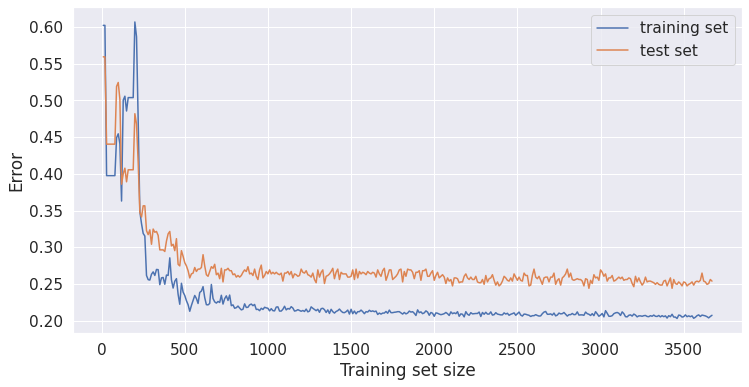

In [99]:
### Initialize a list to store the errors for each training set size
errors_gbm_test = []
errors_gbm_train = []
eval_set = [(X_test, y_test)]

# Set the range of training set sizes to test
sizes = range(10, len(X_train), 10)

# Loop over the training set sizes
#'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100
for size in sizes:
    # Fit the classifier on the training set
    gbm = XGBClassifier(eval_metric="logloss")
    #gbm = GradientBoostingClassifier(n_estimators=100,
                                 #validation_fraction=0.2,
                                 #n_iter_no_change=3,
                                 #random_state=42)
    gbm.fit(X_train[:size], y_train.values.ravel()[:size], eval_set=eval_set)
    # Make predictions on the validation set
    y_pred_test = gbm.predict(X_test)
    y_pred_train = gbm.predict(X_train)

    # Calculate the error
    error_gbm_test = 1 - accuracy_score(y_test.values.ravel(), y_pred_test)
    errors_gbm_test.append(error_gbm_test)
    error_gbm_train = 1 - accuracy_score(y_train.values.ravel(), y_pred_train)
    errors_gbm_train.append(error_gbm_train)

# Plot the learning curve
plt.plot(sizes, errors_gbm_train, label='training set')
plt.plot(sizes, errors_gbm_test, label='test set')
plt.xlabel('Training set size')
plt.ylabel('Error')
plt.legend()
plt.show()

[0]	validation_0-logloss:0.69315
[1]	validation_0-logloss:0.69315
[2]	validation_0-logloss:0.69315
[3]	validation_0-logloss:0.69315
[0]	validation_0-logloss:0.69315
[1]	validation_0-logloss:0.69315
[2]	validation_0-logloss:0.69315
[3]	validation_0-logloss:0.69315
[0]	validation_0-logloss:0.69315
[1]	validation_0-logloss:0.69315
[2]	validation_0-logloss:0.69315
[3]	validation_0-logloss:0.69315
[0]	validation_0-logloss:0.69315
[1]	validation_0-logloss:0.69315
[2]	validation_0-logloss:0.69315
[3]	validation_0-logloss:0.69007
[4]	validation_0-logloss:0.68539
[5]	validation_0-logloss:0.68539
[6]	validation_0-logloss:0.68539
[7]	validation_0-logloss:0.68525
[8]	validation_0-logloss:0.68052
[9]	validation_0-logloss:0.68052
[10]	validation_0-logloss:0.67802
[11]	validation_0-logloss:0.67781
[12]	validation_0-logloss:0.67781
[13]	validation_0-logloss:0.67781
[14]	validation_0-logloss:0.67488
[15]	validation_0-logloss:0.67488
[16]	validation_0-logloss:0.67251
[17]	validation_0-logloss:0.67251
[1

[10]	validation_0-logloss:0.63833
[11]	validation_0-logloss:0.63645
[0]	validation_0-logloss:0.67830
[1]	validation_0-logloss:0.66560
[2]	validation_0-logloss:0.65909
[3]	validation_0-logloss:0.65265
[4]	validation_0-logloss:0.65113
[5]	validation_0-logloss:0.64517
[6]	validation_0-logloss:0.64132
[7]	validation_0-logloss:0.64219
[8]	validation_0-logloss:0.64025
[9]	validation_0-logloss:0.63756
[10]	validation_0-logloss:0.63718
[11]	validation_0-logloss:0.63793
[12]	validation_0-logloss:0.63957
[13]	validation_0-logloss:0.63542
[14]	validation_0-logloss:0.63683
[15]	validation_0-logloss:0.63833
[16]	validation_0-logloss:0.63999
[0]	validation_0-logloss:0.67868
[1]	validation_0-logloss:0.66408
[2]	validation_0-logloss:0.65517
[3]	validation_0-logloss:0.65405
[4]	validation_0-logloss:0.65019
[5]	validation_0-logloss:0.64776
[6]	validation_0-logloss:0.64353
[7]	validation_0-logloss:0.63959
[8]	validation_0-logloss:0.63769
[9]	validation_0-logloss:0.63196
[10]	validation_0-logloss:0.63402


[0]	validation_0-logloss:0.67083
[1]	validation_0-logloss:0.65284
[2]	validation_0-logloss:0.63961
[3]	validation_0-logloss:0.62746
[4]	validation_0-logloss:0.61578
[5]	validation_0-logloss:0.61088
[6]	validation_0-logloss:0.60490
[7]	validation_0-logloss:0.59926
[8]	validation_0-logloss:0.59871
[9]	validation_0-logloss:0.59593
[10]	validation_0-logloss:0.59255
[11]	validation_0-logloss:0.59213
[12]	validation_0-logloss:0.59328
[13]	validation_0-logloss:0.58909
[14]	validation_0-logloss:0.58861
[15]	validation_0-logloss:0.58634
[16]	validation_0-logloss:0.58585
[17]	validation_0-logloss:0.58496
[18]	validation_0-logloss:0.57943
[19]	validation_0-logloss:0.58103
[20]	validation_0-logloss:0.57946
[0]	validation_0-logloss:0.67001
[1]	validation_0-logloss:0.65219
[2]	validation_0-logloss:0.63488
[3]	validation_0-logloss:0.62934
[4]	validation_0-logloss:0.62270
[5]	validation_0-logloss:0.61223
[6]	validation_0-logloss:0.60713
[7]	validation_0-logloss:0.59916
[8]	validation_0-logloss:0.59062

[19]	validation_0-logloss:0.55707
[20]	validation_0-logloss:0.55599
[21]	validation_0-logloss:0.55707
[22]	validation_0-logloss:0.55603
[23]	validation_0-logloss:0.55509
[24]	validation_0-logloss:0.55617
[25]	validation_0-logloss:0.55627
[26]	validation_0-logloss:0.55537
[0]	validation_0-logloss:0.66468
[1]	validation_0-logloss:0.64470
[2]	validation_0-logloss:0.63022
[3]	validation_0-logloss:0.61182
[4]	validation_0-logloss:0.60585
[5]	validation_0-logloss:0.59558
[6]	validation_0-logloss:0.58877
[7]	validation_0-logloss:0.58208
[8]	validation_0-logloss:0.57628
[9]	validation_0-logloss:0.57369
[10]	validation_0-logloss:0.57235
[11]	validation_0-logloss:0.56788
[12]	validation_0-logloss:0.56711
[13]	validation_0-logloss:0.56438
[14]	validation_0-logloss:0.56239
[15]	validation_0-logloss:0.56228
[16]	validation_0-logloss:0.56058
[17]	validation_0-logloss:0.55908
[18]	validation_0-logloss:0.55858
[19]	validation_0-logloss:0.55714
[20]	validation_0-logloss:0.55596
[21]	validation_0-loglos

[13]	validation_0-logloss:0.55539
[14]	validation_0-logloss:0.55531
[15]	validation_0-logloss:0.55268
[16]	validation_0-logloss:0.55245
[17]	validation_0-logloss:0.54881
[18]	validation_0-logloss:0.54675
[19]	validation_0-logloss:0.54850
[20]	validation_0-logloss:0.54688
[0]	validation_0-logloss:0.66478
[1]	validation_0-logloss:0.64566
[2]	validation_0-logloss:0.63082
[3]	validation_0-logloss:0.61426
[4]	validation_0-logloss:0.60007
[5]	validation_0-logloss:0.58943
[6]	validation_0-logloss:0.58168
[7]	validation_0-logloss:0.57594
[8]	validation_0-logloss:0.57045
[9]	validation_0-logloss:0.56563
[10]	validation_0-logloss:0.56289
[11]	validation_0-logloss:0.56235
[12]	validation_0-logloss:0.56111
[13]	validation_0-logloss:0.56118
[14]	validation_0-logloss:0.55997
[15]	validation_0-logloss:0.55918
[16]	validation_0-logloss:0.55798
[17]	validation_0-logloss:0.55775
[18]	validation_0-logloss:0.55848
[19]	validation_0-logloss:0.55956
[0]	validation_0-logloss:0.66566
[1]	validation_0-logloss:

[5]	validation_0-logloss:0.58594
[6]	validation_0-logloss:0.57868
[7]	validation_0-logloss:0.57452
[8]	validation_0-logloss:0.56723
[9]	validation_0-logloss:0.56275
[10]	validation_0-logloss:0.55860
[11]	validation_0-logloss:0.55766
[12]	validation_0-logloss:0.55582
[13]	validation_0-logloss:0.55239
[14]	validation_0-logloss:0.54957
[15]	validation_0-logloss:0.54739
[16]	validation_0-logloss:0.54601
[17]	validation_0-logloss:0.54381
[18]	validation_0-logloss:0.54205
[19]	validation_0-logloss:0.53963
[20]	validation_0-logloss:0.53905
[21]	validation_0-logloss:0.53938
[22]	validation_0-logloss:0.53953
[23]	validation_0-logloss:0.53952
[0]	validation_0-logloss:0.66516
[1]	validation_0-logloss:0.64863
[2]	validation_0-logloss:0.62989
[3]	validation_0-logloss:0.61514
[4]	validation_0-logloss:0.60177
[5]	validation_0-logloss:0.59256
[6]	validation_0-logloss:0.58324
[7]	validation_0-logloss:0.57663
[8]	validation_0-logloss:0.57374
[9]	validation_0-logloss:0.56831
[10]	validation_0-logloss:0.5

[13]	validation_0-logloss:0.54933
[14]	validation_0-logloss:0.54864
[15]	validation_0-logloss:0.54602
[16]	validation_0-logloss:0.54547
[17]	validation_0-logloss:0.54505
[18]	validation_0-logloss:0.54282
[19]	validation_0-logloss:0.54100
[20]	validation_0-logloss:0.53891
[21]	validation_0-logloss:0.53831
[22]	validation_0-logloss:0.53831
[23]	validation_0-logloss:0.53827
[24]	validation_0-logloss:0.53650
[25]	validation_0-logloss:0.53542
[26]	validation_0-logloss:0.53436
[27]	validation_0-logloss:0.53390
[28]	validation_0-logloss:0.53488
[29]	validation_0-logloss:0.53388
[30]	validation_0-logloss:0.53472
[31]	validation_0-logloss:0.53565
[32]	validation_0-logloss:0.53487
[0]	validation_0-logloss:0.66410
[1]	validation_0-logloss:0.64130
[2]	validation_0-logloss:0.62630
[3]	validation_0-logloss:0.60919
[4]	validation_0-logloss:0.59658
[5]	validation_0-logloss:0.58967
[6]	validation_0-logloss:0.58136
[7]	validation_0-logloss:0.57391
[8]	validation_0-logloss:0.56746
[9]	validation_0-loglos

[2]	validation_0-logloss:0.62686
[3]	validation_0-logloss:0.61064
[4]	validation_0-logloss:0.59574
[5]	validation_0-logloss:0.58508
[6]	validation_0-logloss:0.57805
[7]	validation_0-logloss:0.56977
[8]	validation_0-logloss:0.56200
[9]	validation_0-logloss:0.55598
[10]	validation_0-logloss:0.55295
[11]	validation_0-logloss:0.55039
[12]	validation_0-logloss:0.54997
[13]	validation_0-logloss:0.54728
[14]	validation_0-logloss:0.54625
[15]	validation_0-logloss:0.54220
[16]	validation_0-logloss:0.54115
[17]	validation_0-logloss:0.53898
[18]	validation_0-logloss:0.53684
[19]	validation_0-logloss:0.53407
[20]	validation_0-logloss:0.53481
[21]	validation_0-logloss:0.53241
[22]	validation_0-logloss:0.53102
[23]	validation_0-logloss:0.53046
[24]	validation_0-logloss:0.52974
[25]	validation_0-logloss:0.53035
[26]	validation_0-logloss:0.53089
[27]	validation_0-logloss:0.53077
[0]	validation_0-logloss:0.66421
[1]	validation_0-logloss:0.64089
[2]	validation_0-logloss:0.62229
[3]	validation_0-logloss:

[10]	validation_0-logloss:0.55393
[11]	validation_0-logloss:0.54927
[12]	validation_0-logloss:0.54509
[13]	validation_0-logloss:0.54137
[14]	validation_0-logloss:0.53820
[15]	validation_0-logloss:0.53507
[16]	validation_0-logloss:0.53344
[17]	validation_0-logloss:0.53308
[18]	validation_0-logloss:0.53419
[19]	validation_0-logloss:0.53527
[20]	validation_0-logloss:0.53548
[0]	validation_0-logloss:0.66424
[1]	validation_0-logloss:0.63900
[2]	validation_0-logloss:0.62241
[3]	validation_0-logloss:0.60862
[4]	validation_0-logloss:0.59353
[5]	validation_0-logloss:0.59077
[6]	validation_0-logloss:0.58125
[7]	validation_0-logloss:0.57108
[8]	validation_0-logloss:0.56440
[9]	validation_0-logloss:0.56094
[10]	validation_0-logloss:0.55647
[11]	validation_0-logloss:0.55038
[12]	validation_0-logloss:0.54666
[13]	validation_0-logloss:0.54420
[14]	validation_0-logloss:0.54155
[15]	validation_0-logloss:0.53982
[16]	validation_0-logloss:0.53881
[17]	validation_0-logloss:0.53861
[18]	validation_0-loglos

[3]	validation_0-logloss:0.60882
[4]	validation_0-logloss:0.59772
[5]	validation_0-logloss:0.58577
[6]	validation_0-logloss:0.57575
[7]	validation_0-logloss:0.56647
[8]	validation_0-logloss:0.56218
[9]	validation_0-logloss:0.55597
[10]	validation_0-logloss:0.54961
[11]	validation_0-logloss:0.54610
[12]	validation_0-logloss:0.54104
[13]	validation_0-logloss:0.53774
[14]	validation_0-logloss:0.53733
[15]	validation_0-logloss:0.53602
[16]	validation_0-logloss:0.53567
[17]	validation_0-logloss:0.53428
[18]	validation_0-logloss:0.53399
[19]	validation_0-logloss:0.53391
[20]	validation_0-logloss:0.53167
[21]	validation_0-logloss:0.53107
[22]	validation_0-logloss:0.52954
[23]	validation_0-logloss:0.53017
[24]	validation_0-logloss:0.52905
[25]	validation_0-logloss:0.52659
[26]	validation_0-logloss:0.52610
[27]	validation_0-logloss:0.52431
[28]	validation_0-logloss:0.52247
[29]	validation_0-logloss:0.52309
[30]	validation_0-logloss:0.52281
[31]	validation_0-logloss:0.52106
[32]	validation_0-log

[4]	validation_0-logloss:0.59777
[5]	validation_0-logloss:0.58626
[6]	validation_0-logloss:0.57623
[7]	validation_0-logloss:0.56761
[8]	validation_0-logloss:0.56122
[9]	validation_0-logloss:0.55664
[10]	validation_0-logloss:0.55236
[11]	validation_0-logloss:0.54808
[12]	validation_0-logloss:0.54628
[13]	validation_0-logloss:0.54378
[14]	validation_0-logloss:0.54017
[15]	validation_0-logloss:0.53837
[16]	validation_0-logloss:0.53690
[17]	validation_0-logloss:0.53442
[18]	validation_0-logloss:0.53430
[19]	validation_0-logloss:0.53410
[20]	validation_0-logloss:0.53293
[21]	validation_0-logloss:0.53266
[22]	validation_0-logloss:0.53159
[23]	validation_0-logloss:0.53051
[24]	validation_0-logloss:0.53032
[25]	validation_0-logloss:0.52784
[26]	validation_0-logloss:0.52813
[27]	validation_0-logloss:0.52866
[28]	validation_0-logloss:0.52775
[29]	validation_0-logloss:0.52647
[30]	validation_0-logloss:0.52507
[31]	validation_0-logloss:0.52434
[32]	validation_0-logloss:0.52367
[33]	validation_0-lo

[27]	validation_0-logloss:0.52261
[28]	validation_0-logloss:0.52250
[29]	validation_0-logloss:0.52129
[30]	validation_0-logloss:0.52037
[31]	validation_0-logloss:0.51955
[32]	validation_0-logloss:0.51971
[33]	validation_0-logloss:0.51987
[34]	validation_0-logloss:0.52038
[0]	validation_0-logloss:0.66532
[1]	validation_0-logloss:0.64347
[2]	validation_0-logloss:0.62769
[3]	validation_0-logloss:0.61271
[4]	validation_0-logloss:0.60035
[5]	validation_0-logloss:0.58736
[6]	validation_0-logloss:0.57908
[7]	validation_0-logloss:0.57138
[8]	validation_0-logloss:0.56724
[9]	validation_0-logloss:0.56075
[10]	validation_0-logloss:0.55540
[11]	validation_0-logloss:0.54961
[12]	validation_0-logloss:0.54540
[13]	validation_0-logloss:0.54221
[14]	validation_0-logloss:0.53870
[15]	validation_0-logloss:0.53644
[16]	validation_0-logloss:0.53668
[17]	validation_0-logloss:0.53579
[18]	validation_0-logloss:0.53328
[19]	validation_0-logloss:0.53090
[20]	validation_0-logloss:0.52800
[21]	validation_0-loglos

[30]	validation_0-logloss:0.51830
[31]	validation_0-logloss:0.51720
[32]	validation_0-logloss:0.51668
[33]	validation_0-logloss:0.51743
[34]	validation_0-logloss:0.51762
[0]	validation_0-logloss:0.66406
[1]	validation_0-logloss:0.63963
[2]	validation_0-logloss:0.61989
[3]	validation_0-logloss:0.60487
[4]	validation_0-logloss:0.59284
[5]	validation_0-logloss:0.58126
[6]	validation_0-logloss:0.57193
[7]	validation_0-logloss:0.56384
[8]	validation_0-logloss:0.55767
[9]	validation_0-logloss:0.55294
[10]	validation_0-logloss:0.54869
[11]	validation_0-logloss:0.54524
[12]	validation_0-logloss:0.54231
[13]	validation_0-logloss:0.53999
[14]	validation_0-logloss:0.53903
[15]	validation_0-logloss:0.53817
[16]	validation_0-logloss:0.53638
[17]	validation_0-logloss:0.53318
[18]	validation_0-logloss:0.53173
[19]	validation_0-logloss:0.53144
[20]	validation_0-logloss:0.53029
[21]	validation_0-logloss:0.52882
[22]	validation_0-logloss:0.52874
[23]	validation_0-logloss:0.52794
[24]	validation_0-loglos

[37]	validation_0-logloss:0.51274
[38]	validation_0-logloss:0.51311
[39]	validation_0-logloss:0.51388
[40]	validation_0-logloss:0.51242
[41]	validation_0-logloss:0.51164
[42]	validation_0-logloss:0.51114
[43]	validation_0-logloss:0.51107
[44]	validation_0-logloss:0.51080
[45]	validation_0-logloss:0.51133
[46]	validation_0-logloss:0.51233
[47]	validation_0-logloss:0.51255
[0]	validation_0-logloss:0.66332
[1]	validation_0-logloss:0.64268
[2]	validation_0-logloss:0.62203
[3]	validation_0-logloss:0.60528
[4]	validation_0-logloss:0.59155
[5]	validation_0-logloss:0.58310
[6]	validation_0-logloss:0.57465
[7]	validation_0-logloss:0.56709
[8]	validation_0-logloss:0.56182
[9]	validation_0-logloss:0.55413
[10]	validation_0-logloss:0.55012
[11]	validation_0-logloss:0.54575
[12]	validation_0-logloss:0.54156
[13]	validation_0-logloss:0.53896
[14]	validation_0-logloss:0.53616
[15]	validation_0-logloss:0.53334
[16]	validation_0-logloss:0.53043
[17]	validation_0-logloss:0.52809
[18]	validation_0-loglos

[9]	validation_0-logloss:0.55297
[10]	validation_0-logloss:0.54809
[11]	validation_0-logloss:0.54550
[12]	validation_0-logloss:0.54441
[13]	validation_0-logloss:0.54052
[14]	validation_0-logloss:0.53828
[15]	validation_0-logloss:0.53712
[16]	validation_0-logloss:0.53318
[17]	validation_0-logloss:0.53227
[18]	validation_0-logloss:0.53047
[19]	validation_0-logloss:0.53064
[20]	validation_0-logloss:0.53024
[21]	validation_0-logloss:0.53016
[22]	validation_0-logloss:0.52888
[23]	validation_0-logloss:0.52832
[24]	validation_0-logloss:0.52826
[25]	validation_0-logloss:0.52687
[26]	validation_0-logloss:0.52529
[27]	validation_0-logloss:0.52384
[28]	validation_0-logloss:0.52192
[29]	validation_0-logloss:0.52042
[30]	validation_0-logloss:0.52028
[31]	validation_0-logloss:0.51960
[32]	validation_0-logloss:0.51976
[33]	validation_0-logloss:0.52007
[34]	validation_0-logloss:0.52035
[0]	validation_0-logloss:0.66304
[1]	validation_0-logloss:0.63975
[2]	validation_0-logloss:0.62000
[3]	validation_0-l

[18]	validation_0-logloss:0.53093
[19]	validation_0-logloss:0.52826
[20]	validation_0-logloss:0.52686
[21]	validation_0-logloss:0.52448
[22]	validation_0-logloss:0.52380
[23]	validation_0-logloss:0.52186
[24]	validation_0-logloss:0.51963
[25]	validation_0-logloss:0.51947
[26]	validation_0-logloss:0.51923
[27]	validation_0-logloss:0.51845
[28]	validation_0-logloss:0.51884
[29]	validation_0-logloss:0.51868
[30]	validation_0-logloss:0.51856
[0]	validation_0-logloss:0.66385
[1]	validation_0-logloss:0.63894
[2]	validation_0-logloss:0.61960
[3]	validation_0-logloss:0.60471
[4]	validation_0-logloss:0.59156
[5]	validation_0-logloss:0.58029
[6]	validation_0-logloss:0.57117
[7]	validation_0-logloss:0.56593
[8]	validation_0-logloss:0.56107
[9]	validation_0-logloss:0.55379
[10]	validation_0-logloss:0.55021
[11]	validation_0-logloss:0.54632
[12]	validation_0-logloss:0.54406
[13]	validation_0-logloss:0.54339
[14]	validation_0-logloss:0.54107
[15]	validation_0-logloss:0.53783
[16]	validation_0-loglos

[6]	validation_0-logloss:0.57407
[7]	validation_0-logloss:0.56724
[8]	validation_0-logloss:0.56030
[9]	validation_0-logloss:0.55374
[10]	validation_0-logloss:0.54984
[11]	validation_0-logloss:0.54635
[12]	validation_0-logloss:0.54341
[13]	validation_0-logloss:0.54201
[14]	validation_0-logloss:0.54038
[15]	validation_0-logloss:0.53738
[16]	validation_0-logloss:0.53435
[17]	validation_0-logloss:0.53118
[18]	validation_0-logloss:0.52888
[19]	validation_0-logloss:0.52665
[20]	validation_0-logloss:0.52506
[21]	validation_0-logloss:0.52433
[22]	validation_0-logloss:0.52520
[23]	validation_0-logloss:0.52500
[0]	validation_0-logloss:0.66439
[1]	validation_0-logloss:0.63984
[2]	validation_0-logloss:0.62315
[3]	validation_0-logloss:0.60760
[4]	validation_0-logloss:0.59528
[5]	validation_0-logloss:0.58457
[6]	validation_0-logloss:0.57446
[7]	validation_0-logloss:0.56559
[8]	validation_0-logloss:0.55810
[9]	validation_0-logloss:0.55381
[10]	validation_0-logloss:0.54935
[11]	validation_0-logloss:0.

[25]	validation_0-logloss:0.52160
[26]	validation_0-logloss:0.52010
[27]	validation_0-logloss:0.51950
[28]	validation_0-logloss:0.51936
[29]	validation_0-logloss:0.52001
[30]	validation_0-logloss:0.51982
[31]	validation_0-logloss:0.52050
[0]	validation_0-logloss:0.66352
[1]	validation_0-logloss:0.64138
[2]	validation_0-logloss:0.62266
[3]	validation_0-logloss:0.60747
[4]	validation_0-logloss:0.59566
[5]	validation_0-logloss:0.58532
[6]	validation_0-logloss:0.57511
[7]	validation_0-logloss:0.56645
[8]	validation_0-logloss:0.56134
[9]	validation_0-logloss:0.55487
[10]	validation_0-logloss:0.54988
[11]	validation_0-logloss:0.54546
[12]	validation_0-logloss:0.54244
[13]	validation_0-logloss:0.53870
[14]	validation_0-logloss:0.53517
[15]	validation_0-logloss:0.53235
[16]	validation_0-logloss:0.53137
[17]	validation_0-logloss:0.52862
[18]	validation_0-logloss:0.52727
[19]	validation_0-logloss:0.52746
[20]	validation_0-logloss:0.52768
[21]	validation_0-logloss:0.52732
[0]	validation_0-logloss

[14]	validation_0-logloss:0.53547
[15]	validation_0-logloss:0.53153
[16]	validation_0-logloss:0.52893
[17]	validation_0-logloss:0.52893
[18]	validation_0-logloss:0.52745
[19]	validation_0-logloss:0.52451
[20]	validation_0-logloss:0.52297
[21]	validation_0-logloss:0.52234
[22]	validation_0-logloss:0.52136
[23]	validation_0-logloss:0.51997
[24]	validation_0-logloss:0.51900
[25]	validation_0-logloss:0.51824
[26]	validation_0-logloss:0.51700
[27]	validation_0-logloss:0.51684
[28]	validation_0-logloss:0.51611
[29]	validation_0-logloss:0.51628
[30]	validation_0-logloss:0.51618
[31]	validation_0-logloss:0.51529
[32]	validation_0-logloss:0.51536
[33]	validation_0-logloss:0.51436
[34]	validation_0-logloss:0.51468
[35]	validation_0-logloss:0.51451
[36]	validation_0-logloss:0.51476
[0]	validation_0-logloss:0.66335
[1]	validation_0-logloss:0.63878
[2]	validation_0-logloss:0.62083
[3]	validation_0-logloss:0.60634
[4]	validation_0-logloss:0.59375
[5]	validation_0-logloss:0.58145
[6]	validation_0-log

[12]	validation_0-logloss:0.53945
[13]	validation_0-logloss:0.53816
[14]	validation_0-logloss:0.53473
[15]	validation_0-logloss:0.53232
[16]	validation_0-logloss:0.53073
[17]	validation_0-logloss:0.52922
[18]	validation_0-logloss:0.52799
[19]	validation_0-logloss:0.52652
[20]	validation_0-logloss:0.52543
[21]	validation_0-logloss:0.52303
[22]	validation_0-logloss:0.52148
[23]	validation_0-logloss:0.52029
[24]	validation_0-logloss:0.51999
[25]	validation_0-logloss:0.51910
[26]	validation_0-logloss:0.51746
[27]	validation_0-logloss:0.51679
[28]	validation_0-logloss:0.51670
[29]	validation_0-logloss:0.51659
[30]	validation_0-logloss:0.51532
[31]	validation_0-logloss:0.51597
[32]	validation_0-logloss:0.51574
[33]	validation_0-logloss:0.51535
[0]	validation_0-logloss:0.66356
[1]	validation_0-logloss:0.64055
[2]	validation_0-logloss:0.62200
[3]	validation_0-logloss:0.60683
[4]	validation_0-logloss:0.59270
[5]	validation_0-logloss:0.58298
[6]	validation_0-logloss:0.57305
[7]	validation_0-logl

[17]	validation_0-logloss:0.53138
[18]	validation_0-logloss:0.53086
[19]	validation_0-logloss:0.52781
[20]	validation_0-logloss:0.52511
[21]	validation_0-logloss:0.52395
[22]	validation_0-logloss:0.52375
[23]	validation_0-logloss:0.52178
[24]	validation_0-logloss:0.51981
[25]	validation_0-logloss:0.51791
[26]	validation_0-logloss:0.51795
[27]	validation_0-logloss:0.51769
[28]	validation_0-logloss:0.51743
[29]	validation_0-logloss:0.51739
[30]	validation_0-logloss:0.51672
[31]	validation_0-logloss:0.51716
[32]	validation_0-logloss:0.51676
[0]	validation_0-logloss:0.66346
[1]	validation_0-logloss:0.63900
[2]	validation_0-logloss:0.62030
[3]	validation_0-logloss:0.60565
[4]	validation_0-logloss:0.59168
[5]	validation_0-logloss:0.58079
[6]	validation_0-logloss:0.57116
[7]	validation_0-logloss:0.56576
[8]	validation_0-logloss:0.55897
[9]	validation_0-logloss:0.55294
[10]	validation_0-logloss:0.54828
[11]	validation_0-logloss:0.54334
[12]	validation_0-logloss:0.53867
[13]	validation_0-loglos

[20]	validation_0-logloss:0.52060
[21]	validation_0-logloss:0.51939
[22]	validation_0-logloss:0.51871
[23]	validation_0-logloss:0.51758
[24]	validation_0-logloss:0.51655
[25]	validation_0-logloss:0.51633
[26]	validation_0-logloss:0.51511
[27]	validation_0-logloss:0.51520
[28]	validation_0-logloss:0.51473
[29]	validation_0-logloss:0.51477
[30]	validation_0-logloss:0.51576
[31]	validation_0-logloss:0.51537
[0]	validation_0-logloss:0.66551
[1]	validation_0-logloss:0.64108
[2]	validation_0-logloss:0.62215
[3]	validation_0-logloss:0.60541
[4]	validation_0-logloss:0.59139
[5]	validation_0-logloss:0.57970
[6]	validation_0-logloss:0.57106
[7]	validation_0-logloss:0.56317
[8]	validation_0-logloss:0.55663
[9]	validation_0-logloss:0.55171
[10]	validation_0-logloss:0.54553
[11]	validation_0-logloss:0.54161
[12]	validation_0-logloss:0.53838
[13]	validation_0-logloss:0.53610
[14]	validation_0-logloss:0.53343
[15]	validation_0-logloss:0.53157
[16]	validation_0-logloss:0.53139
[17]	validation_0-loglos

[37]	validation_0-logloss:0.51081
[38]	validation_0-logloss:0.51109
[39]	validation_0-logloss:0.51181
[40]	validation_0-logloss:0.51171
[0]	validation_0-logloss:0.66540
[1]	validation_0-logloss:0.64160
[2]	validation_0-logloss:0.62031
[3]	validation_0-logloss:0.60368
[4]	validation_0-logloss:0.59263
[5]	validation_0-logloss:0.58385
[6]	validation_0-logloss:0.57504
[7]	validation_0-logloss:0.56667
[8]	validation_0-logloss:0.55946
[9]	validation_0-logloss:0.55449
[10]	validation_0-logloss:0.55132
[11]	validation_0-logloss:0.54614
[12]	validation_0-logloss:0.54183
[13]	validation_0-logloss:0.53850
[14]	validation_0-logloss:0.53609
[15]	validation_0-logloss:0.53533
[16]	validation_0-logloss:0.53157
[17]	validation_0-logloss:0.52876
[18]	validation_0-logloss:0.52811
[19]	validation_0-logloss:0.52768
[20]	validation_0-logloss:0.52719
[21]	validation_0-logloss:0.52632
[22]	validation_0-logloss:0.52426
[23]	validation_0-logloss:0.52357
[24]	validation_0-logloss:0.52196
[25]	validation_0-loglos

[12]	validation_0-logloss:0.53829
[13]	validation_0-logloss:0.53578
[14]	validation_0-logloss:0.53248
[15]	validation_0-logloss:0.52951
[16]	validation_0-logloss:0.52732
[17]	validation_0-logloss:0.52528
[18]	validation_0-logloss:0.52515
[19]	validation_0-logloss:0.52322
[20]	validation_0-logloss:0.52259
[21]	validation_0-logloss:0.52126
[22]	validation_0-logloss:0.51871
[23]	validation_0-logloss:0.51686
[24]	validation_0-logloss:0.51571
[25]	validation_0-logloss:0.51486
[26]	validation_0-logloss:0.51345
[27]	validation_0-logloss:0.51375
[28]	validation_0-logloss:0.51188
[29]	validation_0-logloss:0.51049
[30]	validation_0-logloss:0.50914
[31]	validation_0-logloss:0.50887
[32]	validation_0-logloss:0.50878
[33]	validation_0-logloss:0.50893
[34]	validation_0-logloss:0.50825
[35]	validation_0-logloss:0.50823
[36]	validation_0-logloss:0.50812
[37]	validation_0-logloss:0.50756
[38]	validation_0-logloss:0.50729
[39]	validation_0-logloss:0.50790
[40]	validation_0-logloss:0.50792
[41]	validatio

[17]	validation_0-logloss:0.52744
[18]	validation_0-logloss:0.52609
[19]	validation_0-logloss:0.52397
[20]	validation_0-logloss:0.52355
[21]	validation_0-logloss:0.52316
[22]	validation_0-logloss:0.52166
[23]	validation_0-logloss:0.52013
[24]	validation_0-logloss:0.51935
[25]	validation_0-logloss:0.51974
[26]	validation_0-logloss:0.52019
[0]	validation_0-logloss:0.66538
[1]	validation_0-logloss:0.64057
[2]	validation_0-logloss:0.62141
[3]	validation_0-logloss:0.60409
[4]	validation_0-logloss:0.59191
[5]	validation_0-logloss:0.58302
[6]	validation_0-logloss:0.57256
[7]	validation_0-logloss:0.56407
[8]	validation_0-logloss:0.55833
[9]	validation_0-logloss:0.55283
[10]	validation_0-logloss:0.54819
[11]	validation_0-logloss:0.54472
[12]	validation_0-logloss:0.54079
[13]	validation_0-logloss:0.53814
[14]	validation_0-logloss:0.53503
[15]	validation_0-logloss:0.53131
[16]	validation_0-logloss:0.53087
[17]	validation_0-logloss:0.52831
[18]	validation_0-logloss:0.52585
[19]	validation_0-loglos

[25]	validation_0-logloss:0.51799
[26]	validation_0-logloss:0.51762
[27]	validation_0-logloss:0.51624
[28]	validation_0-logloss:0.51624
[29]	validation_0-logloss:0.51562
[30]	validation_0-logloss:0.51577
[31]	validation_0-logloss:0.51573
[32]	validation_0-logloss:0.51561
[33]	validation_0-logloss:0.51437
[34]	validation_0-logloss:0.51340
[35]	validation_0-logloss:0.51351
[36]	validation_0-logloss:0.51396
[37]	validation_0-logloss:0.51373
[0]	validation_0-logloss:0.66394
[1]	validation_0-logloss:0.63887
[2]	validation_0-logloss:0.61846
[3]	validation_0-logloss:0.60163
[4]	validation_0-logloss:0.58829
[5]	validation_0-logloss:0.57739
[6]	validation_0-logloss:0.56730
[7]	validation_0-logloss:0.55995
[8]	validation_0-logloss:0.55320
[9]	validation_0-logloss:0.54702
[10]	validation_0-logloss:0.54271
[11]	validation_0-logloss:0.53846
[12]	validation_0-logloss:0.53580
[13]	validation_0-logloss:0.53421
[14]	validation_0-logloss:0.53169
[15]	validation_0-logloss:0.52886
[16]	validation_0-loglos

[18]	validation_0-logloss:0.52720
[19]	validation_0-logloss:0.52531
[20]	validation_0-logloss:0.52359
[21]	validation_0-logloss:0.52309
[22]	validation_0-logloss:0.52277
[23]	validation_0-logloss:0.52205
[24]	validation_0-logloss:0.52062
[25]	validation_0-logloss:0.51968
[26]	validation_0-logloss:0.51986
[27]	validation_0-logloss:0.51923
[28]	validation_0-logloss:0.51670
[29]	validation_0-logloss:0.51551
[30]	validation_0-logloss:0.51492
[31]	validation_0-logloss:0.51471
[32]	validation_0-logloss:0.51438
[33]	validation_0-logloss:0.51340
[34]	validation_0-logloss:0.51306
[35]	validation_0-logloss:0.51271
[36]	validation_0-logloss:0.51273
[37]	validation_0-logloss:0.51224
[38]	validation_0-logloss:0.51276
[39]	validation_0-logloss:0.51201
[40]	validation_0-logloss:0.51118
[41]	validation_0-logloss:0.51116
[42]	validation_0-logloss:0.51122
[43]	validation_0-logloss:0.51102
[44]	validation_0-logloss:0.51149
[45]	validation_0-logloss:0.51077
[46]	validation_0-logloss:0.51094
[47]	validatio

[31]	validation_0-logloss:0.51376
[32]	validation_0-logloss:0.51282
[33]	validation_0-logloss:0.51149
[34]	validation_0-logloss:0.51173
[35]	validation_0-logloss:0.51208
[0]	validation_0-logloss:0.66541
[1]	validation_0-logloss:0.64133
[2]	validation_0-logloss:0.62311
[3]	validation_0-logloss:0.60739
[4]	validation_0-logloss:0.59416
[5]	validation_0-logloss:0.58278
[6]	validation_0-logloss:0.57311
[7]	validation_0-logloss:0.56462
[8]	validation_0-logloss:0.55703
[9]	validation_0-logloss:0.55135
[10]	validation_0-logloss:0.54602
[11]	validation_0-logloss:0.54211
[12]	validation_0-logloss:0.53941
[13]	validation_0-logloss:0.53612
[14]	validation_0-logloss:0.53198
[15]	validation_0-logloss:0.52974
[16]	validation_0-logloss:0.52908
[17]	validation_0-logloss:0.52850
[18]	validation_0-logloss:0.52634
[19]	validation_0-logloss:0.52615
[20]	validation_0-logloss:0.52577
[21]	validation_0-logloss:0.52506
[22]	validation_0-logloss:0.52315
[23]	validation_0-logloss:0.52262
[24]	validation_0-loglos

[4]	validation_0-logloss:0.59198
[5]	validation_0-logloss:0.58080
[6]	validation_0-logloss:0.57121
[7]	validation_0-logloss:0.56368
[8]	validation_0-logloss:0.55702
[9]	validation_0-logloss:0.55273
[10]	validation_0-logloss:0.54803
[11]	validation_0-logloss:0.54373
[12]	validation_0-logloss:0.53974
[13]	validation_0-logloss:0.53574
[14]	validation_0-logloss:0.53302
[15]	validation_0-logloss:0.53088
[16]	validation_0-logloss:0.52831
[17]	validation_0-logloss:0.52786
[18]	validation_0-logloss:0.52519
[19]	validation_0-logloss:0.52505
[20]	validation_0-logloss:0.52475
[21]	validation_0-logloss:0.52196
[22]	validation_0-logloss:0.51989
[23]	validation_0-logloss:0.51820
[24]	validation_0-logloss:0.51653
[25]	validation_0-logloss:0.51504
[26]	validation_0-logloss:0.51410
[27]	validation_0-logloss:0.51400
[28]	validation_0-logloss:0.51281
[29]	validation_0-logloss:0.51162
[30]	validation_0-logloss:0.51023
[31]	validation_0-logloss:0.50971
[32]	validation_0-logloss:0.51007
[33]	validation_0-lo

[38]	validation_0-logloss:0.51057
[39]	validation_0-logloss:0.50999
[40]	validation_0-logloss:0.50994
[41]	validation_0-logloss:0.51000
[42]	validation_0-logloss:0.50937
[43]	validation_0-logloss:0.50915
[44]	validation_0-logloss:0.50955
[45]	validation_0-logloss:0.50931
[46]	validation_0-logloss:0.50994
[0]	validation_0-logloss:0.66315
[1]	validation_0-logloss:0.63938
[2]	validation_0-logloss:0.62071
[3]	validation_0-logloss:0.60882
[4]	validation_0-logloss:0.59555
[5]	validation_0-logloss:0.58568
[6]	validation_0-logloss:0.57470
[7]	validation_0-logloss:0.56586
[8]	validation_0-logloss:0.55920
[9]	validation_0-logloss:0.55312
[10]	validation_0-logloss:0.54789
[11]	validation_0-logloss:0.54401
[12]	validation_0-logloss:0.53970
[13]	validation_0-logloss:0.53694
[14]	validation_0-logloss:0.53273
[15]	validation_0-logloss:0.53054
[16]	validation_0-logloss:0.52831
[17]	validation_0-logloss:0.52715
[18]	validation_0-logloss:0.52611
[19]	validation_0-logloss:0.52345
[20]	validation_0-loglos

[18]	validation_0-logloss:0.52675
[19]	validation_0-logloss:0.52499
[20]	validation_0-logloss:0.52329
[21]	validation_0-logloss:0.52189
[22]	validation_0-logloss:0.52171
[23]	validation_0-logloss:0.51975
[24]	validation_0-logloss:0.51938
[25]	validation_0-logloss:0.51877
[26]	validation_0-logloss:0.51729
[27]	validation_0-logloss:0.51559
[28]	validation_0-logloss:0.51561
[29]	validation_0-logloss:0.51520
[30]	validation_0-logloss:0.51477
[31]	validation_0-logloss:0.51481
[32]	validation_0-logloss:0.51286
[33]	validation_0-logloss:0.51308
[34]	validation_0-logloss:0.51290
[35]	validation_0-logloss:0.51196
[36]	validation_0-logloss:0.51082
[37]	validation_0-logloss:0.51072
[38]	validation_0-logloss:0.51054
[39]	validation_0-logloss:0.51082
[40]	validation_0-logloss:0.51097
[0]	validation_0-logloss:0.66388
[1]	validation_0-logloss:0.64024
[2]	validation_0-logloss:0.62066
[3]	validation_0-logloss:0.60527
[4]	validation_0-logloss:0.59215
[5]	validation_0-logloss:0.57969
[6]	validation_0-log

[6]	validation_0-logloss:0.57205
[7]	validation_0-logloss:0.56417
[8]	validation_0-logloss:0.55703
[9]	validation_0-logloss:0.55126
[10]	validation_0-logloss:0.54662
[11]	validation_0-logloss:0.54225
[12]	validation_0-logloss:0.53818
[13]	validation_0-logloss:0.53609
[14]	validation_0-logloss:0.53262
[15]	validation_0-logloss:0.53094
[16]	validation_0-logloss:0.52926
[17]	validation_0-logloss:0.52888
[18]	validation_0-logloss:0.52738
[19]	validation_0-logloss:0.52682
[20]	validation_0-logloss:0.52443
[21]	validation_0-logloss:0.52206
[22]	validation_0-logloss:0.52066
[23]	validation_0-logloss:0.52078
[24]	validation_0-logloss:0.52092
[25]	validation_0-logloss:0.52047
[26]	validation_0-logloss:0.51983
[27]	validation_0-logloss:0.51805
[28]	validation_0-logloss:0.51702
[29]	validation_0-logloss:0.51690
[30]	validation_0-logloss:0.51645
[31]	validation_0-logloss:0.51611
[32]	validation_0-logloss:0.51517
[33]	validation_0-logloss:0.51433
[34]	validation_0-logloss:0.51266
[35]	validation_0-

[9]	validation_0-logloss:0.54891
[10]	validation_0-logloss:0.54359
[11]	validation_0-logloss:0.53991
[12]	validation_0-logloss:0.53709
[13]	validation_0-logloss:0.53538
[14]	validation_0-logloss:0.53214
[15]	validation_0-logloss:0.53108
[16]	validation_0-logloss:0.52922
[17]	validation_0-logloss:0.52644
[18]	validation_0-logloss:0.52618
[19]	validation_0-logloss:0.52418
[20]	validation_0-logloss:0.52290
[21]	validation_0-logloss:0.52112
[22]	validation_0-logloss:0.52009
[23]	validation_0-logloss:0.51846
[24]	validation_0-logloss:0.51868
[25]	validation_0-logloss:0.51759
[26]	validation_0-logloss:0.51577
[27]	validation_0-logloss:0.51554
[28]	validation_0-logloss:0.51495
[29]	validation_0-logloss:0.51415
[30]	validation_0-logloss:0.51378
[31]	validation_0-logloss:0.51319
[32]	validation_0-logloss:0.51280
[33]	validation_0-logloss:0.51280
[34]	validation_0-logloss:0.51256
[35]	validation_0-logloss:0.51242
[36]	validation_0-logloss:0.51171
[37]	validation_0-logloss:0.51209
[38]	validation

[40]	validation_0-logloss:0.51034
[41]	validation_0-logloss:0.51102
[42]	validation_0-logloss:0.51090
[43]	validation_0-logloss:0.51155
[0]	validation_0-logloss:0.66341
[1]	validation_0-logloss:0.63998
[2]	validation_0-logloss:0.62010
[3]	validation_0-logloss:0.60375
[4]	validation_0-logloss:0.58943
[5]	validation_0-logloss:0.57851
[6]	validation_0-logloss:0.56961
[7]	validation_0-logloss:0.56137
[8]	validation_0-logloss:0.55533
[9]	validation_0-logloss:0.54917
[10]	validation_0-logloss:0.54442
[11]	validation_0-logloss:0.54006
[12]	validation_0-logloss:0.53730
[13]	validation_0-logloss:0.53418
[14]	validation_0-logloss:0.53320
[15]	validation_0-logloss:0.53284
[16]	validation_0-logloss:0.52952
[17]	validation_0-logloss:0.52678
[18]	validation_0-logloss:0.52404
[19]	validation_0-logloss:0.52197
[20]	validation_0-logloss:0.51975
[21]	validation_0-logloss:0.51724
[22]	validation_0-logloss:0.51595
[23]	validation_0-logloss:0.51531
[24]	validation_0-logloss:0.51525
[25]	validation_0-loglos

[8]	validation_0-logloss:0.55542
[9]	validation_0-logloss:0.54904
[10]	validation_0-logloss:0.54328
[11]	validation_0-logloss:0.53965
[12]	validation_0-logloss:0.53593
[13]	validation_0-logloss:0.53244
[14]	validation_0-logloss:0.53010
[15]	validation_0-logloss:0.52816
[16]	validation_0-logloss:0.52610
[17]	validation_0-logloss:0.52431
[18]	validation_0-logloss:0.52231
[19]	validation_0-logloss:0.51931
[20]	validation_0-logloss:0.51808
[21]	validation_0-logloss:0.51766
[22]	validation_0-logloss:0.51529
[23]	validation_0-logloss:0.51389
[24]	validation_0-logloss:0.51175
[25]	validation_0-logloss:0.51172
[26]	validation_0-logloss:0.51021
[27]	validation_0-logloss:0.51006
[28]	validation_0-logloss:0.50943
[29]	validation_0-logloss:0.50912
[30]	validation_0-logloss:0.50915
[31]	validation_0-logloss:0.50810
[32]	validation_0-logloss:0.50615
[33]	validation_0-logloss:0.50589
[34]	validation_0-logloss:0.50614
[35]	validation_0-logloss:0.50628
[36]	validation_0-logloss:0.50566
[37]	validation_

[5]	validation_0-logloss:0.57977
[6]	validation_0-logloss:0.56968
[7]	validation_0-logloss:0.56160
[8]	validation_0-logloss:0.55481
[9]	validation_0-logloss:0.55017
[10]	validation_0-logloss:0.54591
[11]	validation_0-logloss:0.54162
[12]	validation_0-logloss:0.53892
[13]	validation_0-logloss:0.53462
[14]	validation_0-logloss:0.53087
[15]	validation_0-logloss:0.52910
[16]	validation_0-logloss:0.52740
[17]	validation_0-logloss:0.52487
[18]	validation_0-logloss:0.52395
[19]	validation_0-logloss:0.52267
[20]	validation_0-logloss:0.52231
[21]	validation_0-logloss:0.52102
[22]	validation_0-logloss:0.51912
[23]	validation_0-logloss:0.51857
[24]	validation_0-logloss:0.51754
[25]	validation_0-logloss:0.51701
[26]	validation_0-logloss:0.51676
[27]	validation_0-logloss:0.51482
[28]	validation_0-logloss:0.51420
[29]	validation_0-logloss:0.51270
[30]	validation_0-logloss:0.51187
[31]	validation_0-logloss:0.51113
[32]	validation_0-logloss:0.51085
[33]	validation_0-logloss:0.51095
[34]	validation_0-l

[19]	validation_0-logloss:0.52116
[20]	validation_0-logloss:0.52021
[21]	validation_0-logloss:0.51881
[22]	validation_0-logloss:0.51693
[23]	validation_0-logloss:0.51587
[24]	validation_0-logloss:0.51476
[25]	validation_0-logloss:0.51444
[26]	validation_0-logloss:0.51380
[27]	validation_0-logloss:0.51304
[28]	validation_0-logloss:0.51355
[29]	validation_0-logloss:0.51274
[30]	validation_0-logloss:0.51045
[31]	validation_0-logloss:0.51018
[32]	validation_0-logloss:0.50945
[33]	validation_0-logloss:0.50948
[34]	validation_0-logloss:0.50853
[35]	validation_0-logloss:0.50752
[36]	validation_0-logloss:0.50762
[37]	validation_0-logloss:0.50610
[38]	validation_0-logloss:0.50619
[39]	validation_0-logloss:0.50622
[40]	validation_0-logloss:0.50582
[41]	validation_0-logloss:0.50549
[42]	validation_0-logloss:0.50562
[43]	validation_0-logloss:0.50573
[44]	validation_0-logloss:0.50607
[0]	validation_0-logloss:0.66358
[1]	validation_0-logloss:0.63944
[2]	validation_0-logloss:0.61941
[3]	validation_0-

[15]	validation_0-logloss:0.53095
[16]	validation_0-logloss:0.52826
[17]	validation_0-logloss:0.52620
[18]	validation_0-logloss:0.52479
[19]	validation_0-logloss:0.52344
[20]	validation_0-logloss:0.52145
[21]	validation_0-logloss:0.51953
[22]	validation_0-logloss:0.51832
[23]	validation_0-logloss:0.51666
[24]	validation_0-logloss:0.51606
[25]	validation_0-logloss:0.51490
[26]	validation_0-logloss:0.51424
[27]	validation_0-logloss:0.51293
[28]	validation_0-logloss:0.51305
[29]	validation_0-logloss:0.51293
[30]	validation_0-logloss:0.51276
[31]	validation_0-logloss:0.51154
[32]	validation_0-logloss:0.51169
[33]	validation_0-logloss:0.51078
[34]	validation_0-logloss:0.50946
[35]	validation_0-logloss:0.50932
[36]	validation_0-logloss:0.50854
[37]	validation_0-logloss:0.50881
[38]	validation_0-logloss:0.50851
[39]	validation_0-logloss:0.50860
[40]	validation_0-logloss:0.50830
[41]	validation_0-logloss:0.50815
[42]	validation_0-logloss:0.50790
[43]	validation_0-logloss:0.50691
[44]	validatio

[16]	validation_0-logloss:0.52400
[17]	validation_0-logloss:0.52258
[18]	validation_0-logloss:0.52090
[19]	validation_0-logloss:0.51864
[20]	validation_0-logloss:0.51758
[21]	validation_0-logloss:0.51653
[22]	validation_0-logloss:0.51494
[23]	validation_0-logloss:0.51450
[24]	validation_0-logloss:0.51348
[25]	validation_0-logloss:0.51311
[26]	validation_0-logloss:0.51267
[27]	validation_0-logloss:0.51174
[28]	validation_0-logloss:0.51172
[29]	validation_0-logloss:0.51156
[30]	validation_0-logloss:0.51126
[31]	validation_0-logloss:0.50976
[32]	validation_0-logloss:0.50911
[33]	validation_0-logloss:0.50881
[34]	validation_0-logloss:0.50897
[35]	validation_0-logloss:0.50945
[36]	validation_0-logloss:0.50976
[0]	validation_0-logloss:0.66330
[1]	validation_0-logloss:0.63999
[2]	validation_0-logloss:0.61900
[3]	validation_0-logloss:0.60329
[4]	validation_0-logloss:0.59006
[5]	validation_0-logloss:0.57887
[6]	validation_0-logloss:0.57067
[7]	validation_0-logloss:0.56333
[8]	validation_0-loglo

[22]	validation_0-logloss:0.51874
[23]	validation_0-logloss:0.51768
[24]	validation_0-logloss:0.51749
[25]	validation_0-logloss:0.51584
[26]	validation_0-logloss:0.51565
[27]	validation_0-logloss:0.51537
[28]	validation_0-logloss:0.51473
[29]	validation_0-logloss:0.51360
[30]	validation_0-logloss:0.51365
[31]	validation_0-logloss:0.51321
[32]	validation_0-logloss:0.51303
[33]	validation_0-logloss:0.51323
[34]	validation_0-logloss:0.51247
[35]	validation_0-logloss:0.51199
[36]	validation_0-logloss:0.51196
[37]	validation_0-logloss:0.51089
[38]	validation_0-logloss:0.51082
[39]	validation_0-logloss:0.50990
[40]	validation_0-logloss:0.50901
[41]	validation_0-logloss:0.50816
[42]	validation_0-logloss:0.50768
[43]	validation_0-logloss:0.50803
[44]	validation_0-logloss:0.50782
[45]	validation_0-logloss:0.50797
[0]	validation_0-logloss:0.66329
[1]	validation_0-logloss:0.63950
[2]	validation_0-logloss:0.62007
[3]	validation_0-logloss:0.60524
[4]	validation_0-logloss:0.59101
[5]	validation_0-lo

[10]	validation_0-logloss:0.54663
[11]	validation_0-logloss:0.54484
[12]	validation_0-logloss:0.54068
[13]	validation_0-logloss:0.53694
[14]	validation_0-logloss:0.53437
[15]	validation_0-logloss:0.53095
[16]	validation_0-logloss:0.53031
[17]	validation_0-logloss:0.52810
[18]	validation_0-logloss:0.52571
[19]	validation_0-logloss:0.52420
[20]	validation_0-logloss:0.52196
[21]	validation_0-logloss:0.52018
[22]	validation_0-logloss:0.52028
[23]	validation_0-logloss:0.51871
[24]	validation_0-logloss:0.51656
[25]	validation_0-logloss:0.51618
[26]	validation_0-logloss:0.51572
[27]	validation_0-logloss:0.51510
[28]	validation_0-logloss:0.51403
[29]	validation_0-logloss:0.51275
[30]	validation_0-logloss:0.51223
[31]	validation_0-logloss:0.51092
[32]	validation_0-logloss:0.51028
[33]	validation_0-logloss:0.50993
[34]	validation_0-logloss:0.50997
[35]	validation_0-logloss:0.51011
[36]	validation_0-logloss:0.51061
[0]	validation_0-logloss:0.66327
[1]	validation_0-logloss:0.64021
[2]	validation_0

[22]	validation_0-logloss:0.51850
[23]	validation_0-logloss:0.51661
[24]	validation_0-logloss:0.51589
[25]	validation_0-logloss:0.51527
[26]	validation_0-logloss:0.51509
[27]	validation_0-logloss:0.51462
[28]	validation_0-logloss:0.51413
[29]	validation_0-logloss:0.51362
[30]	validation_0-logloss:0.51282
[31]	validation_0-logloss:0.51289
[32]	validation_0-logloss:0.51326
[33]	validation_0-logloss:0.51367
[0]	validation_0-logloss:0.66350
[1]	validation_0-logloss:0.64085
[2]	validation_0-logloss:0.62017
[3]	validation_0-logloss:0.60365
[4]	validation_0-logloss:0.58970
[5]	validation_0-logloss:0.57836
[6]	validation_0-logloss:0.56890
[7]	validation_0-logloss:0.56183
[8]	validation_0-logloss:0.55528
[9]	validation_0-logloss:0.54959
[10]	validation_0-logloss:0.54453
[11]	validation_0-logloss:0.53990
[12]	validation_0-logloss:0.53615
[13]	validation_0-logloss:0.53292
[14]	validation_0-logloss:0.53013
[15]	validation_0-logloss:0.52770
[16]	validation_0-logloss:0.52560
[17]	validation_0-loglos

[26]	validation_0-logloss:0.51331
[27]	validation_0-logloss:0.51318
[28]	validation_0-logloss:0.51177
[29]	validation_0-logloss:0.51206
[30]	validation_0-logloss:0.51197
[31]	validation_0-logloss:0.51152
[32]	validation_0-logloss:0.51189
[33]	validation_0-logloss:0.51134
[34]	validation_0-logloss:0.51085
[35]	validation_0-logloss:0.51119
[36]	validation_0-logloss:0.51087
[37]	validation_0-logloss:0.51014
[38]	validation_0-logloss:0.51023
[39]	validation_0-logloss:0.51030
[40]	validation_0-logloss:0.51088
[0]	validation_0-logloss:0.66324
[1]	validation_0-logloss:0.63982
[2]	validation_0-logloss:0.61939
[3]	validation_0-logloss:0.60208
[4]	validation_0-logloss:0.58832
[5]	validation_0-logloss:0.57791
[6]	validation_0-logloss:0.56830
[7]	validation_0-logloss:0.55986
[8]	validation_0-logloss:0.55390
[9]	validation_0-logloss:0.54872
[10]	validation_0-logloss:0.54348
[11]	validation_0-logloss:0.53950
[12]	validation_0-logloss:0.53550
[13]	validation_0-logloss:0.53206
[14]	validation_0-loglos

[9]	validation_0-logloss:0.54844
[10]	validation_0-logloss:0.54455
[11]	validation_0-logloss:0.54165
[12]	validation_0-logloss:0.53650
[13]	validation_0-logloss:0.53364
[14]	validation_0-logloss:0.53009
[15]	validation_0-logloss:0.52694
[16]	validation_0-logloss:0.52451
[17]	validation_0-logloss:0.52355
[18]	validation_0-logloss:0.52184
[19]	validation_0-logloss:0.52158
[20]	validation_0-logloss:0.52027
[21]	validation_0-logloss:0.51950
[22]	validation_0-logloss:0.51867
[23]	validation_0-logloss:0.51798
[24]	validation_0-logloss:0.51780
[25]	validation_0-logloss:0.51730
[26]	validation_0-logloss:0.51494
[27]	validation_0-logloss:0.51443
[28]	validation_0-logloss:0.51407
[29]	validation_0-logloss:0.51292
[30]	validation_0-logloss:0.51274
[31]	validation_0-logloss:0.51233
[32]	validation_0-logloss:0.51119
[33]	validation_0-logloss:0.51131
[34]	validation_0-logloss:0.51147
[35]	validation_0-logloss:0.51095
[36]	validation_0-logloss:0.51024
[37]	validation_0-logloss:0.50939
[38]	validation

[36]	validation_0-logloss:0.51024
[37]	validation_0-logloss:0.50939
[38]	validation_0-logloss:0.50936
[39]	validation_0-logloss:0.50973
[40]	validation_0-logloss:0.51003
[41]	validation_0-logloss:0.50920
[42]	validation_0-logloss:0.50763
[43]	validation_0-logloss:0.50765
[44]	validation_0-logloss:0.50785
[45]	validation_0-logloss:0.50780
[0]	validation_0-logloss:0.66314
[1]	validation_0-logloss:0.63939
[2]	validation_0-logloss:0.62049
[3]	validation_0-logloss:0.60367
[4]	validation_0-logloss:0.59033
[5]	validation_0-logloss:0.57791
[6]	validation_0-logloss:0.56831
[7]	validation_0-logloss:0.56088
[8]	validation_0-logloss:0.55526
[9]	validation_0-logloss:0.54947
[10]	validation_0-logloss:0.54470
[11]	validation_0-logloss:0.54167
[12]	validation_0-logloss:0.54005
[13]	validation_0-logloss:0.53607
[14]	validation_0-logloss:0.53223
[15]	validation_0-logloss:0.53077
[16]	validation_0-logloss:0.52863
[17]	validation_0-logloss:0.52778
[18]	validation_0-logloss:0.52624
[19]	validation_0-loglos

[7]	validation_0-logloss:0.56376
[8]	validation_0-logloss:0.55725
[9]	validation_0-logloss:0.55074
[10]	validation_0-logloss:0.54602
[11]	validation_0-logloss:0.54153
[12]	validation_0-logloss:0.53730
[13]	validation_0-logloss:0.53427
[14]	validation_0-logloss:0.53115
[15]	validation_0-logloss:0.52788
[16]	validation_0-logloss:0.52622
[17]	validation_0-logloss:0.52412
[18]	validation_0-logloss:0.52363
[19]	validation_0-logloss:0.52353
[20]	validation_0-logloss:0.52262
[21]	validation_0-logloss:0.52194
[22]	validation_0-logloss:0.52141
[23]	validation_0-logloss:0.52001
[24]	validation_0-logloss:0.51898
[25]	validation_0-logloss:0.51742
[26]	validation_0-logloss:0.51576
[27]	validation_0-logloss:0.51458
[28]	validation_0-logloss:0.51337
[29]	validation_0-logloss:0.51274
[30]	validation_0-logloss:0.51237
[31]	validation_0-logloss:0.51157
[32]	validation_0-logloss:0.51184
[33]	validation_0-logloss:0.51185
[0]	validation_0-logloss:0.66301
[1]	validation_0-logloss:0.63798
[2]	validation_0-lo

[18]	validation_0-logloss:0.52021
[19]	validation_0-logloss:0.51815
[20]	validation_0-logloss:0.51799
[21]	validation_0-logloss:0.51667
[22]	validation_0-logloss:0.51540
[23]	validation_0-logloss:0.51429
[24]	validation_0-logloss:0.51350
[25]	validation_0-logloss:0.51262
[26]	validation_0-logloss:0.50955
[27]	validation_0-logloss:0.50964
[28]	validation_0-logloss:0.50850
[29]	validation_0-logloss:0.50823
[30]	validation_0-logloss:0.50668
[31]	validation_0-logloss:0.50688
[32]	validation_0-logloss:0.50625
[33]	validation_0-logloss:0.50649
[34]	validation_0-logloss:0.50667
[35]	validation_0-logloss:0.50652
[0]	validation_0-logloss:0.66312
[1]	validation_0-logloss:0.63921
[2]	validation_0-logloss:0.61861
[3]	validation_0-logloss:0.60309
[4]	validation_0-logloss:0.58863
[5]	validation_0-logloss:0.57730
[6]	validation_0-logloss:0.56848
[7]	validation_0-logloss:0.56050
[8]	validation_0-logloss:0.55475
[9]	validation_0-logloss:0.54878
[10]	validation_0-logloss:0.54381
[11]	validation_0-loglos

[29]	validation_0-logloss:0.51062
[30]	validation_0-logloss:0.50958
[31]	validation_0-logloss:0.50948
[32]	validation_0-logloss:0.50806
[33]	validation_0-logloss:0.50796
[34]	validation_0-logloss:0.50697
[35]	validation_0-logloss:0.50696
[36]	validation_0-logloss:0.50695
[37]	validation_0-logloss:0.50615
[38]	validation_0-logloss:0.50584
[39]	validation_0-logloss:0.50562
[40]	validation_0-logloss:0.50566
[41]	validation_0-logloss:0.50516
[42]	validation_0-logloss:0.50448
[43]	validation_0-logloss:0.50436
[44]	validation_0-logloss:0.50463
[45]	validation_0-logloss:0.50459
[46]	validation_0-logloss:0.50495
[0]	validation_0-logloss:0.66305
[1]	validation_0-logloss:0.63783
[2]	validation_0-logloss:0.61836
[3]	validation_0-logloss:0.60151
[4]	validation_0-logloss:0.58727
[5]	validation_0-logloss:0.57609
[6]	validation_0-logloss:0.56763
[7]	validation_0-logloss:0.56005
[8]	validation_0-logloss:0.55312
[9]	validation_0-logloss:0.54753
[10]	validation_0-logloss:0.54193
[11]	validation_0-loglos

[5]	validation_0-logloss:0.57826
[6]	validation_0-logloss:0.56821
[7]	validation_0-logloss:0.56038
[8]	validation_0-logloss:0.55473
[9]	validation_0-logloss:0.54934
[10]	validation_0-logloss:0.54467
[11]	validation_0-logloss:0.53954
[12]	validation_0-logloss:0.53496
[13]	validation_0-logloss:0.53165
[14]	validation_0-logloss:0.52935
[15]	validation_0-logloss:0.52774
[16]	validation_0-logloss:0.52498
[17]	validation_0-logloss:0.52303
[18]	validation_0-logloss:0.52029
[19]	validation_0-logloss:0.51930
[20]	validation_0-logloss:0.51628
[21]	validation_0-logloss:0.51486
[22]	validation_0-logloss:0.51412
[23]	validation_0-logloss:0.51427
[24]	validation_0-logloss:0.51234
[25]	validation_0-logloss:0.51135
[26]	validation_0-logloss:0.51140
[27]	validation_0-logloss:0.50991
[28]	validation_0-logloss:0.50876
[29]	validation_0-logloss:0.50839
[30]	validation_0-logloss:0.50763
[31]	validation_0-logloss:0.50732
[32]	validation_0-logloss:0.50704
[33]	validation_0-logloss:0.50632
[34]	validation_0-l

[19]	validation_0-logloss:0.52445
[20]	validation_0-logloss:0.52217
[21]	validation_0-logloss:0.52142
[22]	validation_0-logloss:0.51964
[23]	validation_0-logloss:0.51836
[24]	validation_0-logloss:0.51665
[25]	validation_0-logloss:0.51492
[26]	validation_0-logloss:0.51454
[27]	validation_0-logloss:0.51332
[28]	validation_0-logloss:0.51303
[29]	validation_0-logloss:0.51322
[30]	validation_0-logloss:0.51171
[31]	validation_0-logloss:0.51141
[32]	validation_0-logloss:0.51148
[33]	validation_0-logloss:0.51004
[34]	validation_0-logloss:0.51023
[35]	validation_0-logloss:0.51013
[36]	validation_0-logloss:0.50929
[37]	validation_0-logloss:0.50808
[38]	validation_0-logloss:0.50794
[39]	validation_0-logloss:0.50725
[40]	validation_0-logloss:0.50586
[41]	validation_0-logloss:0.50552
[42]	validation_0-logloss:0.50542
[43]	validation_0-logloss:0.50498
[44]	validation_0-logloss:0.50558
[45]	validation_0-logloss:0.50540
[46]	validation_0-logloss:0.50494
[47]	validation_0-logloss:0.50535
[48]	validatio

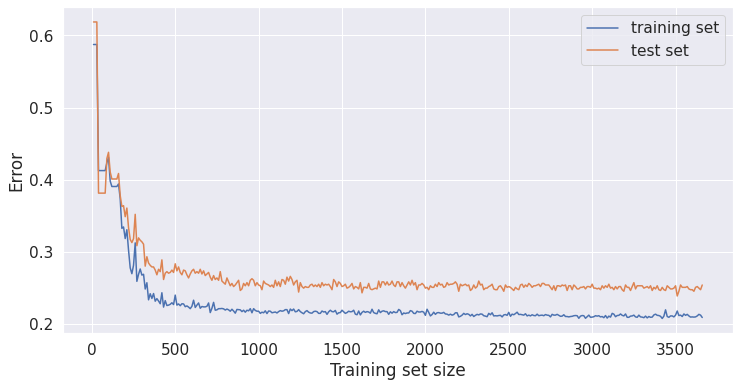

In [105]:
### Initialize a list to store the errors for each training set size
errors_gbm_test = []
errors_gbm_train = []
eval_set = [(X_test_fm, y_test_fm)]

# Set the range of training set sizes to test
sizes = range(10, len(X_train_fm), 10)

# Loop over the training set sizes
#'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100
for size in sizes:
    # Fit the classifier on the training set
    gbm = XGBClassifier(eval_metric="logloss", early_stopping_rounds=3, learning_rate=0.1, max_depth=3, min_child_weight=5, subsample=0.5)
    gbm.fit(X_train_fm[:size], y_train_fm.values.ravel()[:size], eval_set=eval_set)
    # Make predictions on the validation set
    y_pred_test = gbm.predict(X_test_fm)
    y_pred_train = gbm.predict(X_train_fm)

    # Calculate the error
    error_gbm_test = 1 - accuracy_score(y_test_fm.values.ravel(), y_pred_test)
    errors_gbm_test.append(error_gbm_test)
    error_gbm_train = 1 - accuracy_score(y_train_fm.values.ravel(), y_pred_train)
    errors_gbm_train.append(error_gbm_train)

# Plot the learning curve
plt.plot(sizes, errors_gbm_train, label='training set')
plt.plot(sizes, errors_gbm_test, label='test set')
plt.xlabel('Training set size')
plt.ylabel('Error')
plt.legend()
plt.show()

# Feature Embedding 

We will use the feature embedding dataset that we created previously to try to improve our results. The dataset we will use is "embedded_df".

In [106]:
Labels = pd.DataFrame(embedded_df['vote'])
X_edata = embedded_df.drop(['vote','Unnamed: 0'] , axis=1)

In [107]:
print(X_edata.shape)
print(Labels.shape)

(4588, 23)
(4588, 1)


In [108]:
X_etrain, X_etest, y_etrain, y_etest = train_test_split(X_edata, Labels, test_size=0.2, random_state=0)

## Gradient Boosting embedded k-fold

In [109]:
# Create a k-fold cross-validation iterator
gbc_kfold_emb = GradientBoostingClassifier(learning_rate = 0.2, n_estimators = 10, max_depth = 3)

In [110]:
kfold = KFold(n_splits=5)
x=0
# Loop through the k folds and fit the model on each train fold
# and evaluate it on the corresponding test fold
for train_indices, test_indices in kfold.split(X_data):
    X_train = X_edata.loc[train_indices, :]
    y_train = Labels.loc[train_indices, :]
    X_test = X_edata.loc[test_indices, :]
    y_test = Labels.loc[test_indices, :]
    gbc_kfold_emb.fit(X_train, y_train.values.ravel())
    x +=  gbc_kfold_emb.score(X_test, y_test)
    print(gbc_kfold_emb.score(X_test, y_test))
print("The average accuracy is:")
print(x/5)

0.7396514161220044
0.8376906318082789
0.7516339869281046
0.7753544165757906
0.7382769901853872
The average accuracy is:
0.768521488323913


In [112]:
ch2 = SelectKBest(chi2, k=10)
X_etrain += abs(X_etrain.min()) + 1
X_etest += abs(X_etest.min()) + 1
X_etrain = ch2.fit_transform(X_etrain, y_etrain)
X_etest = ch2.transform(X_etest)

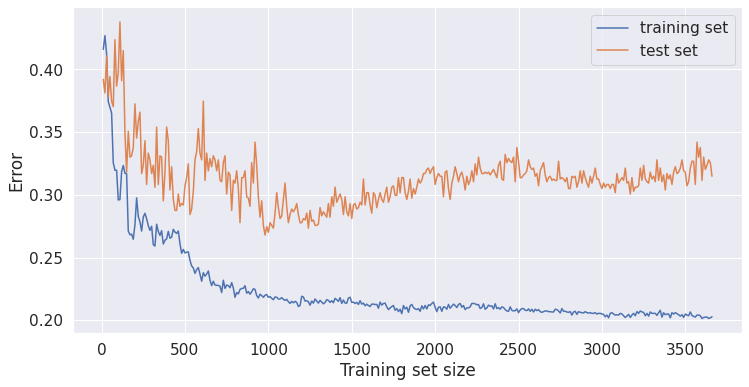

In [113]:
# Initialize a list to store the errors for each training set size
errors_gbm_test = []
errors_gbm_train = []

# Set the range of training set sizes to test
sizes = range(10, len(X_etrain), 10)

# Loop over the training set sizes
for size in sizes:
    # Fit the classifier on the training set
    gbm = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100)
    gbm.fit(X_etrain[:size], y_etrain.values.ravel()[:size])

    # Make predictions on the validation set
    y_pred_test = gbm.predict(X_etest)
    y_pred_train = gbm.predict(X_etrain)

    # Calculate the error
    error_gbm_test = 1 - accuracy_score(y_etest.values.ravel(), y_pred_test)
    errors_gbm_test.append(error_gbm_test)
    error_gbm_train = 1 - accuracy_score(y_etrain.values.ravel(), y_pred_train)
    errors_gbm_train.append(error_gbm_train)

# Plot the learning curve
plt.plot(sizes, errors_gbm_train, label='training set')
plt.plot(sizes, errors_gbm_test, label='test set')
plt.xlabel('Training set size')
plt.ylabel('Error')
plt.legend()
plt.show()

The embedded gradient boosting suffers from overfitting.

# Error Learning Curve for all models (training on embedding dataset)

In [ ]:
# Initialize a list to store the errors for each training set size
errors_clf_test_emb = []
errors_clf_train_emb = []
errors_svm_test_emb = []
errors_svm_train_emb = []
errors_lr_test_emb = []
errors_lr_train_emb = []
errors_knn_test_emb = []
errors_knn_train_emb = []
errors_dt_test_emb = []
errors_dt_train_emb = []
errors_nb_test_emb = []
errors_nb_train_emb = []
errors_gb_test_emb = []
errors_gb_train_emb = []
errors_xgb_test_emb = []
errors_xgb_train_emb = []


# Set the range of training set sizes to test
sizes = range(10, len(X_etrain), 10)

# Loop over the training set sizes
for size in sizes:
    y_train_s = y_etrain.values.ravel()[:size]
    X_train_s = X_etrain[:size]
    # Fit the classifier on the training set
    clf = RandomForestClassifier()
    clf.fit(X_train_s, y_train_s)
    #SVM
    svm = SVC()
    svm.fit(X_train_s, y_train_s)
    #Log reg
    lr = LogisticRegression()
    lr.fit(X_train_s, y_train_s)
    #knn
    knn = KNeighborsClassifier()
    knn.fit(X_train_s, y_train_s)
    #decision tree
    dt = DecisionTreeClassifier()
    dt.fit(X_train_s, y_train_s)
    #naive bayes
    nb = GaussianNB()
    nb.fit(X_train_s, y_train_s)
    #gradient boosting
    gb = GradientBoostingClassifier()
    gb.fit(X_train_s, y_train_s)
    #extreme gradient boosting 
    xgb = XGBClassifier()
    xgb.fit(X_train_s, y_train_s)
    

    # Make predictions on the validation set
    y_pred_test = clf.predict(X_etest)
    y_pred_train = clf.predict(X_etrain)
    # Calculate the error
    error_clf_test = 1 - accuracy_score(y_etest, y_pred_test)
    errors_clf_test_emb.append(error_clf_test)
    error_clf_train = 1 - accuracy_score(y_etrain, y_pred_train)
    errors_clf_train_emb.append(error_clf_train)
    
    #SVM predictions
    y_pred_test = svm.predict(X_etest)
    y_pred_train = svm.predict(X_etrain)
    #SVM error
    error_svm_test = 1 - accuracy_score(y_etest, y_pred_test)
    errors_svm_test_emb.append(error_svm_test)
    error_svm_train = 1 - accuracy_score(y_etrain, y_pred_train)
    errors_svm_train_emb.append(error_svm_train)
    
    #log reg predictions
    y_pred_test = lr.predict(X_etest)
    y_pred_train = lr.predict(X_etrain)
    # Log reg error
    error_lr_test = 1 - accuracy_score(y_etest, y_pred_test)
    errors_lr_test_emb.append(error_lr_test)
    error_lr_train = 1 - accuracy_score(y_etrain, y_pred_train)
    errors_lr_train_emb.append(error_lr_train)
    
    #knn prediction
    y_pred_test = knn.predict(X_etest)
    y_pred_train = knn.predict(X_etrain)
    #knn error
    error_knn_test = 1 - accuracy_score(y_etest, y_pred_test)
    errors_knn_test_emb.append(error_knn_test)
    error_knn_train = 1 - accuracy_score(y_etrain, y_pred_train)
    errors_knn_train_emb.append(error_knn_train)
    
    #decision tree predictions
    y_pred_test = dt.predict(X_etest)
    y_pred_train = dt.predict(X_etrain)
    #Decision tree error 
    error_dt_test = 1 - accuracy_score(y_etest, y_pred_test)
    errors_dt_test_emb.append(error_dt_test)
    error_dt_train = 1 - accuracy_score(y_etrain, y_pred_train)
    errors_dt_train_emb.append(error_dt_train)
    
    #naive bayes predictions
    y_pred_test = nb.predict(X_etest)
    y_pred_train = nb.predict(X_etrain)
    #Naive bayes error 
    error_nb_test = 1 - accuracy_score(y_etest, y_pred_test)
    errors_nb_test_emb.append(error_nb_test)
    error_nb_train = 1 - accuracy_score(y_etrain, y_pred_train)
    errors_nb_train_emb.append(error_nb_train)
    
    #gradient boosting
    y_pred_test = gb.predict(X_etest)
    y_pred_train = gb.predict(X_etrain)
    #Gradient boosting
    error_gb_test = 1 - accuracy_score(y_etest, y_pred_test)
    errors_gb_test_emb.append(error_gb_test)
    error_gb_train = 1 - accuracy_score(y_etrain, y_pred_train)
    errors_gb_train_emb.append(error_gb_train)
    
    #Extreme gradient boosting 
    y_pred_test = xgb.predict(X_etest)
    y_pred_train = xgb.predict(X_etrain)
    #Extreme gradient boosting 
    error_xgb_test = 1 - accuracy_score(y_etest, y_pred_test)
    errors_xgb_test_emb.append(error_xgb_test)
    error_xgb_train = 1 - accuracy_score(y_etrain, y_pred_train)
    errors_xgb_train_emb.append(error_xgb_train)       

### Plot of the results

In [ ]:
plt.plot(sizes, errors_rf_test_emb, label = 'Random Forest Classifier')
plt.plot(sizes, errors_svm_test_emb, label = 'Support Vector Machine Classifier')
plt.plot(sizes, errors_lr_test_emb, label = 'Logistic Regression Classifier')
plt.plot(sizes, errors_knn_test_emb, label = 'K-Nearest Neighbors Classifier')
plt.plot(sizes, errors_dt_test_emb, label = 'Decision Tree Classifier')
plt.plot(sizes, errors_nb_test_emb, label = 'Naive Bayes Classifier')
plt.plot(sizes, errors_gb_test_emb, label = 'Gradient Boosting Classifier')
plt.plot(sizes, errors_xgb_test_emb, label = 'Extreme Gradient Boosting Classifier')

plt.xlabel('Training set size')
plt.ylabel('Validation error')
plt.legend()
plt.show()

# Test of the algorithm on other articles 

The same Constituante is considered. We input a different article, it means that we have to place a new article on the political compass, assigning both an orientation score (left or right) and a socre to rate its degree of convervatism (progressist or conservatist)

In [ ]:
ds.head()

In [ ]:
deputees_all = ds.drop(['Unnamed: 0', 'orientation_art', 'progvscons_art', 'vote'], axis=1)
mask = deputees_all['orientation_dep'].ne(deputees_all['orientation_dep'].shift())
deputees_x135 = deputees_all[mask]
deputees_x135 = deputees_x135.reset_index(drop=True)
deputees_x135.head()

In [ ]:
# Create the data for the DataFrame
data_right_prog = {
    'orientation_art': [1] * 130,  # list of 130 1's
    'progvscons_art': [-1] * 130  # list of 130 -1's
}

data_left_cons = {
    'orientation_art': [-1] * 130,  # list of 130 -1's
    'progvscons_art': [1] * 130  # list of 130 1's
}


In [ ]:
left_prog = pd.DataFrame(data=-1, index=range(130), columns=["orientation_art", "progvscons_art"])
right_cons = pd.DataFrame(data=1, index=range(130), columns=["orientation_art", "progvscons_art"])
centered = pd.DataFrame(data=0, index=range(130), columns=["orientation_art", "progvscons_art"])
left_cons = pd.DataFrame(data_left_cons)
right_prog = pd.DataFrame(data_right_prog, index=range(130))

left_prog.head()
right_cons.head()

In [ ]:
left_prog_vs_deputees = pd.concat([left_prog, deputees_x135], axis=1)
right_cons_vs_deputees = pd.concat([right_cons, deputees_x135], axis=1)
centered_vs_deputees = pd.concat([centered, deputees_x135], axis=1)
left_cons_vs_deputees = pd.concat([left_cons, deputees_x135], axis=1)
right_prog_vs_deputees = pd.concat([right_prog, deputees_x135], axis=1)

left_prog_vs_deputees.head()
right_cons_vs_deputees.head()

Run the Gradient Boosting model trained before on this dataset

In [ ]:
y_pred_left_prog = gbc_kfold.predict(left_prog_vs_deputees)
y_pred_right_cons = gbc_kfold.predict(right_cons_vs_deputees)
y_pred_centered = gbc_kfold.predict(centered_vs_deputees)
y_pred_left_cons = gbc_kfold.predict(left_cons_vs_deputees)
y_pred_right_prog = gbc_kfold.predict(right_prog_vs_deputees)

In [ ]:
def get_pos_percentage(y_pred)   : 
    # Initialize the sums for the 1 values and -1 values
    sum_1 = 0
    sum_neg_1 = 0

    # Iterate through the elements of the vector
    for i in y_pred:
      # If the element is 1, add it to the sum of 1 values
      if i == 1:
        sum_1 += i
      # If the element is -1, add it to the sum of -1 values
      elif i == -1:
        sum_neg_1 += i

    # Print the results
    print("Sum of 1 values:", sum_1)
    print("Sum of -1 values:", sum_neg_1)
    
    pos_votes_percentage = sum_1 / (sum_1 + (-(sum_neg_1))) * 100
    return (pos_votes_percentage)


In [ ]:
print("Left oriented + Progressive: ", get_pos_percentage(y_pred_left_prog))
print("Right oriented + Conservative: ",get_pos_percentage(y_pred_right_cons))
print("Centered: ",get_pos_percentage(y_pred_centered))
print("Left oriented + Conservative: ",get_pos_percentage(y_pred_left_cons))
print("Right oriented + Progressive: ",get_pos_percentage(y_pred_right_prog))

It is very likely that around 72% of the Constituante would have voted 'YES' for such article.